# Imports

In [2]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
theme_set(theme_bw(base_size=16))
library(magrittr)
library(RColorBrewer)
library(magrittr)
library(RColorBrewer)
library(viridis)
options(repr.plot.width=15, repr.plot.height=15)



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

# Tests / draft

price
1  75  
2 104  
3 369  
4 300  
5  92  
6  64

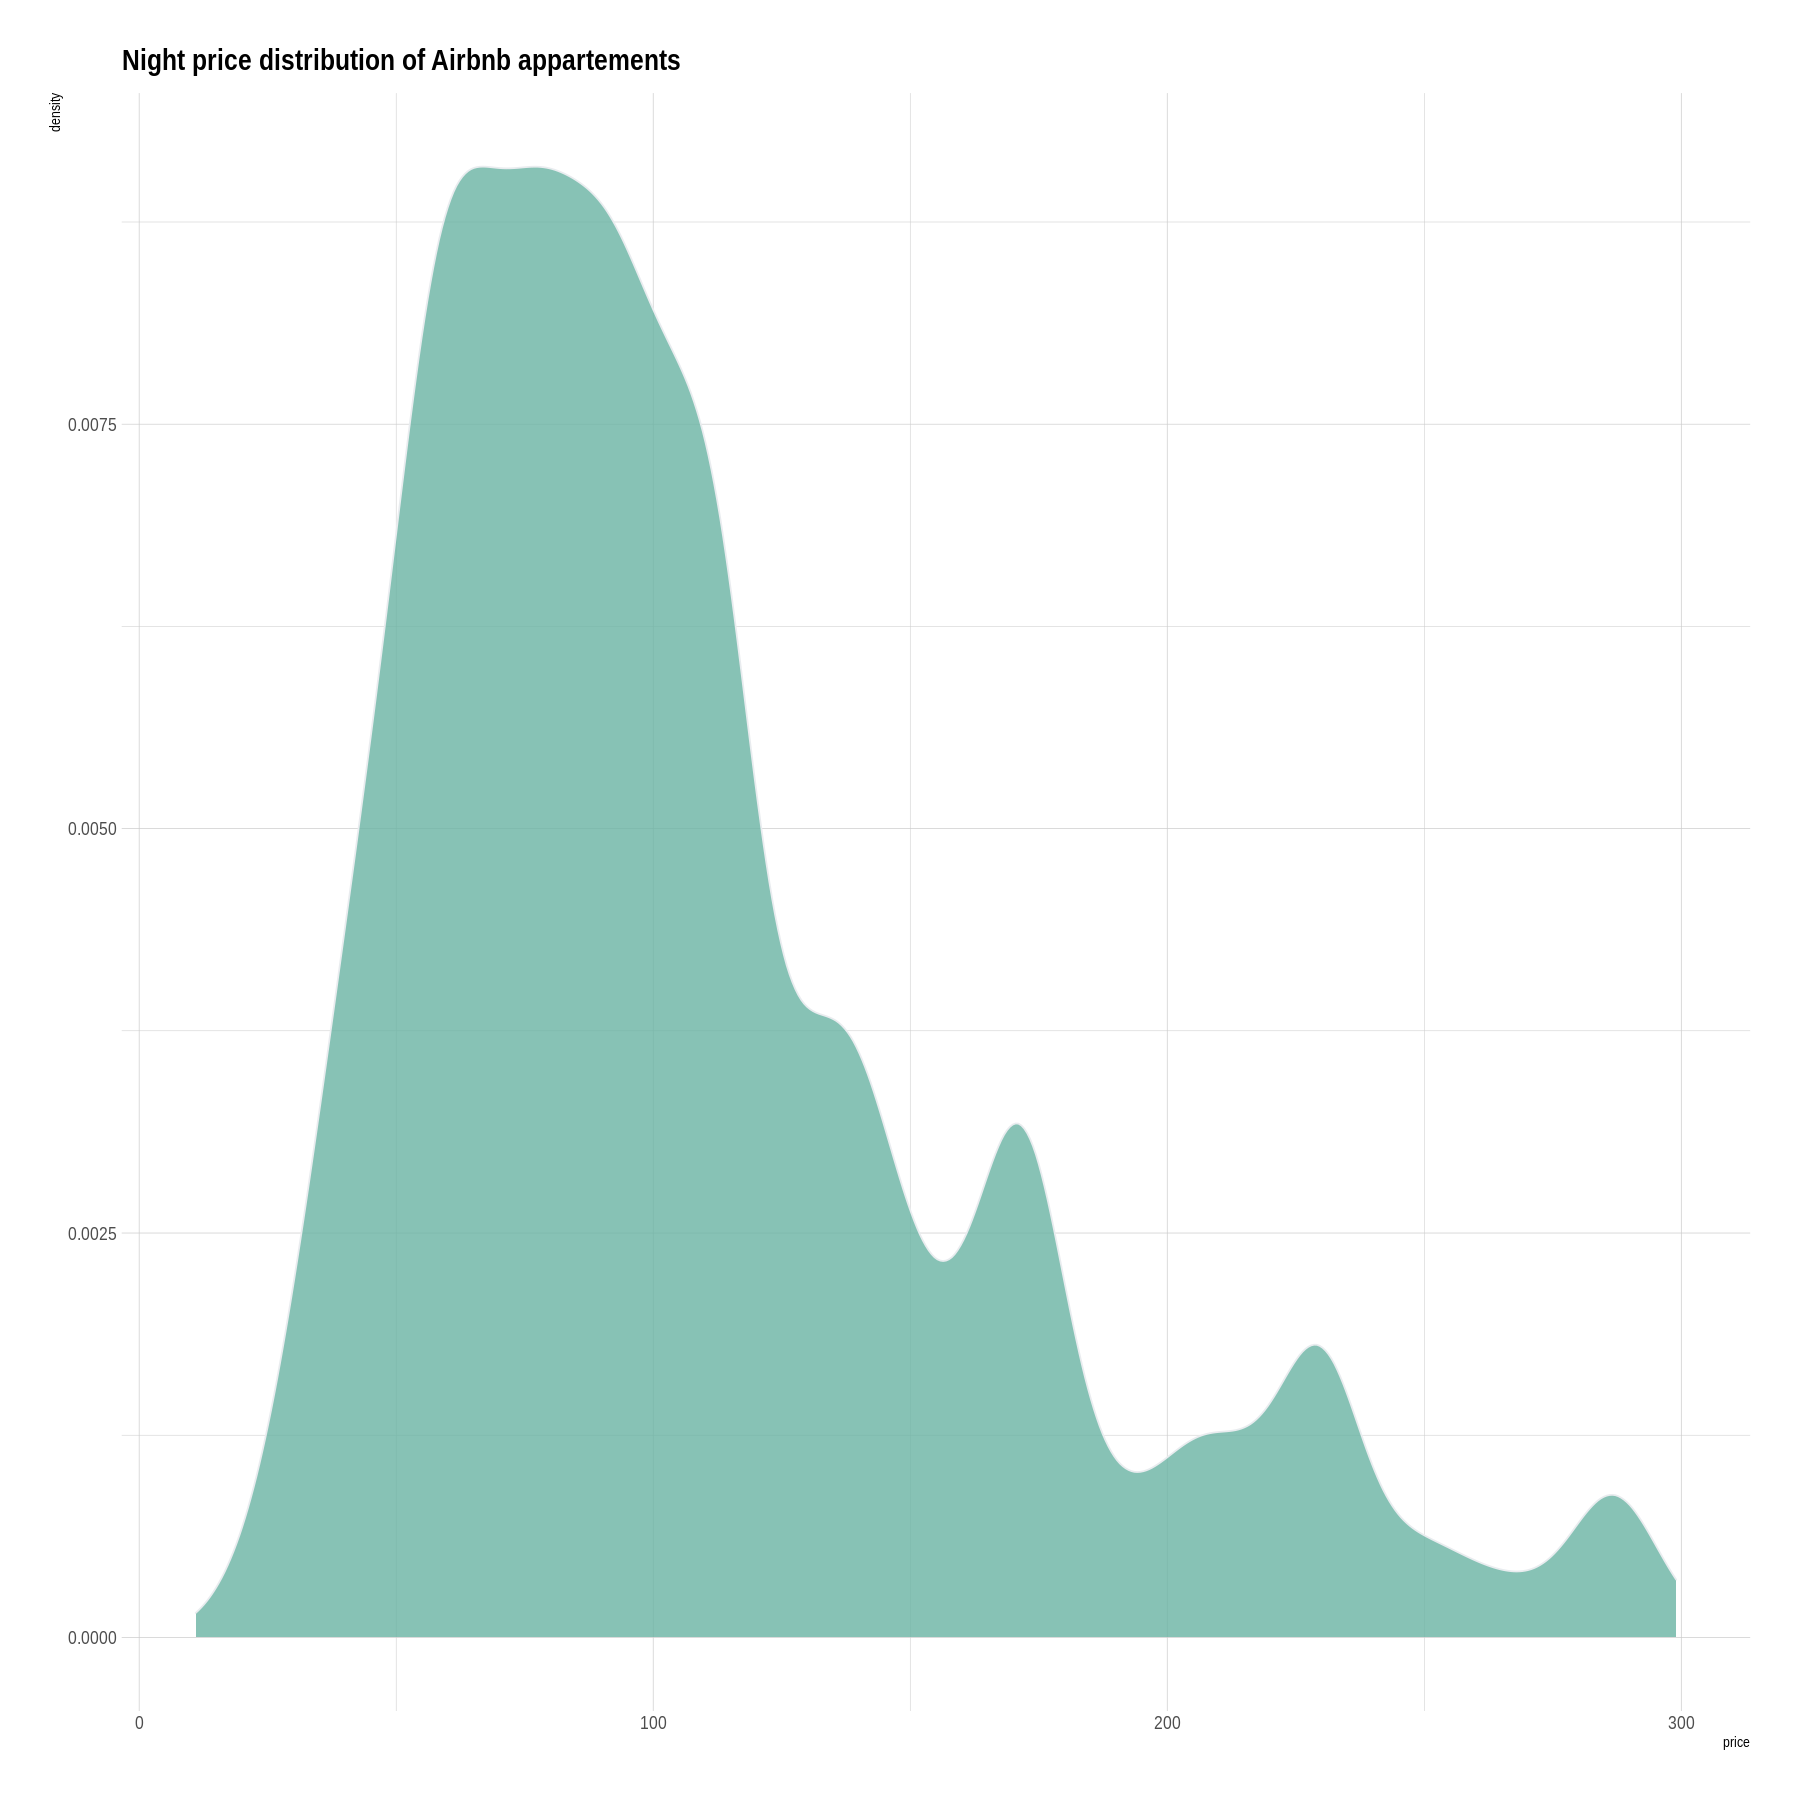

In [12]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/1_OneNum.csv", header=TRUE)
head(data)
# Make the histogram
data %>%
  filter( price<300 ) %>%
  ggplot( aes(x=price)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) +
    ggtitle("Night price distribution of Airbnb appartements") +
    theme_ipsum()

## NPG palette

In [58]:
pal_npg("nrc")(10)[1]


[1] "#E64B35FF"

In [141]:
pal_npg("nrc")(10)

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
 [7] "#91D1C2FF" "#DC0000FF" "#7E6148FF" "#B09C85FF"

## Enrichment plots

`geom_smooth()` using formula 'y ~ x'



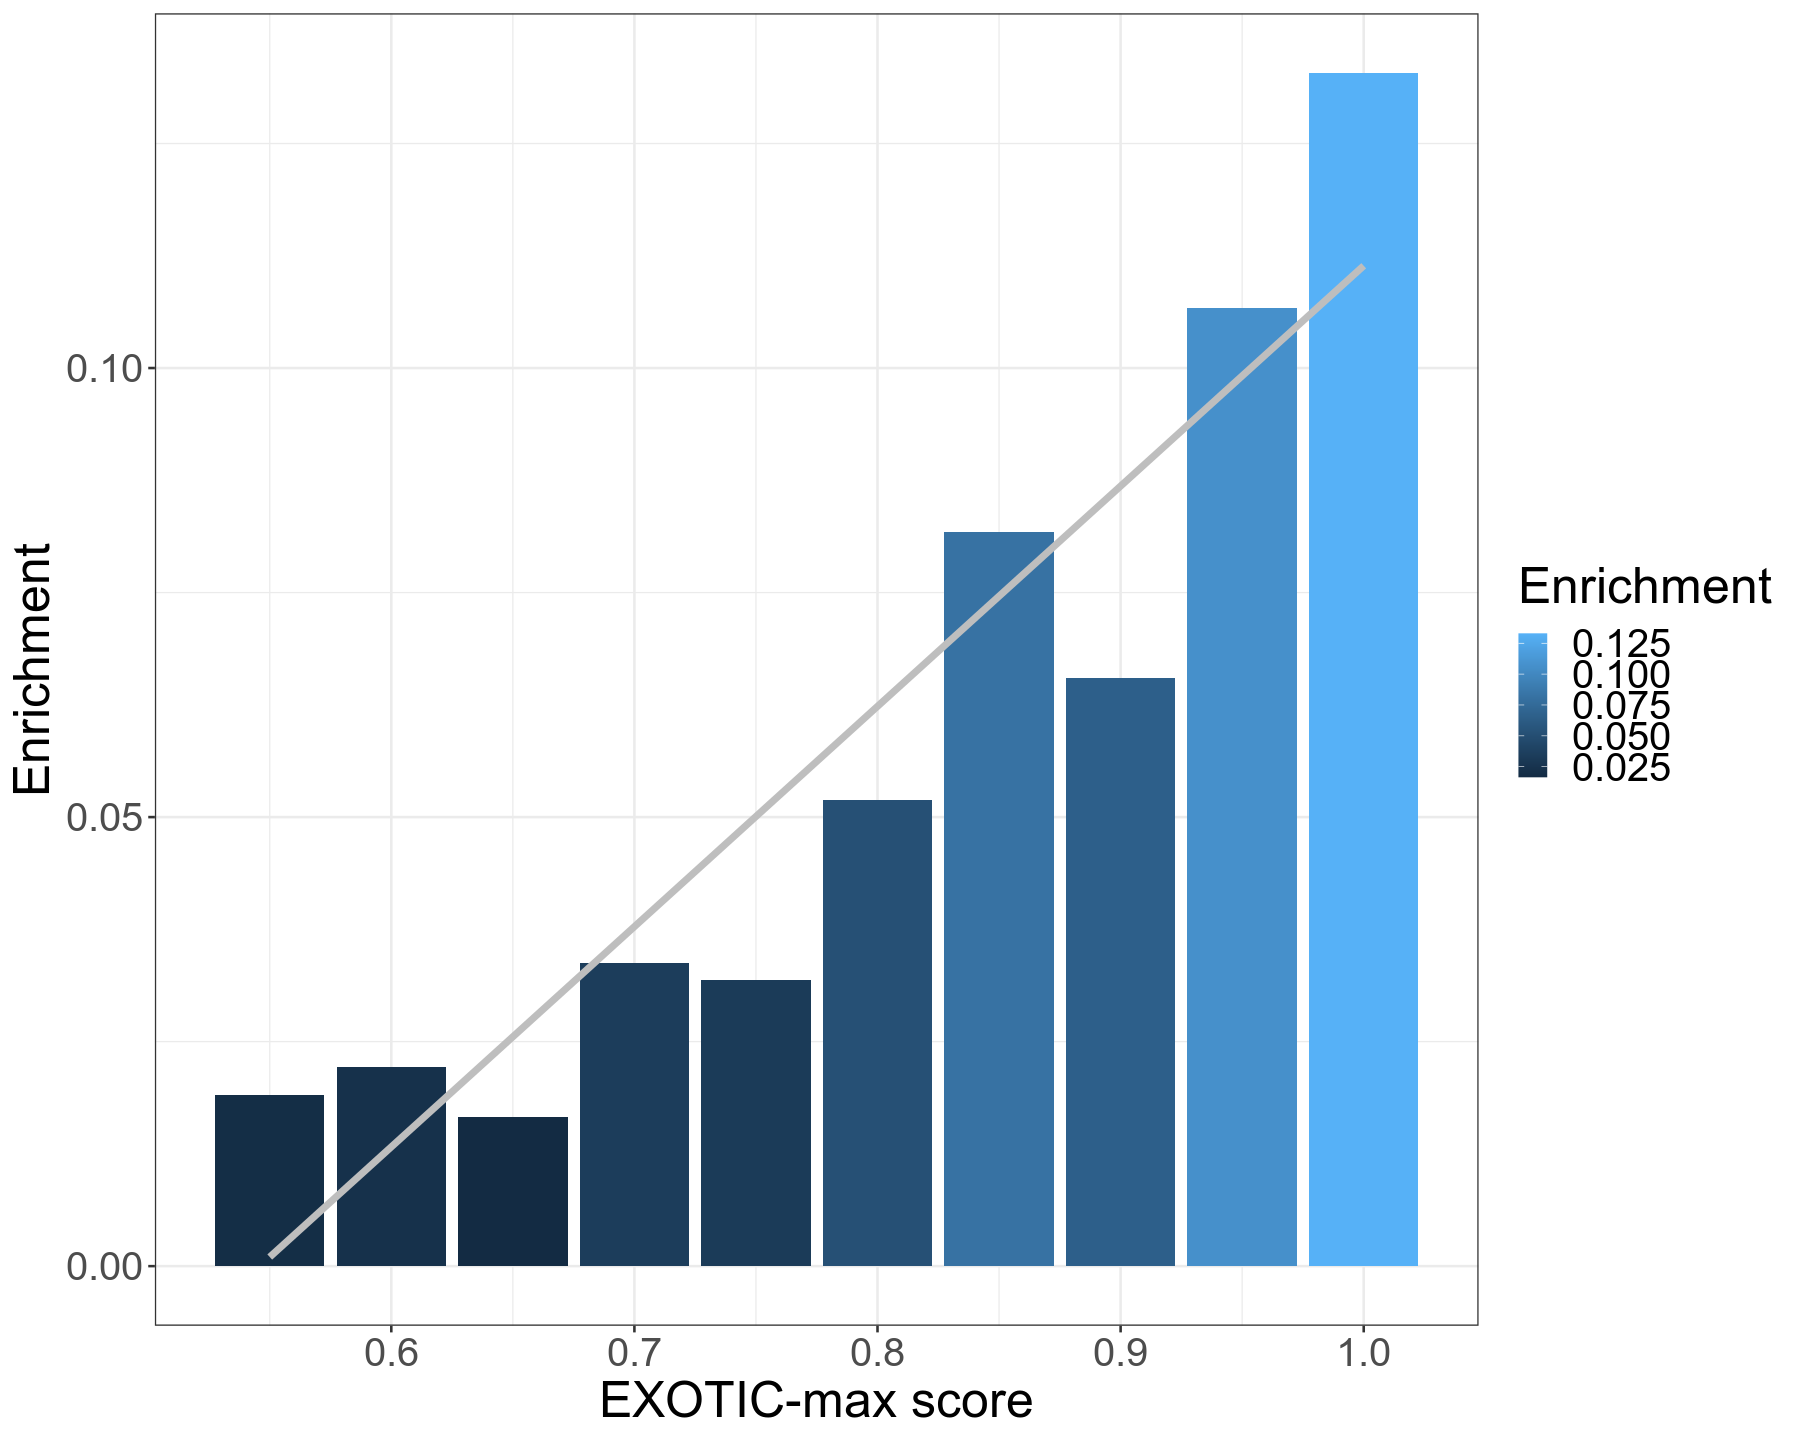

In [154]:
options(repr.plot.width=15, repr.plot.height=12)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata_final.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Enrichment, fill=Enrichment)) +
    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
    
    theme(text = element_text(size=30)) + 
    scale_color_npg() + labs(x='EXOTIC-max score')
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 


`geom_smooth()` using formula 'y ~ x'



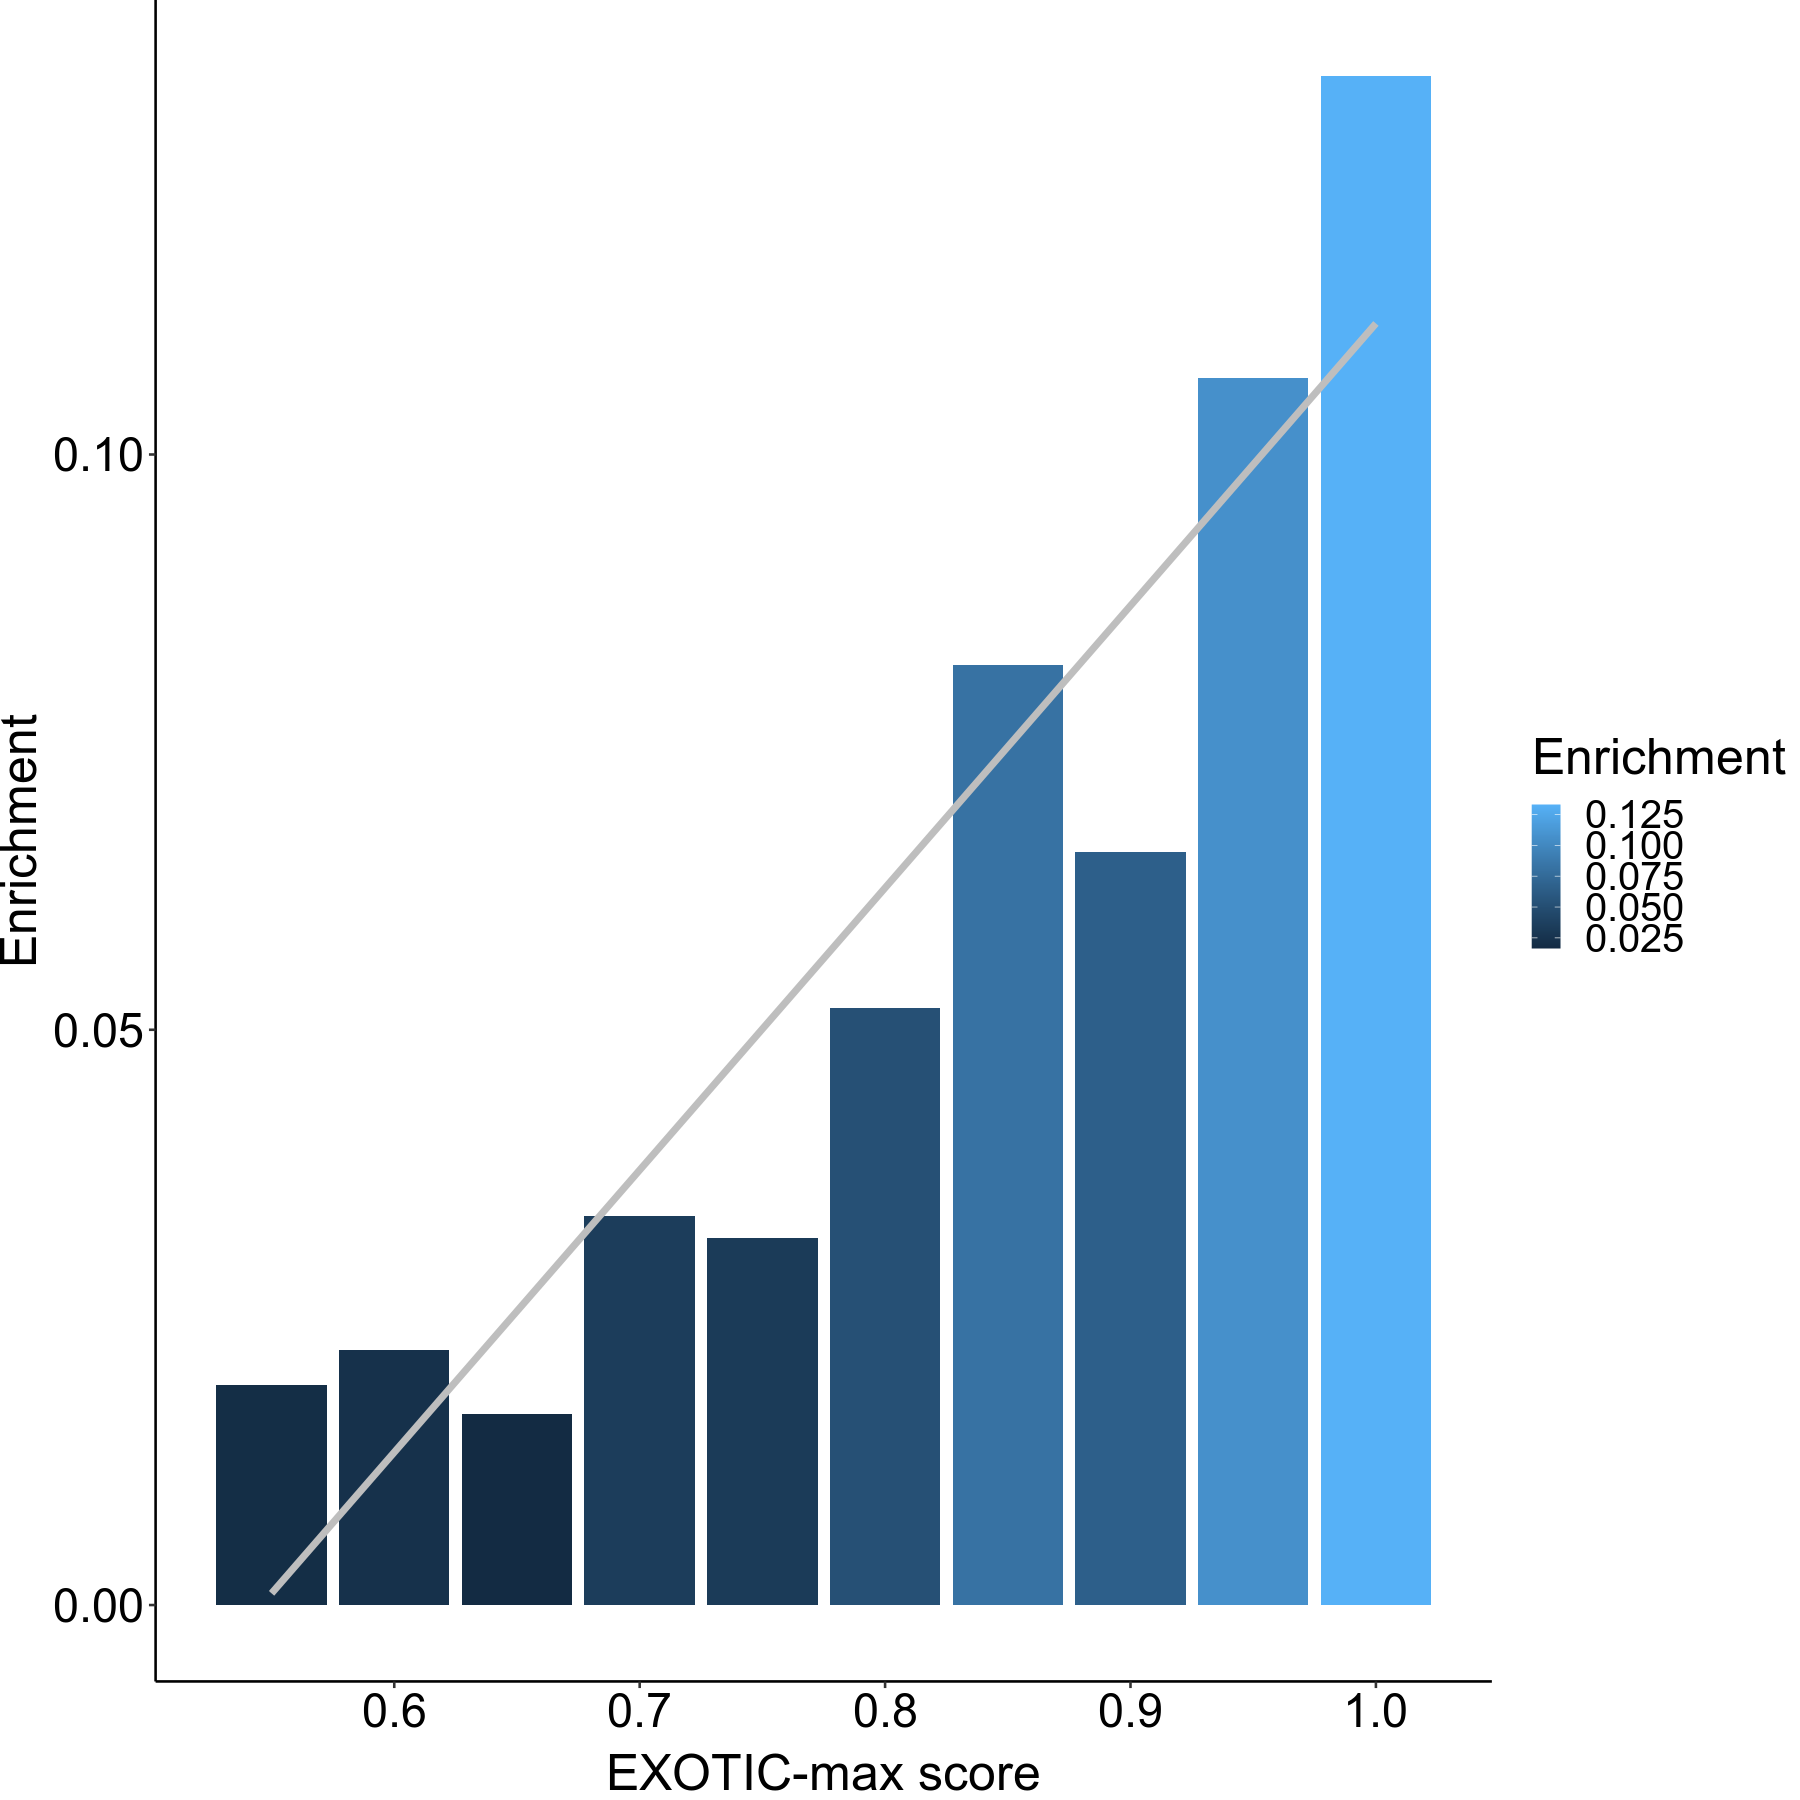

In [153]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata_final.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Enrichment, fill=Enrichment)) +
    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
   scale_color_npg() + labs(x='EXOTIC-max score')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



In [80]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_tissues_Rdata_final_min.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)

merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bin_start, EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bin_start) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
merge_exotic_sqtl_count


EXOTIC_bin_start snpId snpId_total Ratio_sQTL 
1  0.0              13321 188829      0.070545308
2  0.02             16688 351601      0.047462891
3  0.04             14104 418283      0.033718798
4  0.06              9193 426516      0.021553705
5  0.08              9966 395623      0.025190649
6  0.1              14867 591842      0.025119880
7  0.12             14251 542945      0.026247594
8  0.14              8136 510895      0.015924994
9  0.16              4289 330994      0.012957939
10 0.18              3529 313823      0.011245192
11 0.2               3955 214936      0.018400826
12 0.22              2210 266661      0.008287676
13 0.24              1441 142717      0.010096905
14 0.26              3177 292618      0.010857158
15 0.28              7920 470582      0.016830223
16 0.3               1989 390101      0.005098680
17 0.32               955 287514      0.003321577
18 0.34              8085 486578      0.016616041
19 0.36              5648 370257      0.015254269
20 0.38              6324 342526      0.018462832
21 0.4               8996 390453      0.023039905
22 0.42              2953 155334      0.019010648
23 0.44              3655 231496      0.015788610
24 0.46               293  19752      0.014833941

EXOTIC_bins snpId snpId_total Ratio_sQTL 
1  0.0 - 0.02  13321 188829      0.070545308
2  0.02 - 0.04 16688 351601      0.047462891
3  0.04 - 0.06 14104 418283      0.033718798
4  0.06 - 0.08  9193 426516      0.021553705
5  0.08 - 0.1   9966 395623      0.025190649
6  0.1 - 0.12  14867 591842      0.025119880
7  0.12 - 0.14 14251 542945      0.026247594
8  0.14 - 0.16  8136 510895      0.015924994
9  0.16 - 0.18  4289 330994      0.012957939
10 0.18 - 0.2   3529 313823      0.011245192
11 0.2 - 0.22   3955 214936      0.018400826
12 0.22 - 0.24  2210 266661      0.008287676
13 0.24 - 0.26  1441 142717      0.010096905
14 0.26 - 0.28  3177 292618      0.010857158
15 0.28 - 0.3   7920 470582      0.016830223
16 0.3 - 0.32   1989 390101      0.005098680
17 0.32 - 0.34   955 287514      0.003321577
18 0.34 - 0.36  8085 486578      0.016616041
19 0.36 - 0.38  5648 370257      0.015254269
20 0.38 - 0.4   6324 342526      0.018462832
21 0.4 - 0.42   8996 390453      0.023039905
22 0.42 - 0.44  2953 155334      0.019010648
23 0.44 - 0.46  3655 231496      0.015788610
24 0.46 - 0.48   293  19752      0.014833941

`geom_smooth()` using formula 'y ~ x'



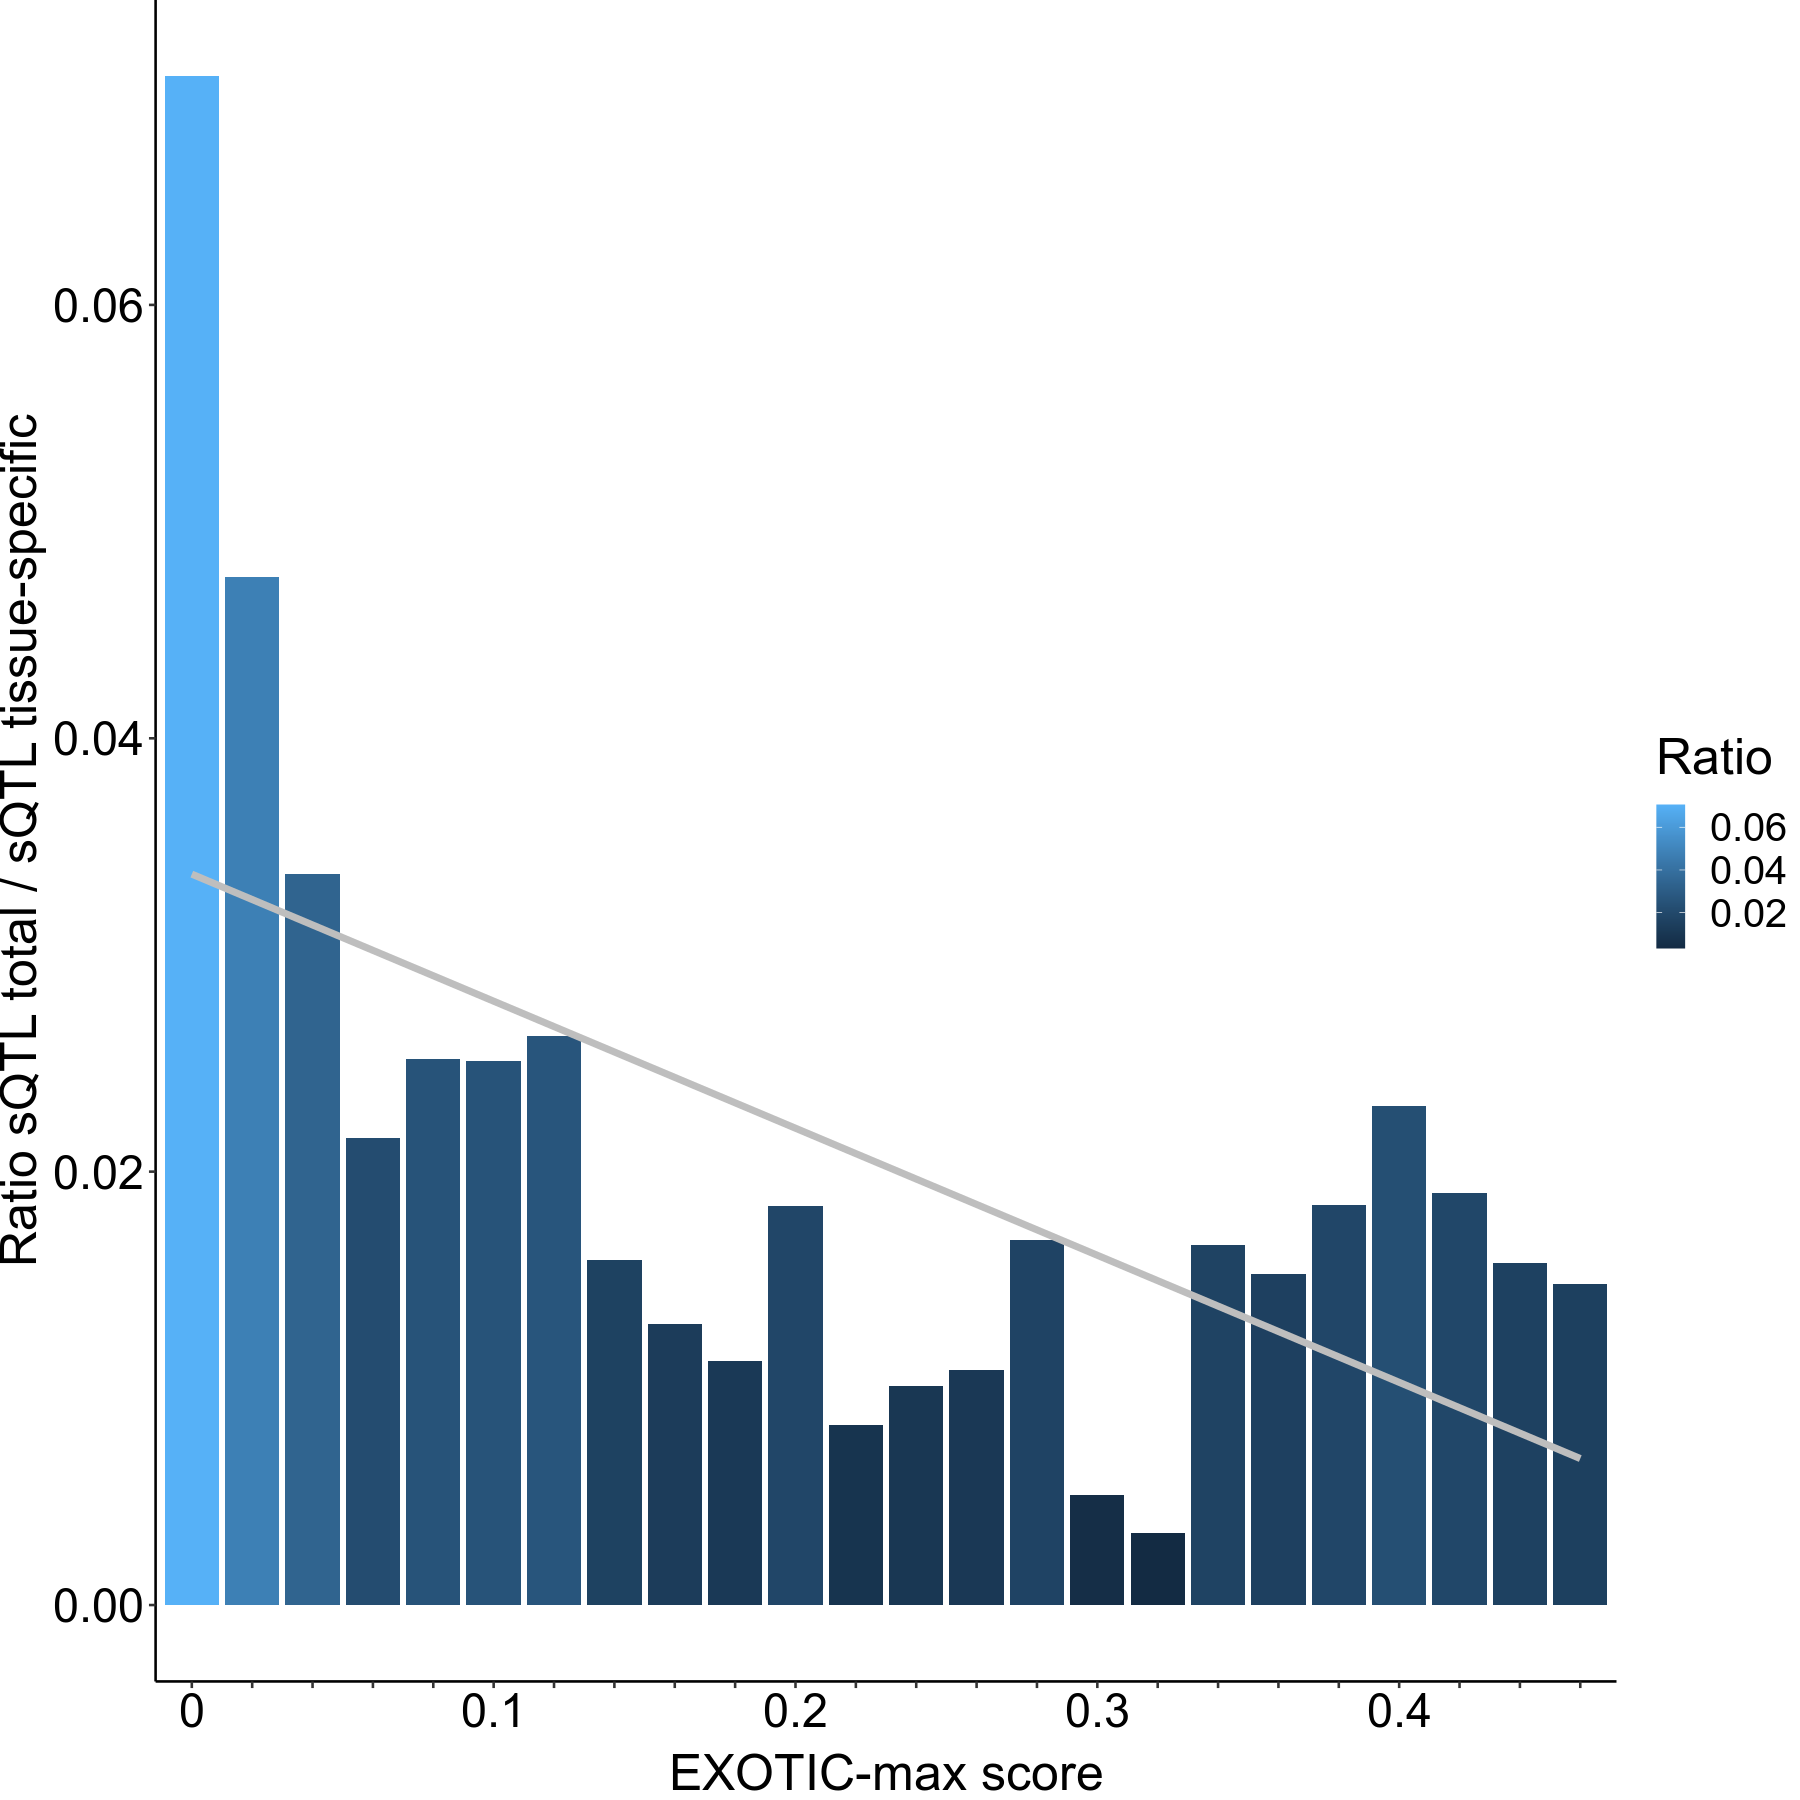

In [85]:
options(repr.plot.width=15, repr.plot.height=15)



merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_tissues_Rdata_final_min.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)

merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bin_start, EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
merge_exotic_sqtl_count

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins

h1 <- ggplot(merge_exotic_sqtl_count, aes(x=EXOTIC_bins, y=Ratio_sQTL, fill=Ratio_sQTL)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
    scale_x_discrete( labels=c(0,"","","","",0.1,"","","","",0.2,"","","","",0.3,"","","","",0.4,"","","")) +
#     scale_colour_brewer(palette = "Greens") + 
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio sQTL total / sQTL tissue-specific' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 




In [241]:
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bin_start) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
merge_exotic_sqtl_count

EXOTIC_bins snpId snpId_total Ratio_sQTL 
1  0.52 - 0.54  6839 380290      0.017983644
2  0.54 - 0.56  7519 459584      0.016360448
3  0.56 - 0.58  1274 100652      0.012657473
4  0.58 - 0.6    429  68952      0.006221719
5  0.6 - 0.62   1938 277754      0.006977397
6  0.62 - 0.64  3125 322641      0.009685688
7  0.64 - 0.66  1392 138399      0.010057876
8  0.66 - 0.68  1176 263198      0.004468119
9  0.68 - 0.7   2305 279217      0.008255228
10 0.7 - 0.72   2065 210305      0.009819072
11 0.72 - 0.74  1016 198262      0.005124532
12 0.74 - 0.76  1122 152441      0.007360225
13 0.76 - 0.78  1551 100259      0.015469933
14 0.78 - 0.8   1539 153051      0.010055472
15 0.8 - 0.82   4544 312283      0.014550904
16 0.82 - 0.84  3769 223996      0.016826193
17 0.84 - 0.86  7916 284344      0.027839518
18 0.86 - 0.88 12694 562240      0.022577547
19 0.88 - 0.9  15760 776281      0.020301927
20 0.9 - 0.92  18172 469256      0.038725131
21 0.92 - 0.94 15168 373375      0.040624037
22 0.94 - 0.96 31149 445881      0.069859447
23 0.96 - 0.98 20763 271650      0.076432910
24 0.98 - 1.0  22766 269727      0.084403860

In [245]:
merge_exotic_sqtl

snpId MAP Ratio_Exon_sQTL EXOTIC_bin_start snpId_total MAP_total
1   335   16  20.937500       0.52             17004       16       
2   130    6  21.666667       0.52             11290       13       
3   103    6  17.166667       0.52              7440       13       
4   142    6  23.666667       0.52              8642        7       
5    94    4  23.500000       0.52              4778        4       
6   289    7  41.285714       0.52             14534        7       
7    44    5   8.800000       0.52              2244        5       
8    47    3  15.666667       0.52              2363        3       
9   264    5  52.800000       0.52             13630        5       
10  234    3  78.000000       0.52             12068        3       
11  258    4  64.500000       0.52             13314        4       
12  253    5  50.600000       0.52             13037        5       
13   64    2  32.000000       0.52              3215        2       
14   50    2  25.000000       0.52              2497        2       
15   90    3  30.000000       0.52              4541        3       
16   72    2  36.000000       0.52              3623        2       
17  225    3  75.000000       0.52             11602        3       
18   60    3  20.000000       0.52              3012        3       
19  100    3  33.333333       0.52              5051        3       
20  201    4  50.250000       0.52             10272        4       
21  109    6  18.166667       0.52              7876        7       
22  203    5  40.600000       0.52             10386        5       
23  198    6  33.000000       0.52             10228        6       
24  100   13   7.692308       0.52              4970       13       
25  229   12  19.083333       0.52             10914       12       
26  129    5  25.800000       0.52              6549        5       
27  103    3  34.333333       0.52             12274        4       
28   82    2  41.000000       0.52              8774        3       
29    6    1   6.000000       0.52               306        1       
30   67    2  33.500000       0.52              3367        2       
⋮   ⋮     ⋮   ⋮               ⋮                ⋮           ⋮        
702    3    1   3.000000      0.96              1734       121      
703 4632  119  38.924370      0.96             22942       506      
704  149   12  12.416667      0.96              4850       181      
705  135    4  33.750000      0.96             16854       406      
706   16    1  16.000000      0.96             14544       369      
707   49    3  16.333333      0.96             11653       316      
708   22    1  22.000000      0.96               955        91      
709    4    1   4.000000      0.96              5188       208      
710 7235  107  67.616822      0.96             27789       595      
711    5    3   1.666667      0.96             15709       376      
712    1    1   1.000000      0.96             20567       580      
713   28    1  28.000000      0.96             24182       668      
714   82    3  27.333333      0.96              6456       223      
715 6883  106  64.933962      0.96             22681       486      
716  401    7  57.285714      0.96             15598       341      
717   42    1  42.000000      0.98             29277       688      
718   88    6  14.666667      0.98              6411       330      
719   77    1  77.000000      0.98              9732       421      
720 3835   72  53.263889      0.98             19942       525      
721   94    5  18.800000      0.98              4302       169      
722   95    3  31.666667      0.98             21998       551      
723  312    1 312.000000      0.98             25883       566      
724   22    1  22.000000      0.98             14846       350      
725  155    3  51.666667      0.98              8207       266      
726   21    1  21.000000      0.98              4902       239      
727 7252  167  43.425150      0.98             29906       559      
72

In [41]:
library(RColorBrewer)
colorRampPalette(brewer.pal(12, "Spectral"))(50)


Warning message in brewer.pal(12, "Spectral"):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”


[1] "#9E0142" "#A90D44" "#B41947" "#BF2649" "#CA324C" "#D53E4E" "#DB484C"
 [8] "#E25249" "#E85B47" "#EE6544" "#F46F44" "#F67C4A" "#F88A50" "#F99756"
[15] "#FBA45C" "#FDB163" "#FDBB6C" "#FDC574" "#FDCF7D" "#FDD985" "#FEE28F"
[22] "#FEE899" "#FEEFA4" "#FEF5AF" "#FEFBB9" "#FCFDBB" "#F7FBB3" "#F2F9AB"
[29] "#EDF7A3" "#E8F59B" "#DEF299" "#D2ED9B" "#C6E89E" "#BAE3A0" "#AEDEA3"
[36] "#A1D9A4" "#93D3A4" "#84CEA4" "#76C8A4" "#68C3A4" "#5DB8A8" "#52ACAD"
[43] "#48A0B2" "#3D95B7" "#3389BC" "#3A7DB8" "#4371B2" "#4C66AD" "#555AA7"
[50] "#5E4FA2"

In [86]:
dsamp <- diamonds[sample(nrow(diamonds), 1000), ]
(d <- ggplot(dsamp, aes(carat, price)) +
  geom_point(aes(colour = clarity))) + colorRampPalette(brewer.pal(12, "Spectral"))(50)


Warning message in brewer.pal(12, "Spectral"):
“n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
”


ERROR: Error: Can't add `colorRampPalette(brewer.pal(12, "Spectral"))(50)` to a ggplot object.


`geom_smooth()` using formula 'y ~ x'



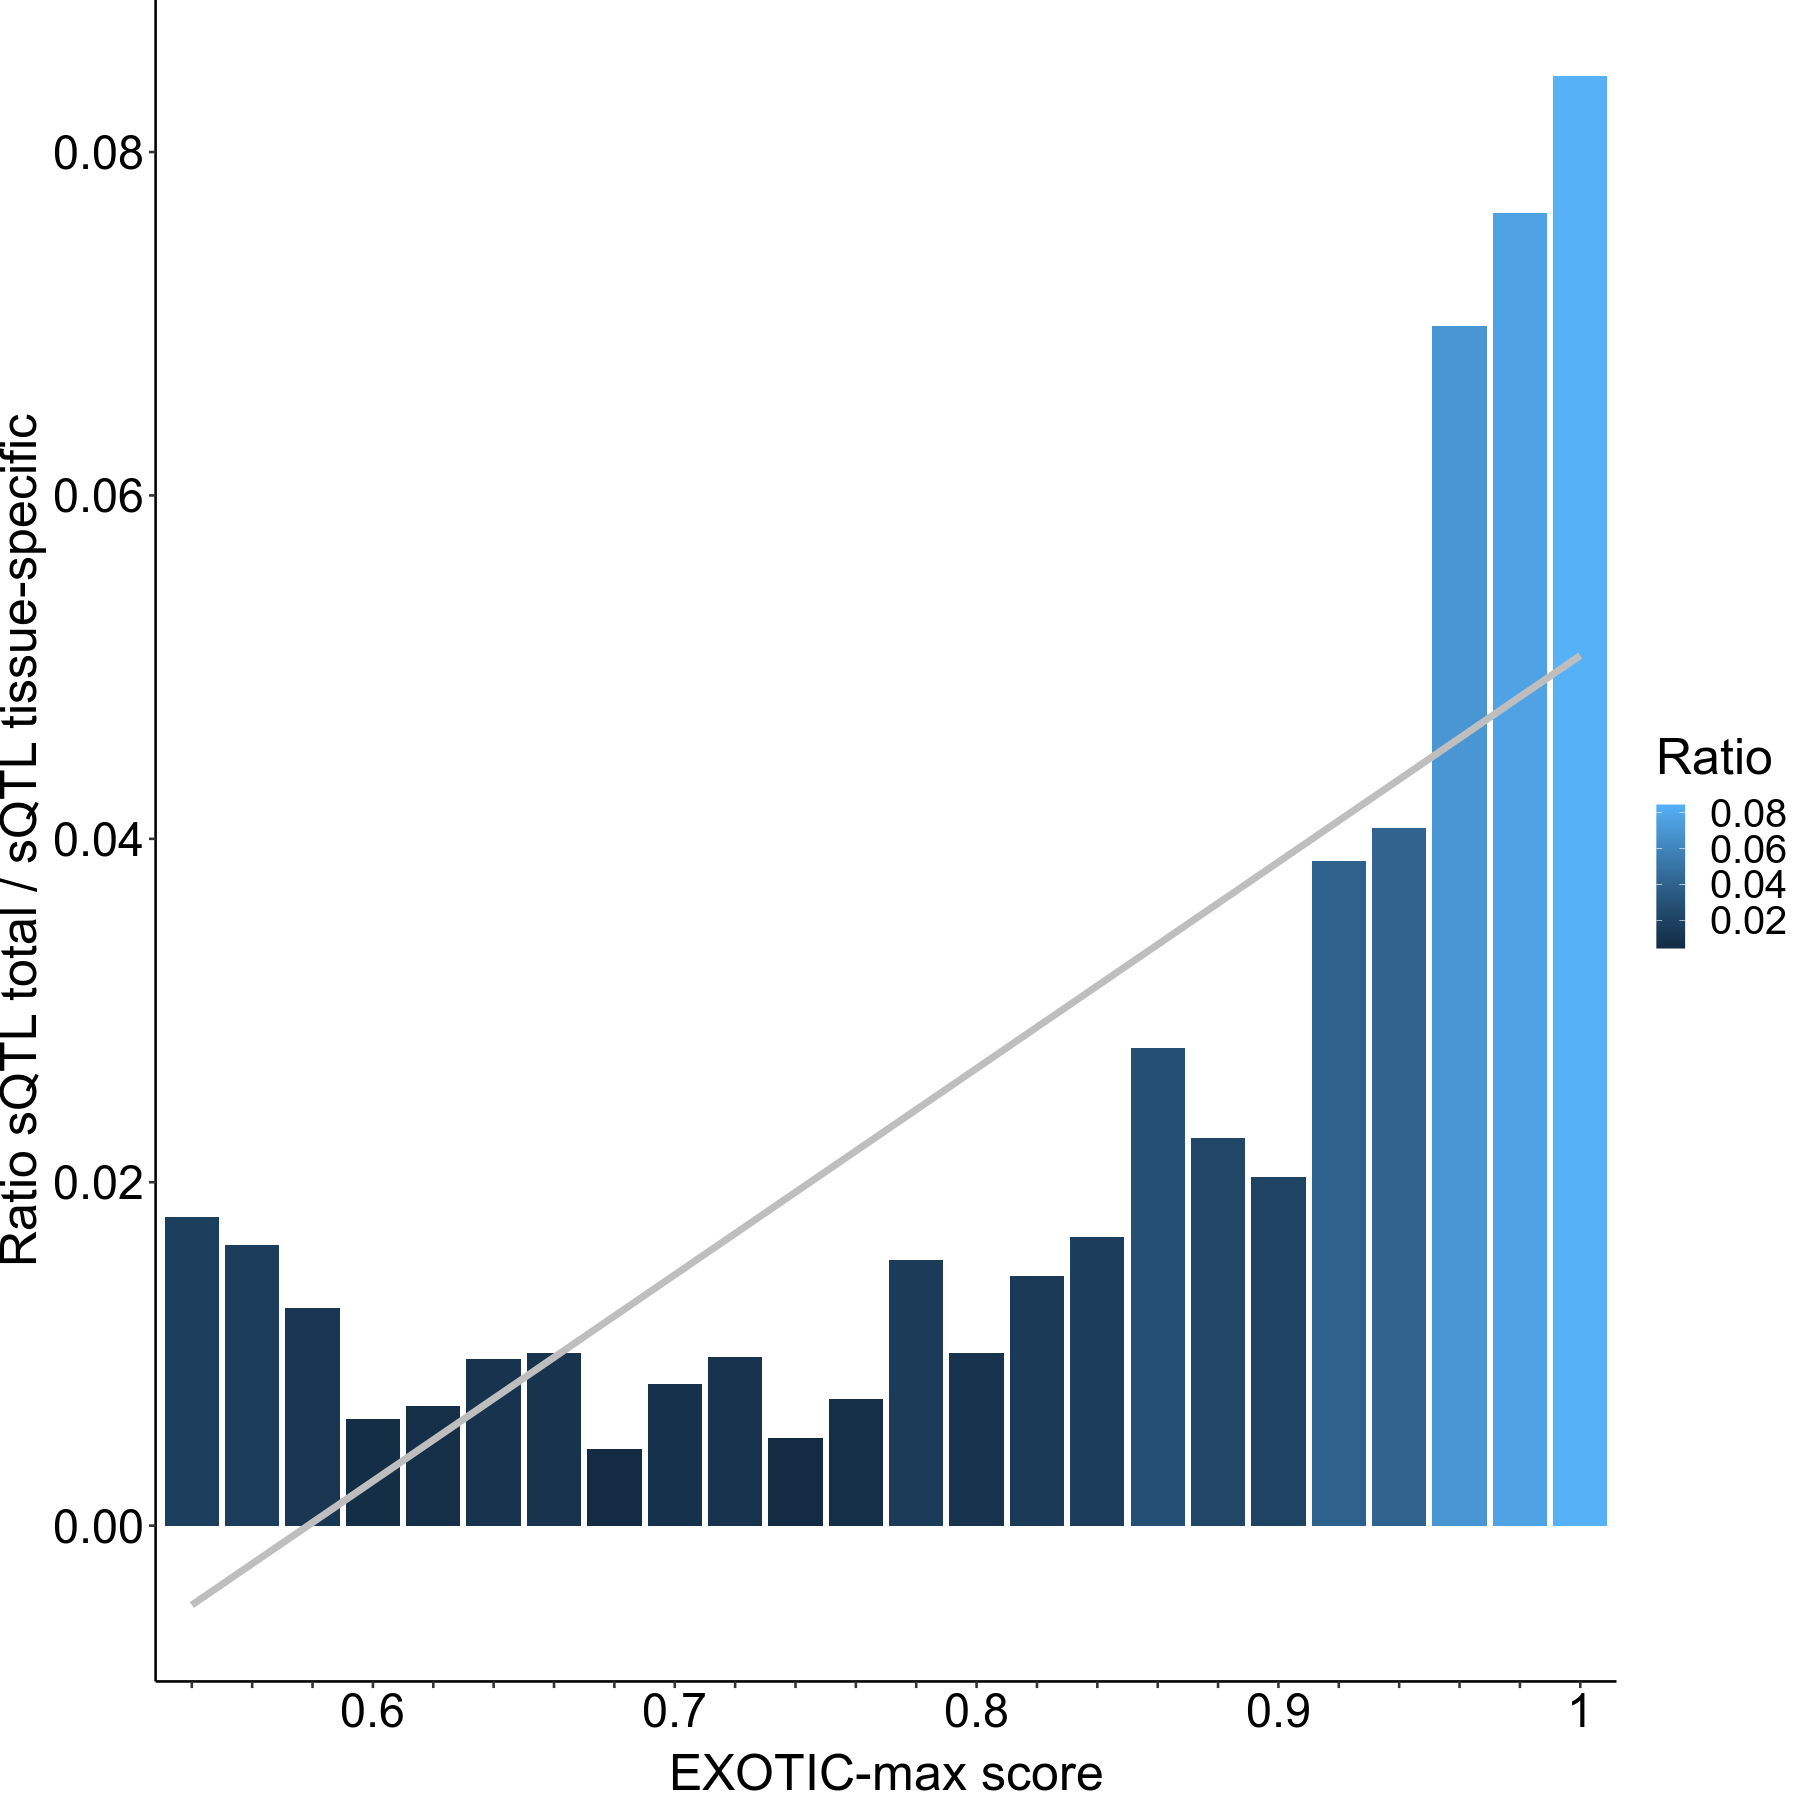

In [74]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_tissues_Rdata_final.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)

merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins

h1 <- ggplot(merge_exotic_sqtl_count, aes(x=EXOTIC_bins, y=Ratio_sQTL, fill=Ratio_sQTL)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
    scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio sQTL total / sQTL tissue-specific' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



In [107]:
pal_npg("nrc")(10)

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
 [7] "#91D1C2FF" "#DC0000FF" "#7E6148FF" "#B09C85FF"

### Fig X - EXOTIC-min ratio sQTL total / TS sQTL

New names:
* symbol -> symbol...3
* symbol -> symbol...6



EXOTIC_bins_min snpId symbol...3 Ratio_sQTL snpId_total symbol...6
1 0.0 - 0.05      13736 342        40.16374   70189       1513      
2 0.05 - 0.1      11745 360        32.62500   73124       1665      
3 0.1 - 0.15      12284 356        34.50562   71130       1479      
4 0.15 - 0.2       5533 185        29.90811   45363        907      
5 0.2 - 0.25       3573  92        38.83696   21599        418      
6 0.25 - 0.3       3342  56        59.67857   14353        250      
7 0.3 - 0.35       1422  60        23.70000    7908        194      
8 0.35 - 0.4       2992  86        34.79070    6974        162      
9 0.4 - 0.45       2026  44        46.04545    3115         65      
  Ratio_sQTL_total Ratio     Enrichment EXOTIC_bin_start Cumsum_total
1 46.39061         0.1957002 0.8657730  0.00             100.0000000 
2 43.91832         0.1606176 0.7428563  0.05              77.6293605 
3 48.09331         0.1726979 0.7174724  0.10              54.3232777 
4 50.01433         0.1219717 0.5979907  0.15              31.6527227 
5 51.67225         0.1654243 0.7516018  0.20              17.1946264 
6 57.41200         0.2328433 1.0394791  0.25              10.3105927 
7 40.76289         0.1798179 0.5814112  0.30               5.7360042 
8 43.04938         0.4290221 0.8081579  0.35               3.2155663 
9 47.92308         0.6504013 0.9608201  0.40               0.9928129 
  Cumsum_tissues
1 100.000000    
2  75.754152    
3  55.022682    
4  33.339805    
5  23.573332    
6  17.266517    
7  11.367447    
8   8.857430    
9   3.576157

Warning message:
“Unknown or uninitialised column: `EXOTIC_bin_start`.”
`geom_smooth()` using formula 'y ~ x'



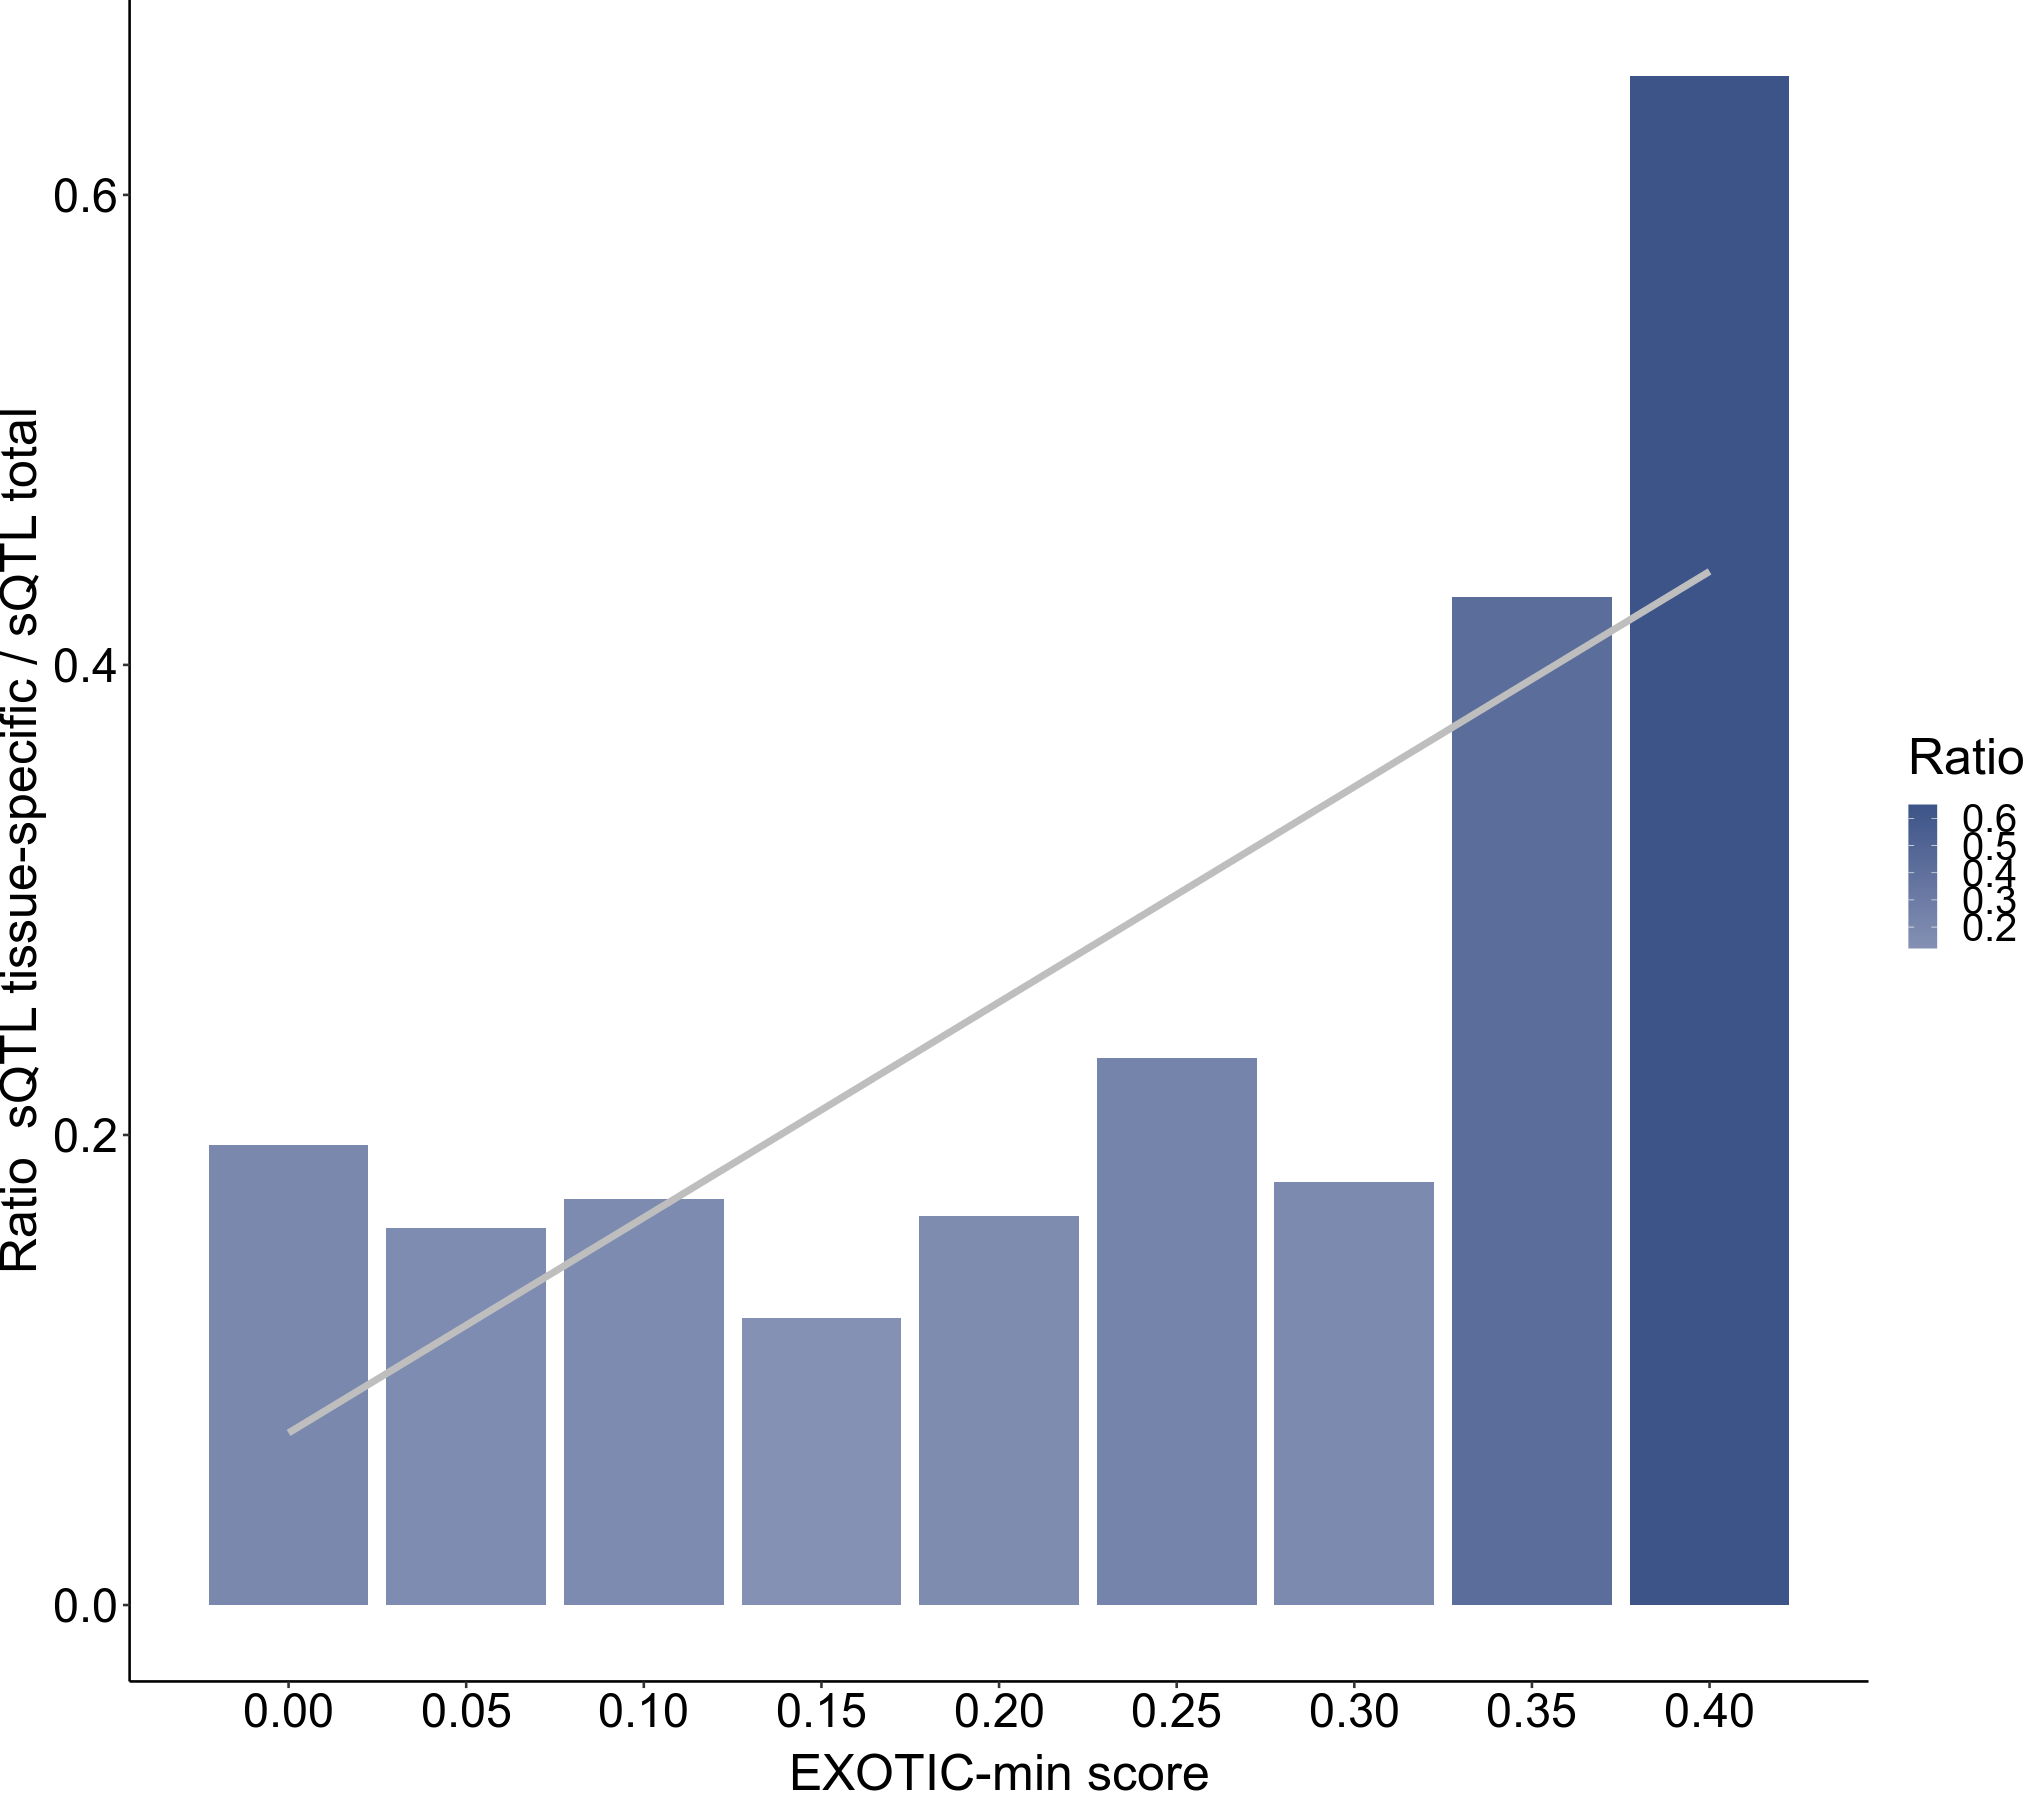

In [22]:
options(repr.plot.width=17, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start <= 0.30, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#8491B4FF", high="#3C5488FF") +
    scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 

#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-min score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



New names:
* symbol -> symbol...3
* symbol -> symbol...6



EXOTIC_bins_min snpId symbol...3 Ratio_sQTL snpId_total symbol...6
1  0.0 - 0.01      3355  66         50.83333   17197       353       
2  0.01 - 0.02     2384  76         31.36842   14813       338       
3  0.02 - 0.03     3663  86         42.59302   24055       413       
4  0.03 - 0.04     2971  95         31.27368   19474       402       
5  0.04 - 0.05     4007  90         44.52222   20591       447       
6  0.05 - 0.06     3967  98         40.47959   20143       438       
7  0.06 - 0.07     2323  80         29.03750   21931       436       
8  0.07 - 0.08     2614  88         29.70455   17777       436       
9  0.08 - 0.09     2110  79         26.70886   16920       435       
10 0.09 - 0.1      3190  93         34.30108   20633       434       
11 0.1 - 0.11      2746  98         28.02041   20751       457       
12 0.11 - 0.12     2595  83         31.26506   20940       404       
13 0.12 - 0.13     3466  89         38.94382   21076       400       
14 0.13 - 0.14     3654  92         39.71739   18691       370       
15 0.14 - 0.15     2587  70         36.95714   15379       306       
16 0.15 - 0.16     1763  61         28.90164   13996       291       
17 0.16 - 0.17     1611  47         34.27660   12961       241       
18 0.17 - 0.18      912  41         22.24390   11443       217       
19 0.18 - 0.19      877  31         28.29032    9546       193       
20 0.19 - 0.2       979  37         26.45946    8847       168       
21 0.2 - 0.21      1291  29         44.51724    7959       138       
   Ratio_sQTL_total Ratio      Enrichment EXOTIC_bin_start Cumsum_total
1  48.71671         0.19509217 1.0434475  0.00             100.00000   
2  43.82544         0.16093972 0.7157582  0.01              95.78521   
3  58.24455         0.15227603 0.7312791  0.02              92.15472   
4  48.44279         0.15256239 0.6455798  0.03              86.25912   
5  46.06488         0.19459958 0.9665113  0.04              81.48627   
6  45.98858         0.19694187 0.8802096  0.05              76.43965   
7  50.30046         0.10592312 0.5772810  0.06              71.50283   
8  40.77294         0.14704393 0.7285359  0.07              66.12780   
9  38.89655         0.12470449 0.6866640  0.08              61.77086   
10 47.54147         0.15460670 0.7214979  0.09              57.62397   
11 45.40700         0.13233097 0.6170944  0.10              52.56706   
12 51.83168         0.12392550 0.6032036  0.11              47.48123   
13 52.69000         0.16445246 0.7391122  0.12              42.34907   
14 50.51622         0.19549516 0.7862305  0.13              37.18359   
15 50.25817         0.16821640 0.7353460  0.14              32.60264   
16 48.09622         0.12596456 0.6009129  0.15              28.83343   
17 53.78008         0.12429596 0.6373474  0.16              25.40317   
18 52.73272         0.07969938 0.4218235  0.17              22.22658   
19 49.46114         0.09187094 0.5719707  0.18              19.42203   
20 52.66071         0.11065898 0.5024516  0.19              17.08242   
21 57.67391         0.16220631 0.7718783  0.20              14.91412   
   Cumsum_tissues
1  100.00000     
2   94.91559     
3   91.30270     
4   85.75152     
5   81.24905     
6   75.17655     
7   69.16467     
8   65.64423     
9   61.68278     
10  58.48513     
11  53.65077     
12  49.48929     
13  45.55663     
14  40.30400     
15  34.76647     
16  30.84594     
17  28.17416     
18  25.73273     
19  24.35062     
20  23.02155     
21  21.53790

Warning message:
“Unknown or uninitialised column: `EXOTIC_bin_start`.”
`geom_smooth()` using formula 'y ~ x'



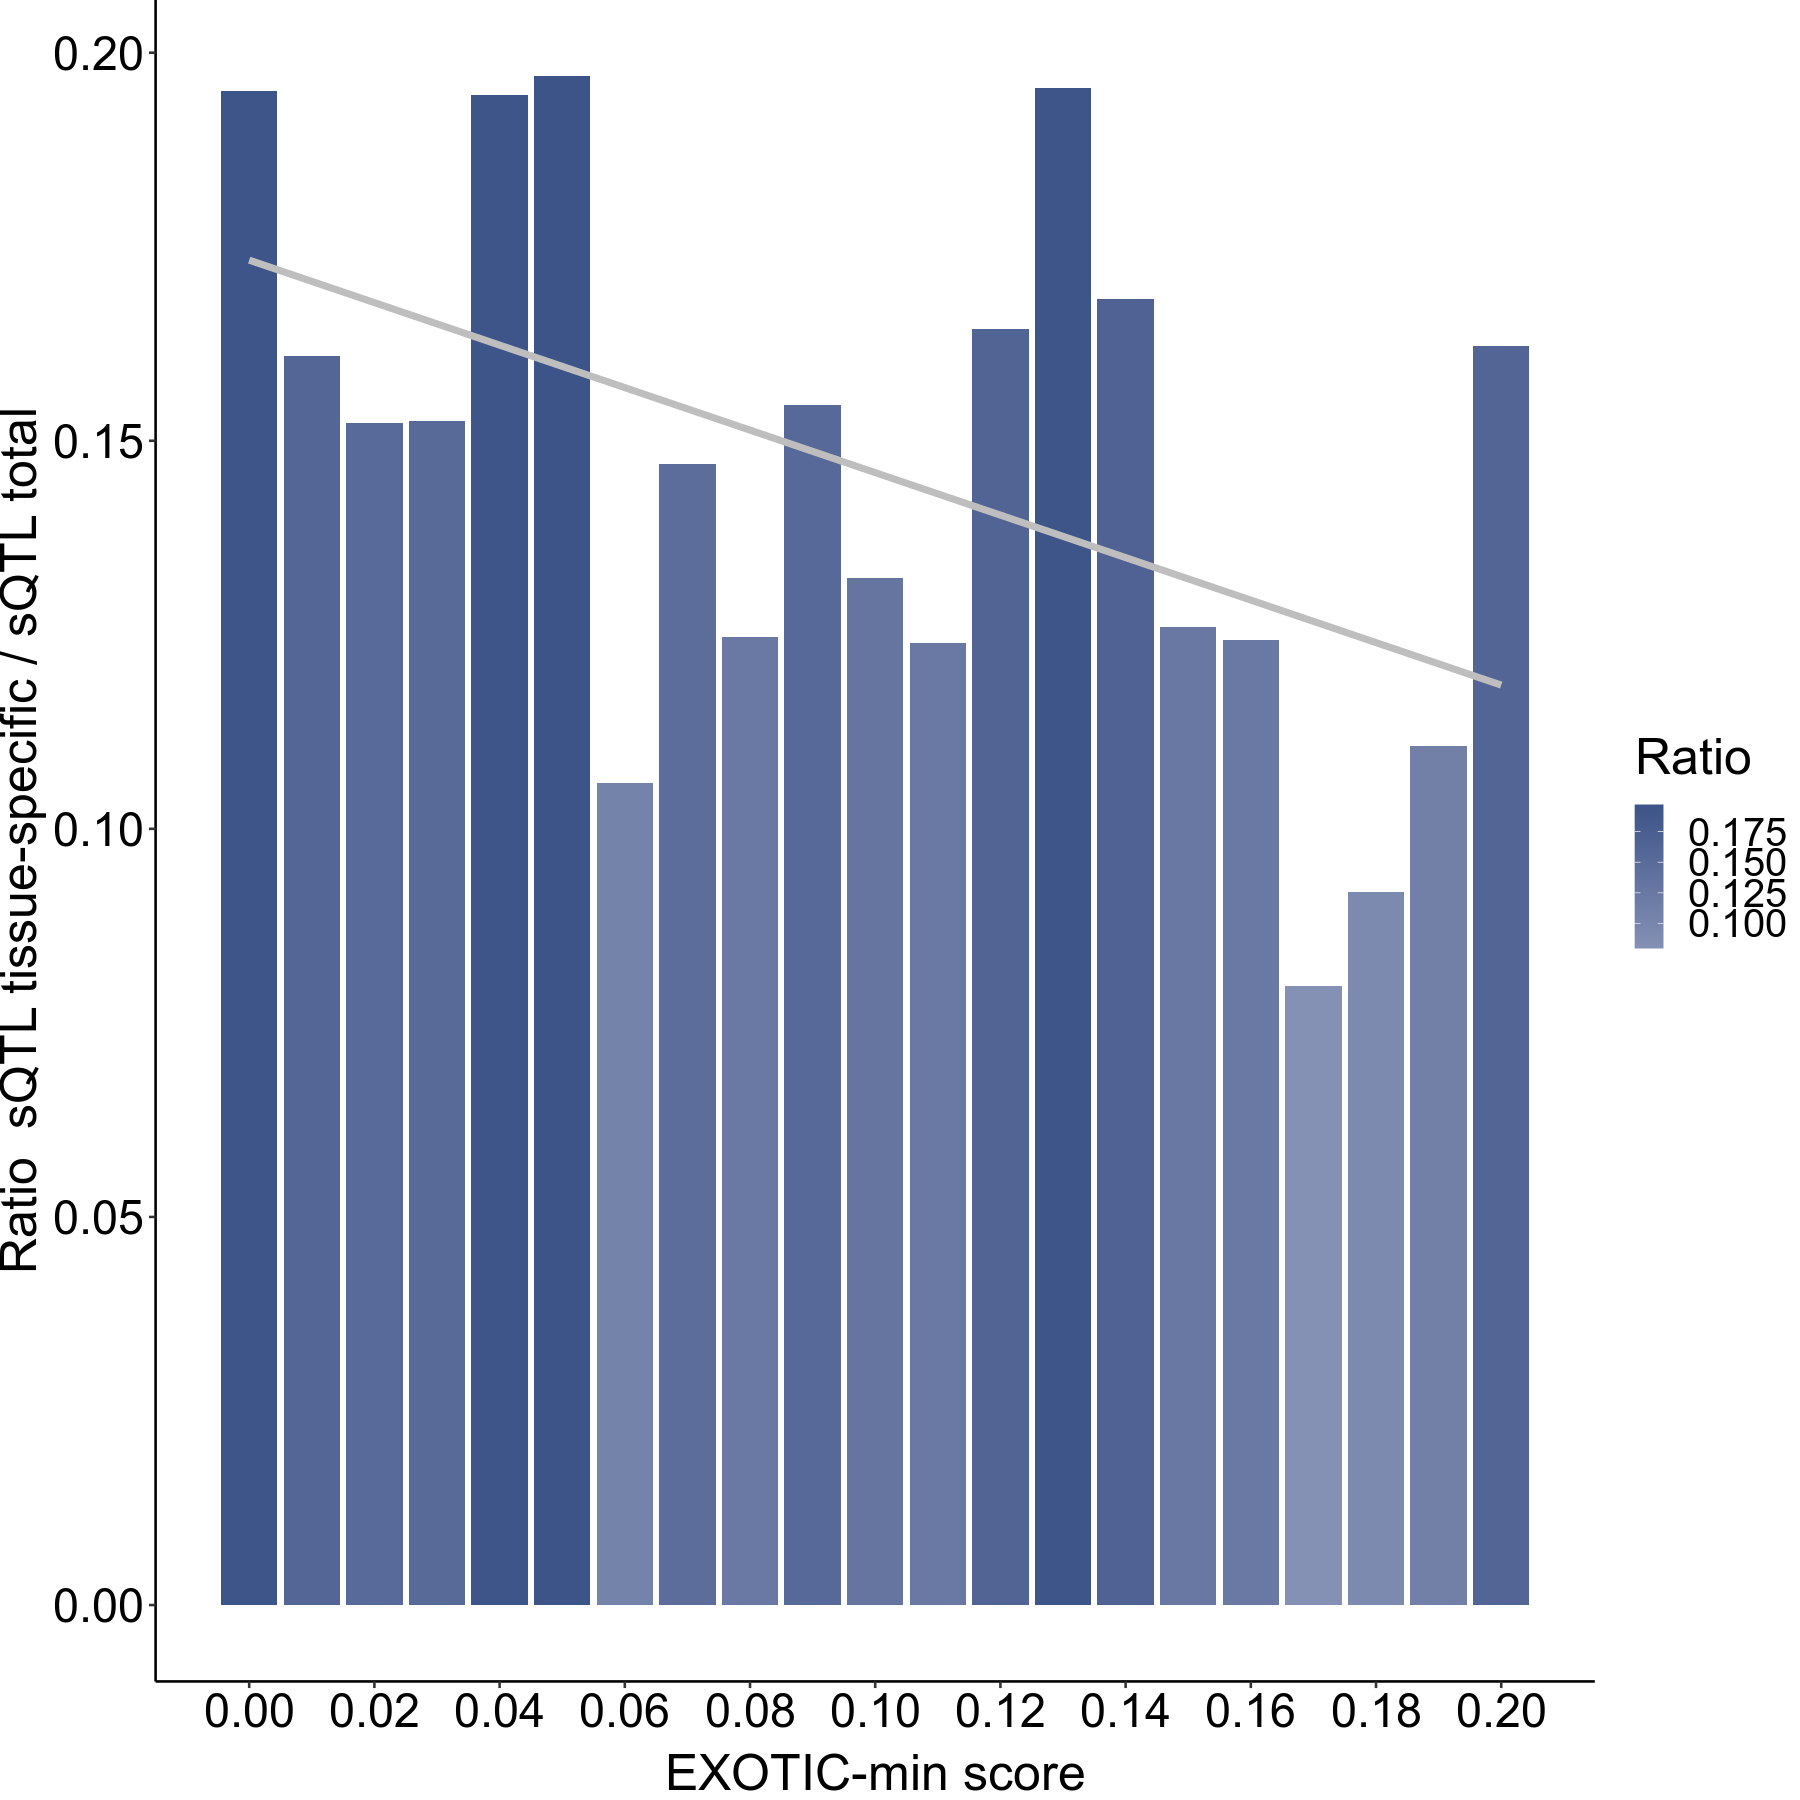

In [34]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-min_Rdata.xlsx')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start <= 0.20, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#8491B4FF", high="#3C5488FF") +
    scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.02),2)) + 

#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-min score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



### Fig X - EXOTIC-max ratio sQTL total / TS sQTL

New names:
* `` -> ...1



...1 EXOTIC_bins_down Total  TS    Ratio       EXOTIC_bin_start
1  0    0.5 - 0.55       560125  8611 0.015373354 0.55            
2  1    0.55 - 0.6       815810 12601 0.015445998 0.6             
3  2    0.6 - 0.65       541910  7863 0.014509789 0.65            
4  3    0.65 - 0.7       215116  5049 0.023471057 0.7             
5  4    0.7 - 0.75       161085  2590 0.016078468 0.75            
6  5    0.75 - 0.8       212565  1380 0.006492132 0.8             
7  6    0.8 - 0.85        67974  1789 0.026318887 0.85            
8  7    0.85 - 0.9        35004   929 0.026539824 0.9             
9  8    0.9 - 0.95        62352   671 0.010761483 0.95            
10 9    0.95 - 1.0        35017   398 0.011365908 1.0

`geom_smooth()` using formula 'y ~ x'



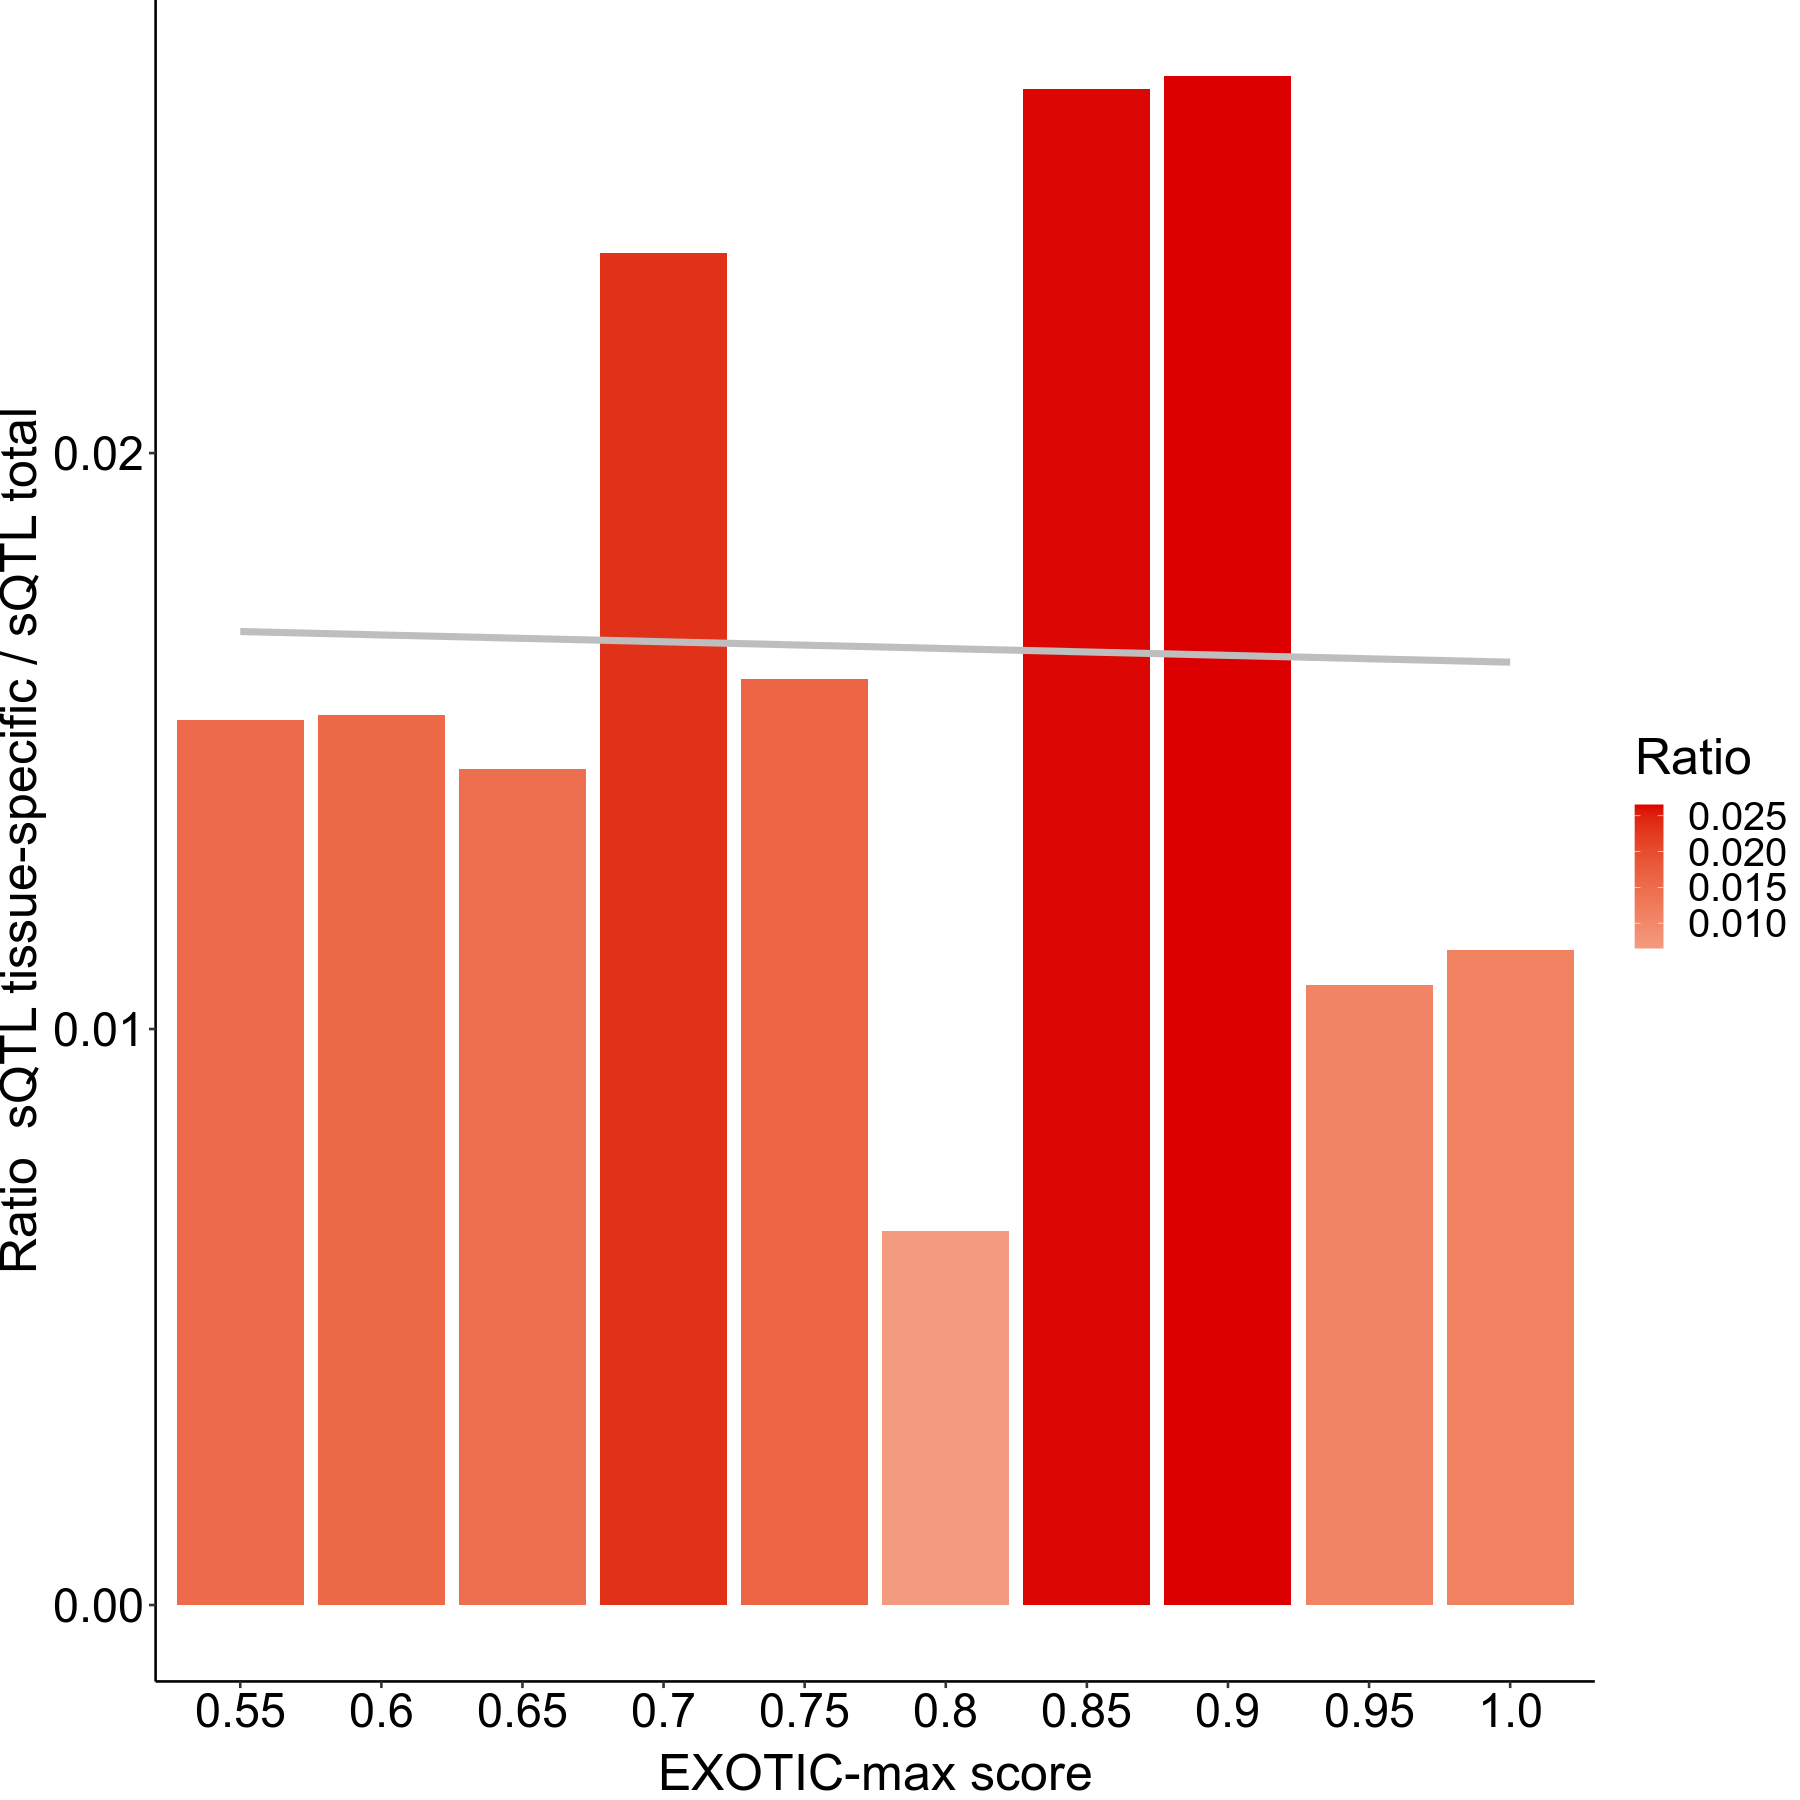

In [5]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-down_Rdata.xlsx')
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl$EXOTIC_bin_start <- merge_exotic_sqtl$EXOTIC_bin_start %>% mutate_if(is.character, as.dbl)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#F39B7FFF", high="#DC0000FF") +
#     scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



New names:
* `` -> ...1



...1 EXOTIC_bins_down Total  TS   Ratio       EXOTIC_bin_start
1 4    0.7 - 0.75       161085 2590 0.016078468 0.75            
2 5    0.75 - 0.8       212565 1380 0.006492132 0.8             
3 6    0.8 - 0.85        67974 1789 0.026318887 0.85            
4 7    0.85 - 0.9        35004  929 0.026539824 0.9             
5 8    0.9 - 0.95        62352  671 0.010761483 0.95            
6 9    0.95 - 1.0        35017  398 0.011365908 1.0

`geom_smooth()` using formula 'y ~ x'



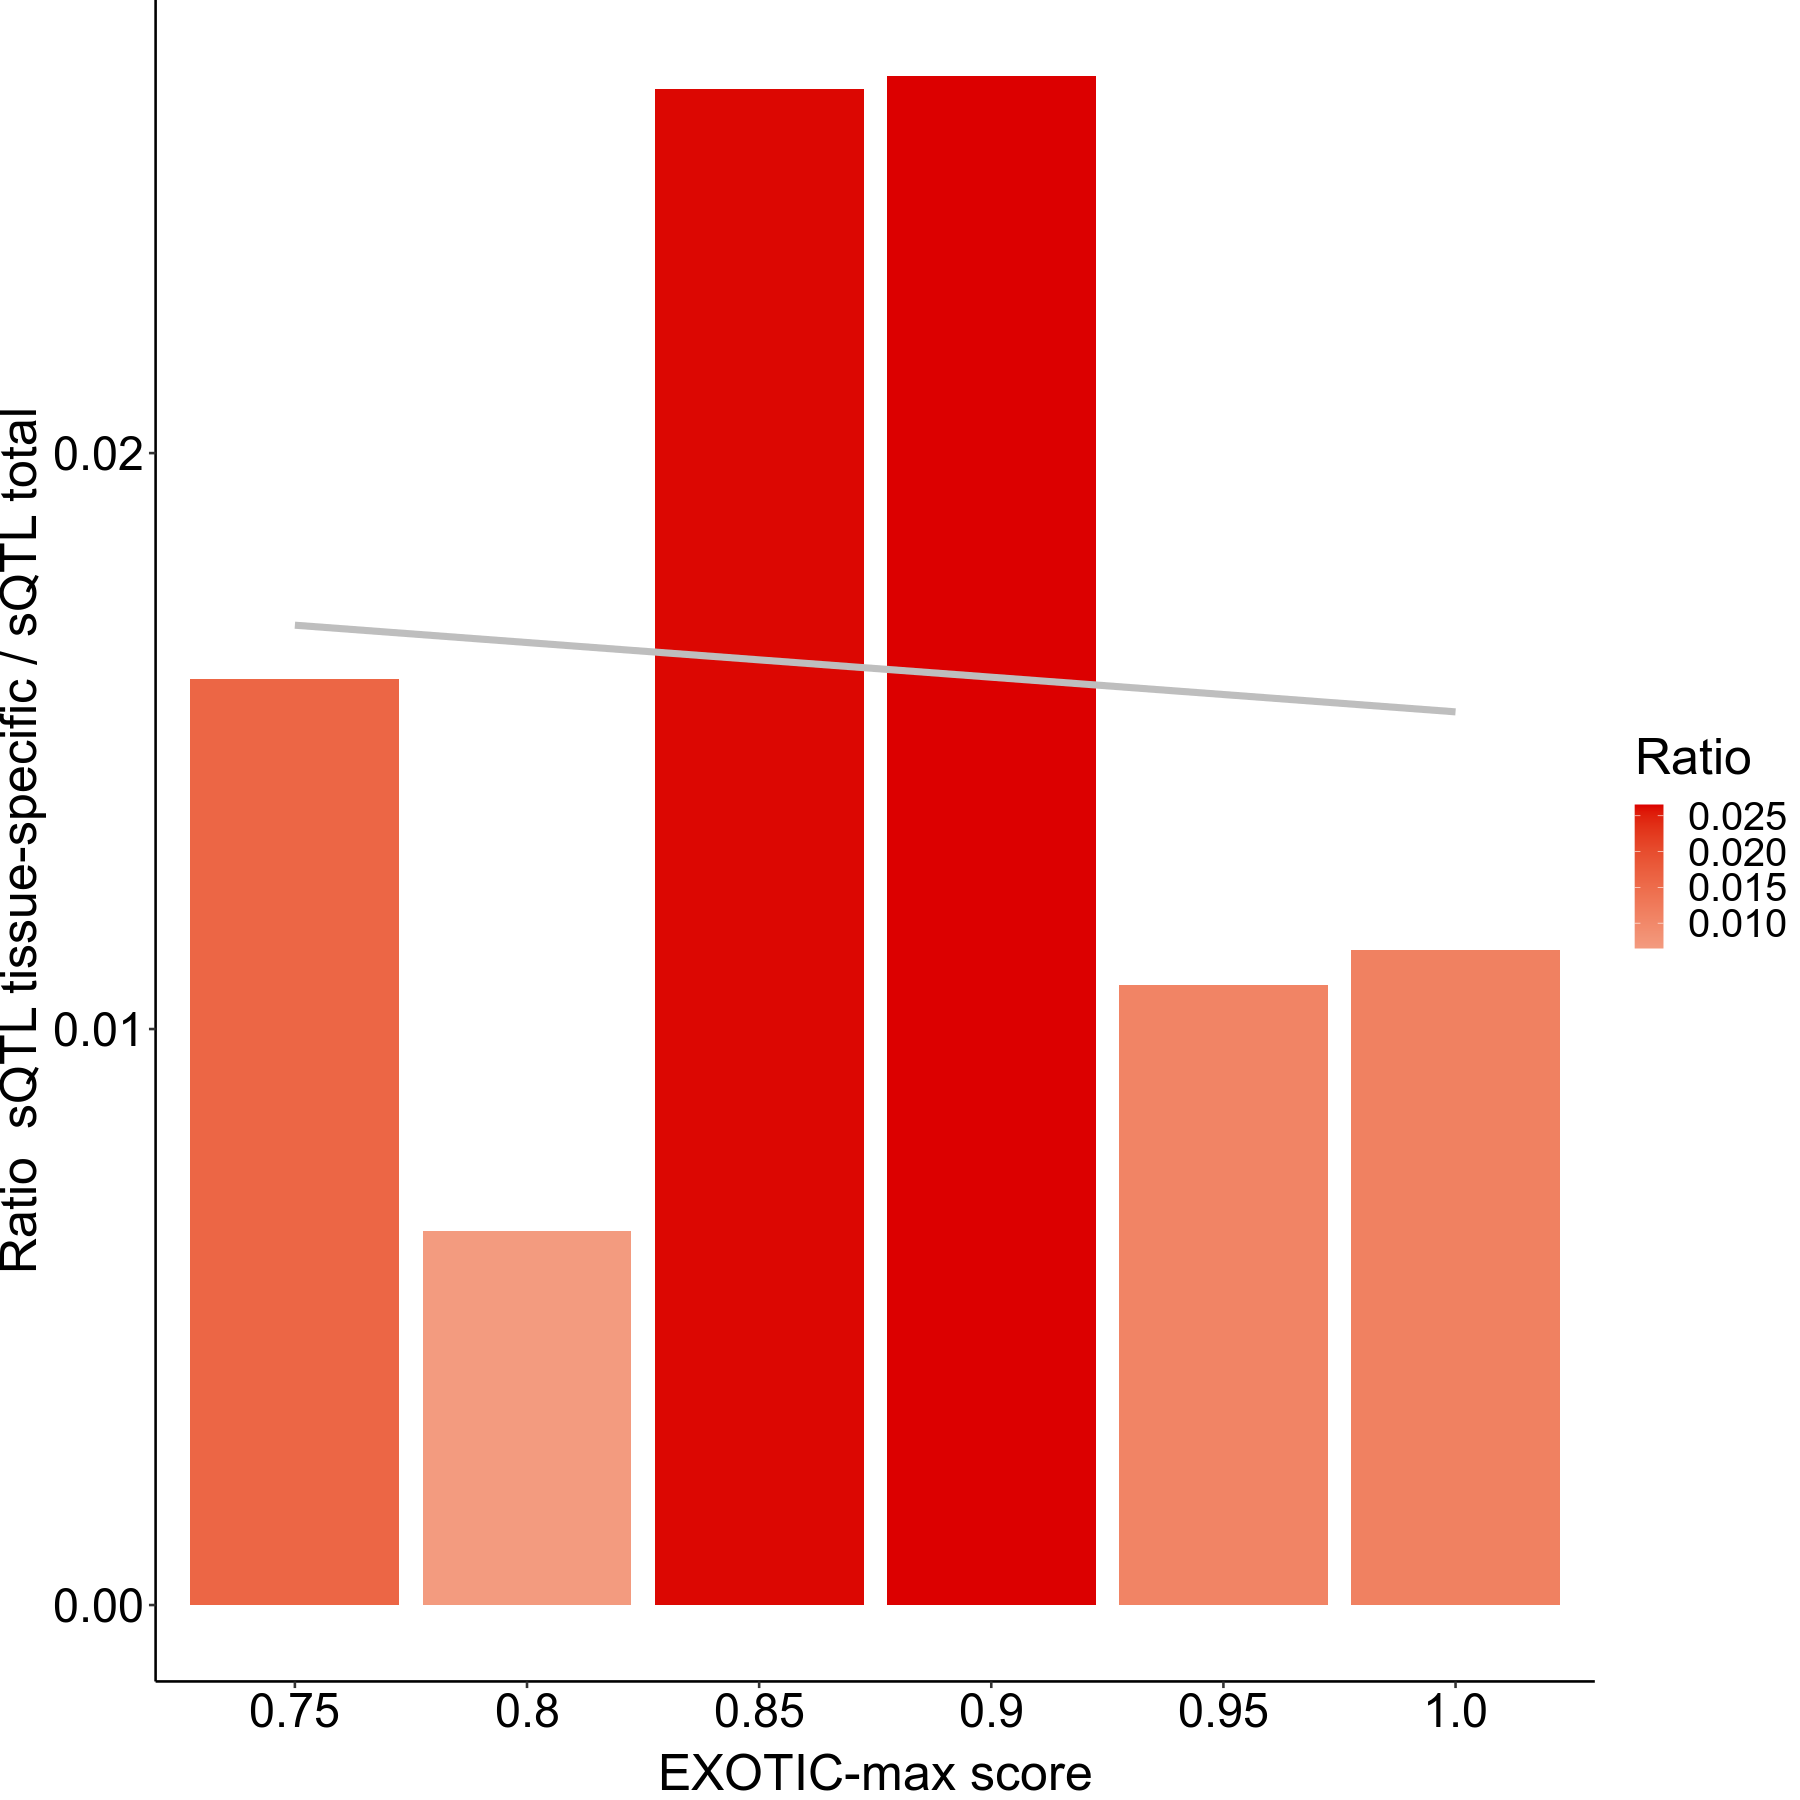

In [6]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-down_Rdata.xlsx')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl$EXOTIC_bin_start <- merge_exotic_sqtl$EXOTIC_bin_start %>% mutate_if(is.character, as.dbl)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#F39B7FFF", high="#DC0000FF") +
#     scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



In [3]:
merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
merge_exotic_sqtl

New names:
* `` -> ...1



...1 EXOTIC_bins_up Total  TS    Ratio      EXOTIC_bin_start
1  0    0.5 - 0.55     559696 22741 0.04063099 0.55            
2  1    0.55 - 0.6     771460 15537 0.02013974 0.6             
3  2    0.6 - 0.65     379805  9474 0.02494438 0.65            
4  3    0.65 - 0.7     212329  7411 0.03490338 0.7             
5  4    0.7 - 0.75     146442  3441 0.02349736 0.75            
6  5    0.75 - 0.8      51445   921 0.01790261 0.8             
7  6    0.8 - 0.85      68368   754 0.01102855 0.85            
8  7    0.85 - 0.9      48192   650 0.01348772 0.9             
9  8    0.9 - 0.95      16789   361 0.02150217 0.95            
10 9    0.95 - 1.0      15295   673 0.04400131 1.0

Loading required package: viridisLite

New names:
* `` -> ...1



...1 EXOTIC_bins_up Total  TS    Ratio      EXOTIC_bin_start
1  0    0.5 - 0.55     559696 22741 0.04063099 0.55            
2  1    0.55 - 0.6     771460 15537 0.02013974 0.6             
3  2    0.6 - 0.65     379805  9474 0.02494438 0.65            
4  3    0.65 - 0.7     212329  7411 0.03490338 0.7             
5  4    0.7 - 0.75     146442  3441 0.02349736 0.75            
6  5    0.75 - 0.8      51445   921 0.01790261 0.8             
7  6    0.8 - 0.85      68368   754 0.01102855 0.85            
8  7    0.85 - 0.9      48192   650 0.01348772 0.9             
9  8    0.9 - 0.95      16789   361 0.02150217 0.95            
10 9    0.95 - 1.0      15295   673 0.04400131 1.0

`geom_smooth()` using formula 'y ~ x'



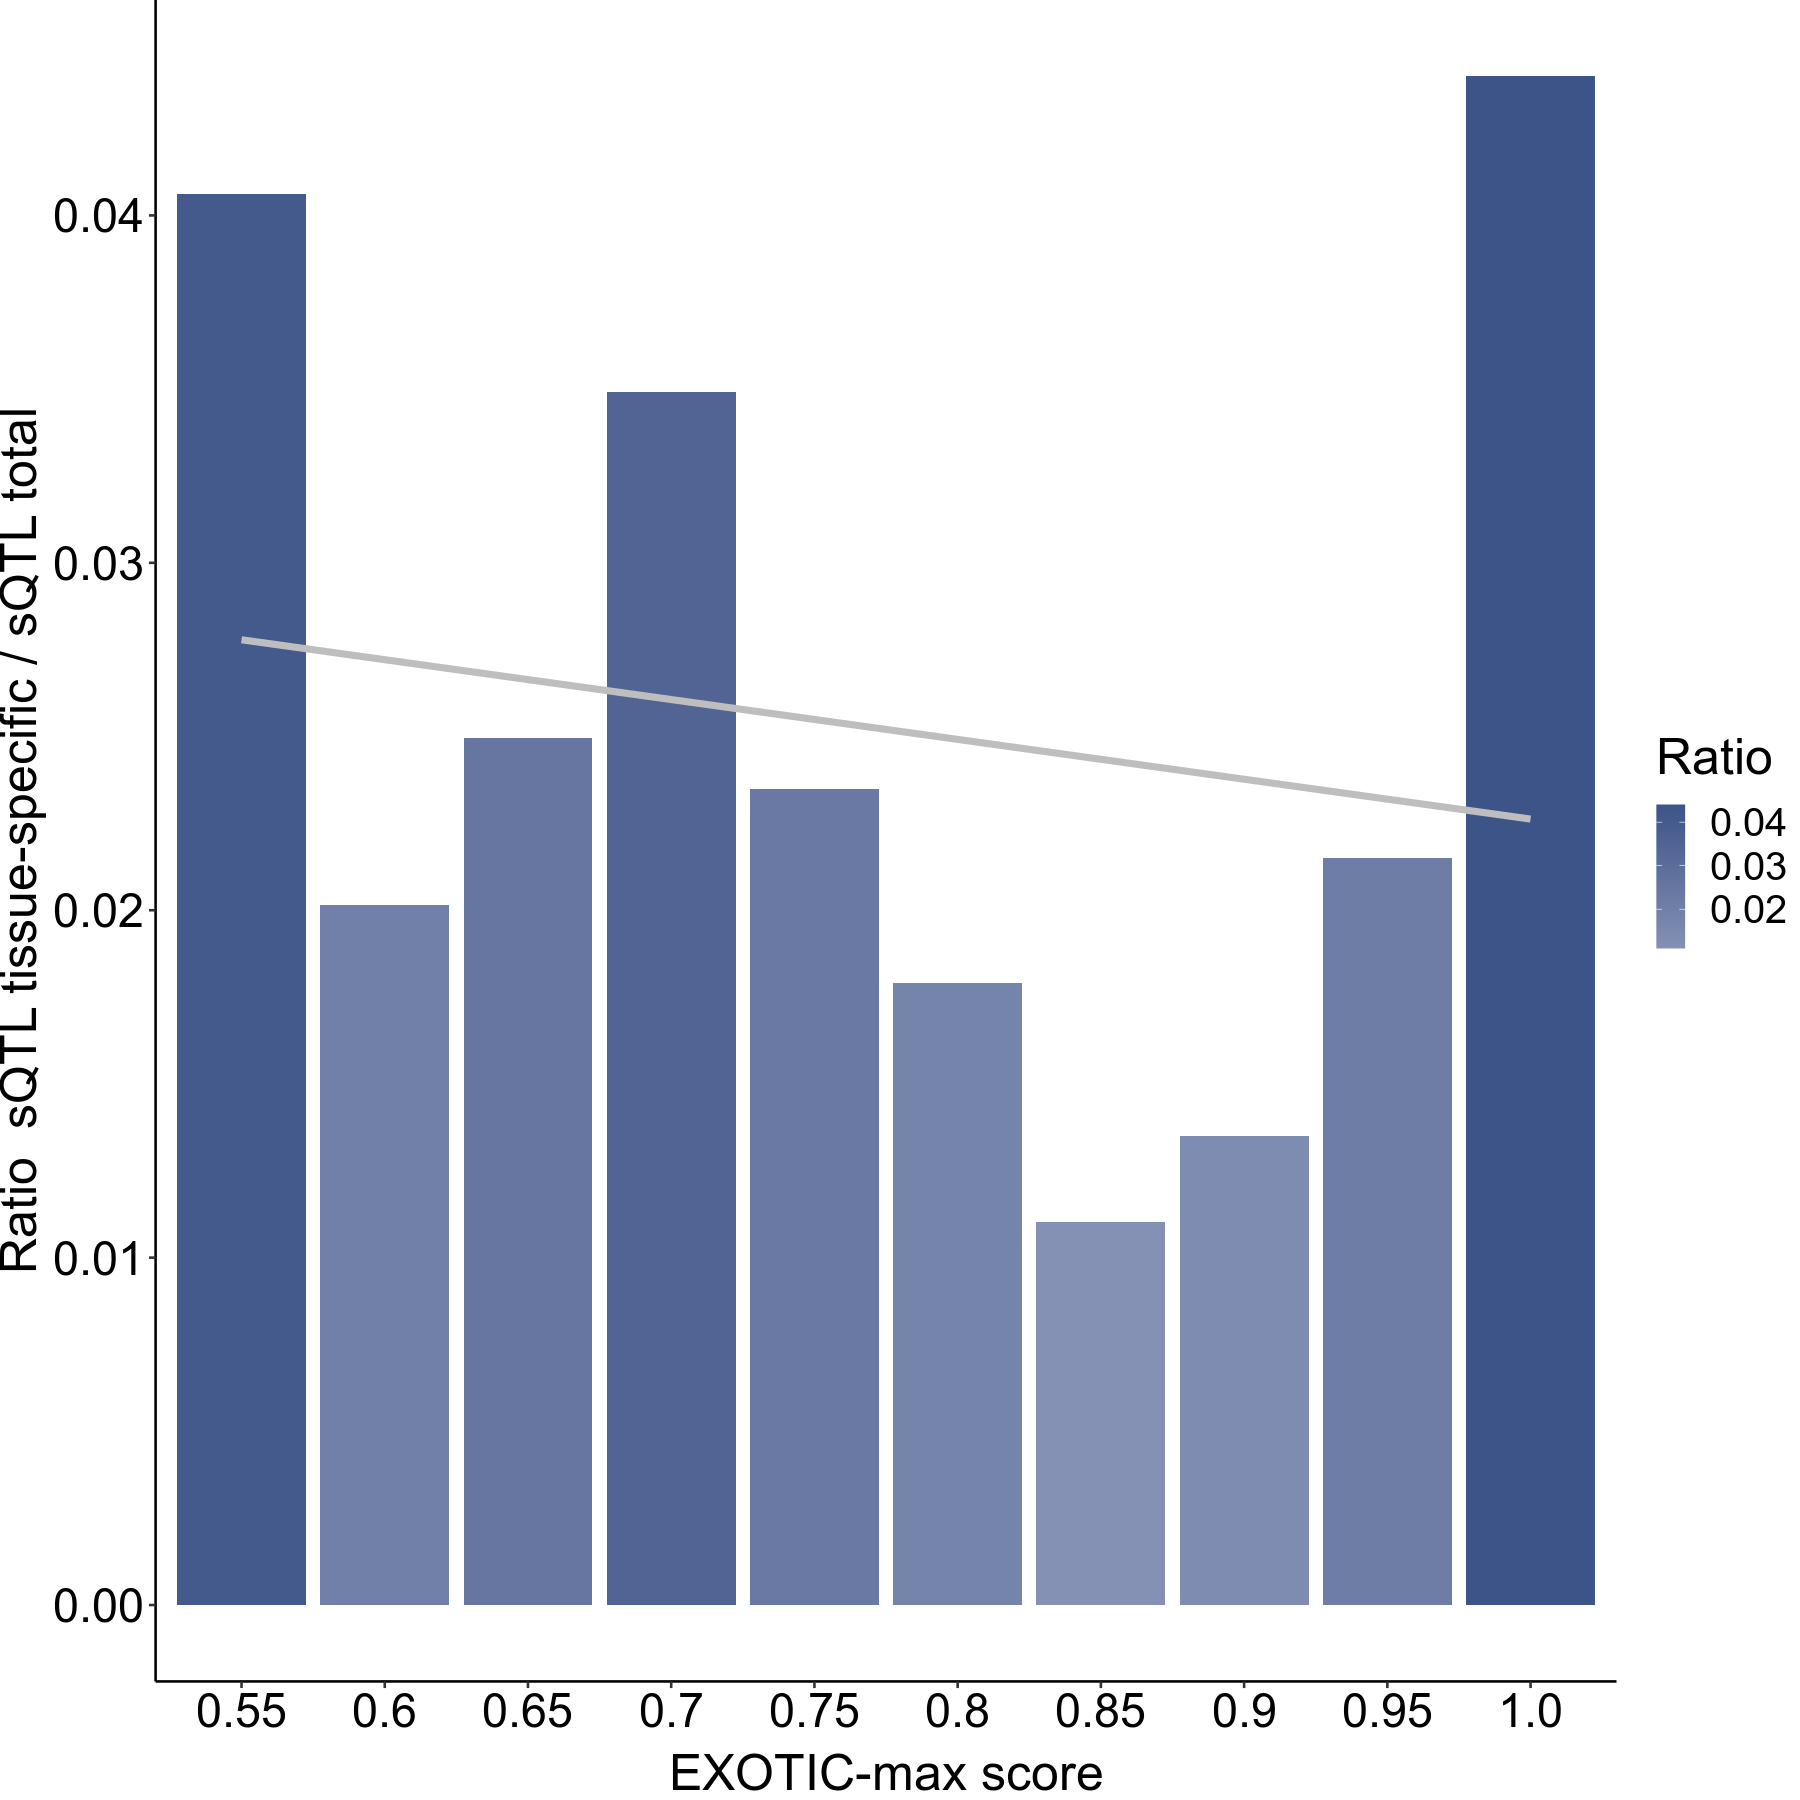

In [2]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl$EXOTIC_bin_start <- merge_exotic_sqtl$EXOTIC_bin_start %>% mutate_if(is.character, as.dbl)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#8491B4FF", high="#3C5488FF") +
#     scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



New names:
* `` -> ...1



...1 EXOTIC_bins_up Total  TS   Ratio      EXOTIC_bin_start
1 4    0.7 - 0.75     146442 3441 0.02349736 0.75            
2 5    0.75 - 0.8      51445  921 0.01790261 0.8             
3 6    0.8 - 0.85      68368  754 0.01102855 0.85            
4 7    0.85 - 0.9      48192  650 0.01348772 0.9             
5 8    0.9 - 0.95      16789  361 0.02150217 0.95            
6 9    0.95 - 1.0      15295  673 0.04400131 1.0

`geom_smooth()` using formula 'y ~ x'



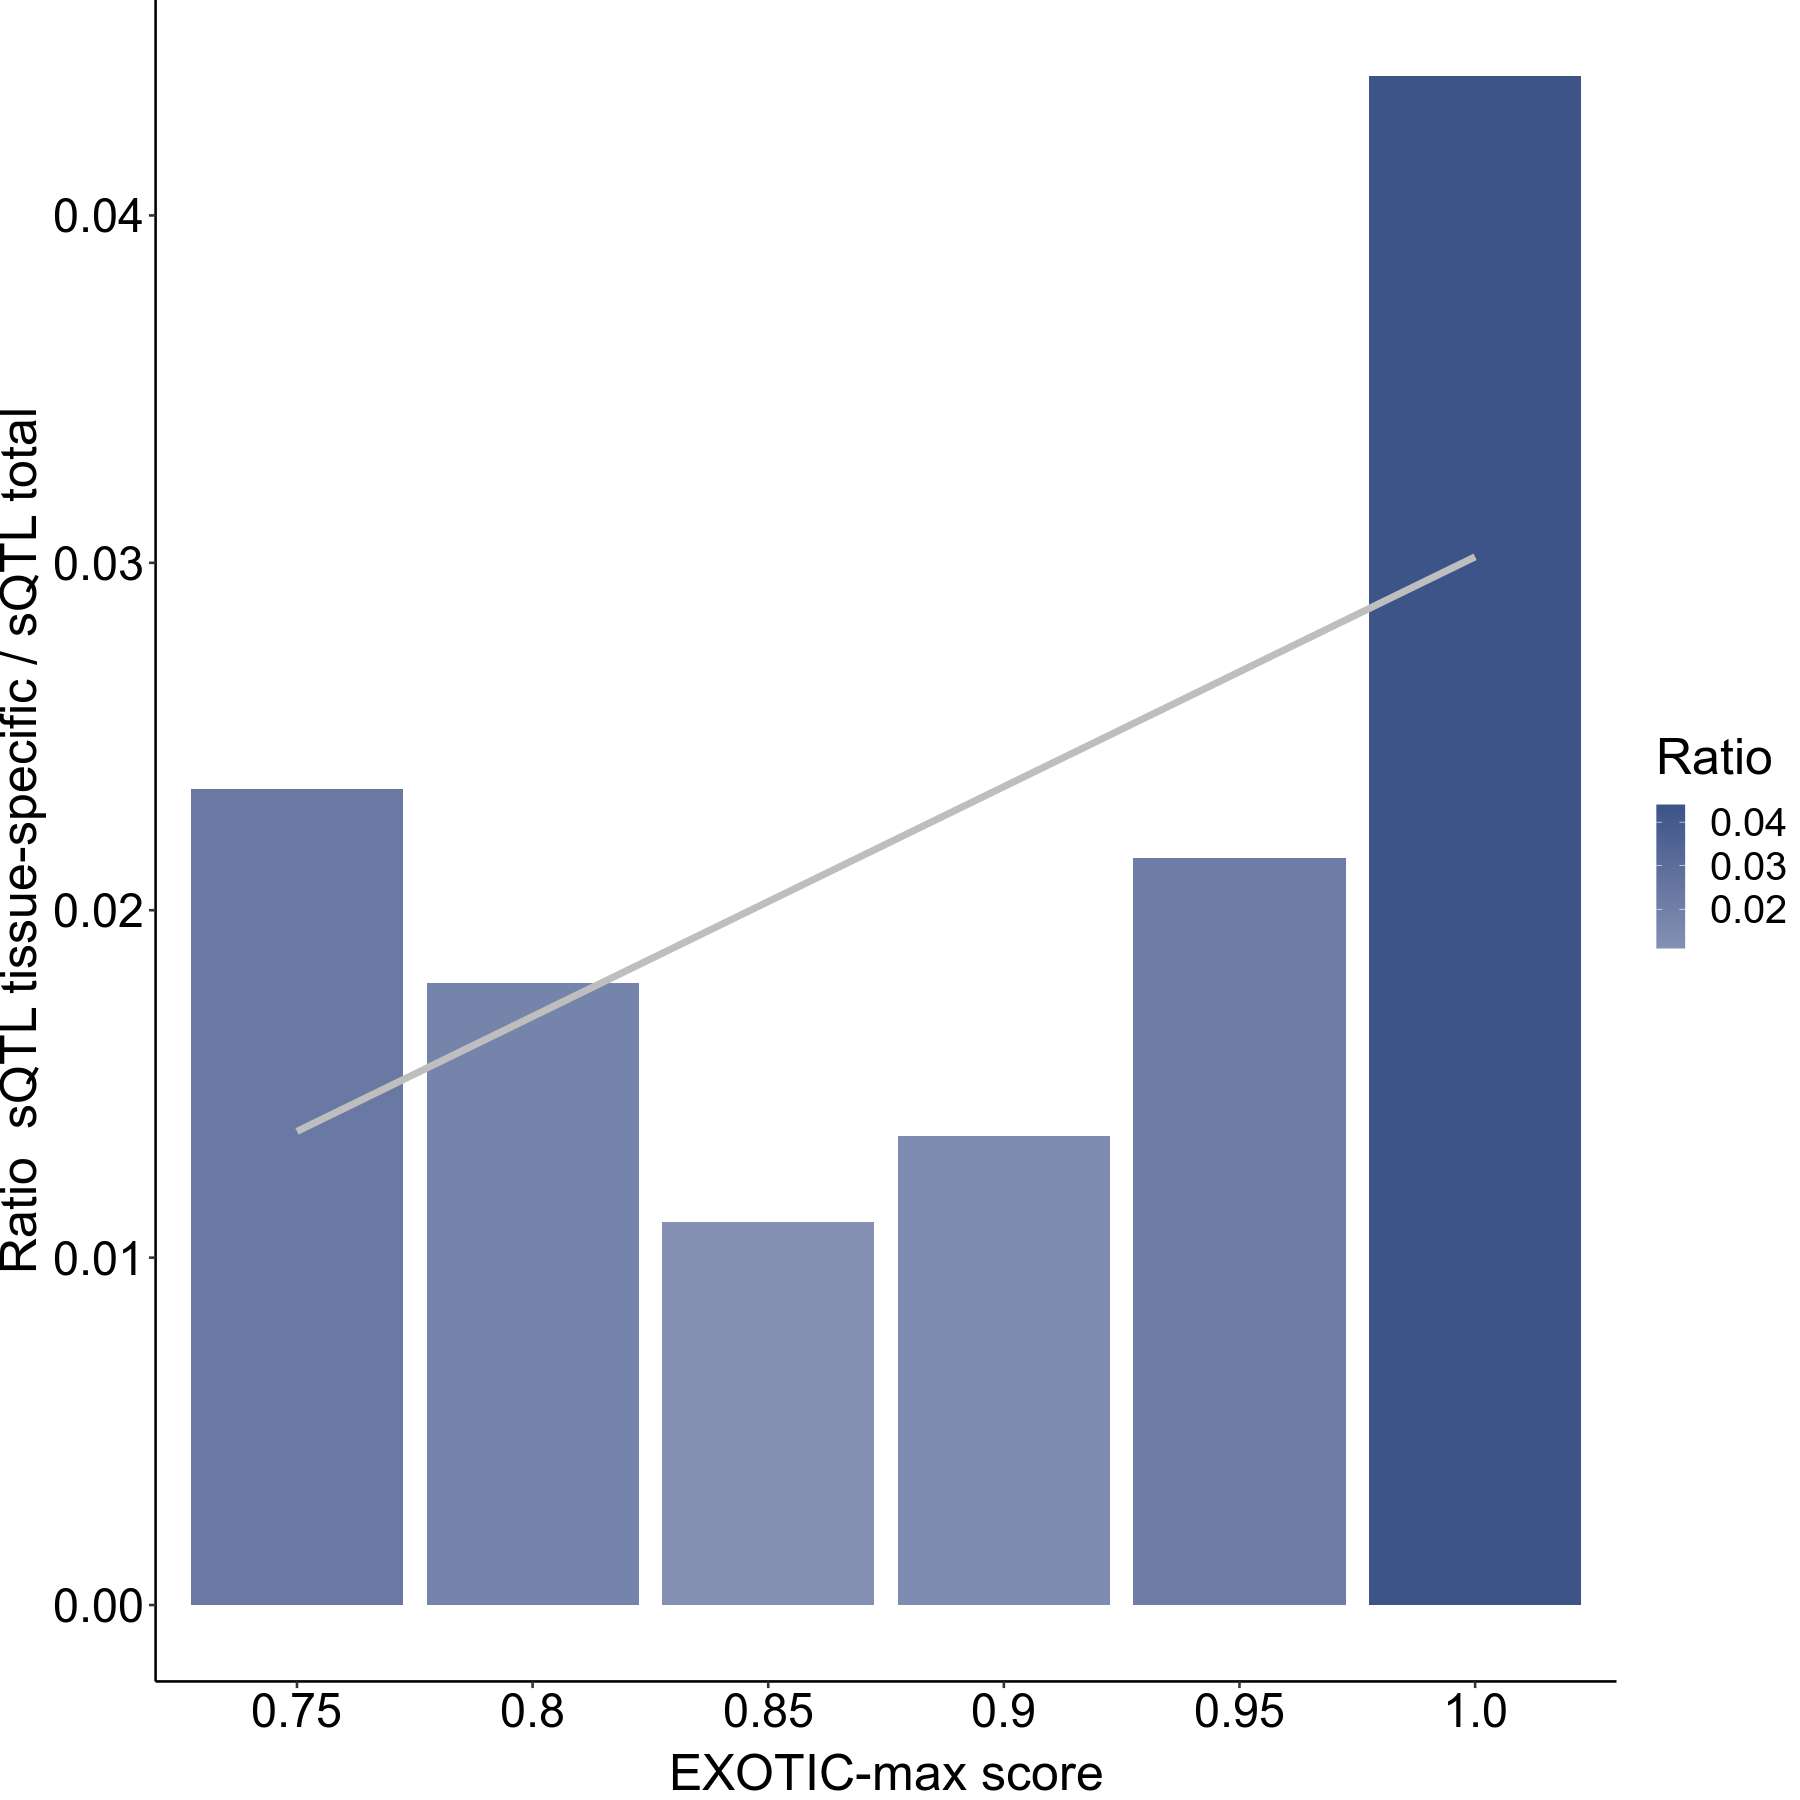

In [3]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/qtl_enrichment_modified_zscore_EXOTIC-up_Rdata.xlsx')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl$EXOTIC_bin_start <- merge_exotic_sqtl$EXOTIC_bin_start %>% mutate_if(is.character, as.dbl)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#8491B4FF", high="#3C5488FF") +
#     scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



New names:
* symbol -> symbol...3
* symbol -> symbol...6



EXOTIC_bins_max snpId symbol...3 Ratio_sQTL snpId_total symbol...6
1  0.5 - 0.55        542  12        45.16667     782         16      
2  0.55 - 0.6        775  28        27.67857    1944         55      
3  0.6 - 0.65        814  23        35.39130    2962         67      
4  0.65 - 0.7        726  27        26.88889    5612        135      
5  0.7 - 0.75        774  28        27.64286    8801        195      
6  0.75 - 0.8       1603  62        25.85484   17594        426      
7  0.8 - 0.85       5952 163        36.51534   39810        910      
8  0.85 - 0.9      11905 363        32.79614   73091       1586      
9  0.9 - 0.95      16589 446        37.19507   77867       1692      
10 0.95 - 1.0      17300 392        44.13265   68556       1402      
   Ratio_sQTL_total Ratio      Enrichment EXOTIC_bin_start Cumsum_total
1  48.87500         0.69309463 0.9241262  0.55               0.2632828 
2  35.34545         0.39866255 0.7830872  0.60               0.9177864 
3  44.20896         0.27481431 0.8005460  0.65               1.9150290 
4  41.57037         0.12936565 0.6468282  0.70               3.8044704 
5  45.13333         0.08794455 0.6124710  0.75               6.7675805 
6  41.30047         0.09111061 0.6260180  0.80              12.6911073 
7  43.74725         0.14951017 0.8346887  0.85              26.0942903 
8  46.08512         0.16287915 0.7116428  0.90              50.7024803 
9  46.02069         0.21304275 0.8082250  0.95              76.9186483 
10 48.89872         0.25234845 0.9025319  1.00             100.0000000 
   Cumsum_tissues
1    0.951211    
2    2.311337    
3    3.739909    
4    5.014040    
5    6.372411    
6    9.185679    
7   19.631450    
8   40.524746    
9   69.638470    
10 100.000000

Warning message:
“Unknown or uninitialised column: `EXOTIC_bin_start`.”
`geom_smooth()` using formula 'y ~ x'



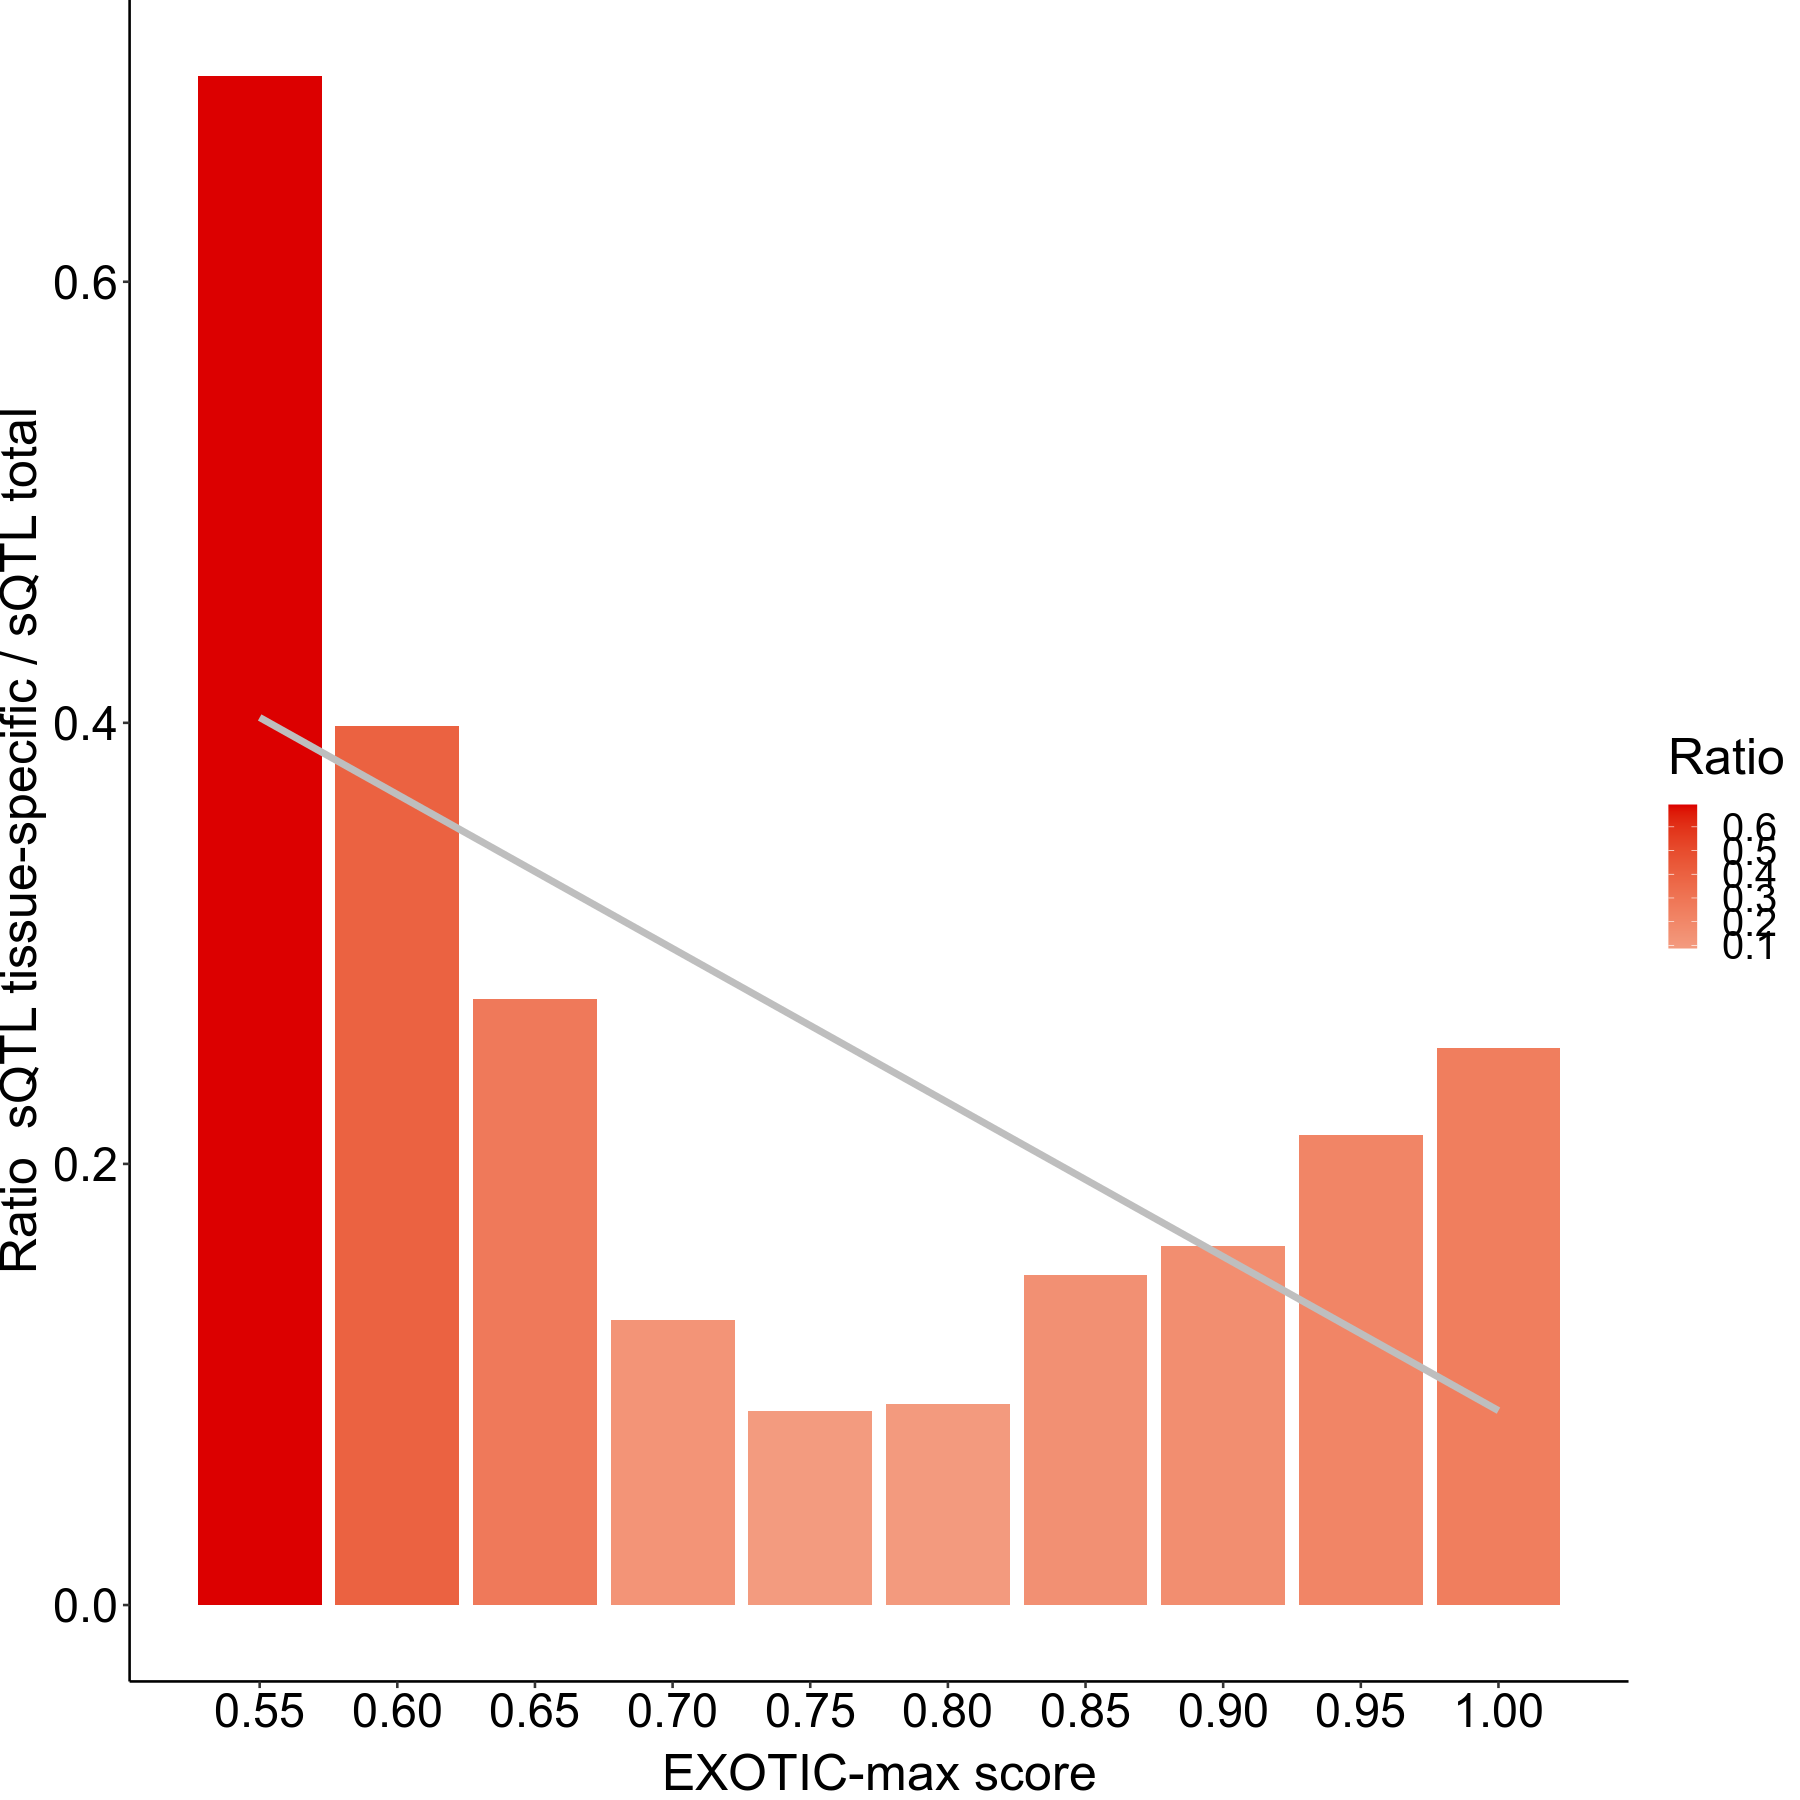

In [21]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]

merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#F39B7FFF", high="#DC0000FF") +
    scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.05),2)) + 


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



New names:
* symbol -> symbol...3
* symbol -> symbol...6



EXOTIC_bins_max snpId symbol...3 Ratio_sQTL snpId_total symbol...6
1  0.79 - 0.8       494   20        24.70000    5968       143       
2  0.8 - 0.81      1291   23        56.13043    9029       165       
3  0.81 - 0.82     1443   34        42.44118    9596       213       
4  0.82 - 0.83      976   36        27.11111    8986       212       
5  0.83 - 0.84     1103   41        26.90244   12132       257       
6  0.84 - 0.85     2166   62        34.93548   10760       289       
7  0.85 - 0.86     1906   73        26.10959   16461       345       
8  0.86 - 0.87     3010   81        37.16049   18675       391       
9  0.87 - 0.88     3688  101        36.51485   19485       419       
10 0.88 - 0.89     3545  101        35.09901   24467       464       
11 0.89 - 0.9      3423  106        32.29245   23098       478       
12 0.9 - 0.91      4380  119        36.80672   21570       456       
13 0.91 - 0.92     4912  104        47.23077   23151       454       
14 0.92 - 0.93     2752   96        28.66667   20936       445       
15 0.93 - 0.94     3688  103        35.80583   18533       426       
16 0.94 - 0.95     5431  132        41.14394   23856       449       
17 0.95 - 0.96     4908  101        48.59406   21748       407       
18 0.96 - 0.97     5062  106        47.75472   20009       426       
19 0.97 - 0.98     4004   83        48.24096   17067       339       
20 0.98 - 0.99     4231   97        43.61856   18329       332       
21 0.99 - 1.0      4629  101        45.83168   18170       319       
   Ratio_sQTL_total Ratio      Enrichment EXOTIC_bin_start Cumsum_total
1  41.73427         0.08277480 0.5918398  0.80              10.71183   
2  54.72121         0.14298372 1.0257528  0.81              12.97602   
3  45.05164         0.15037516 0.9420561  0.82              15.38240   
4  42.38679         0.10861340 0.6396122  0.83              17.63580   
5  47.20623         0.09091658 0.5698918  0.84              20.67813   
6  37.23183         0.20130112 0.9383229  0.85              23.37640   
7  47.71304         0.11578883 0.5472212  0.86              27.50430   
8  47.76215         0.16117805 0.7780323  0.87              32.18740   
9  46.50358         0.18927380 0.7852052  0.88              37.07363   
10 52.73060         0.14488903 0.6656288  0.89              43.20919   
11 48.32218         0.14819465 0.6682740  0.90              49.00144   
12 47.30263         0.20305981 0.7781115  0.91              54.41052   
13 50.99339         0.21217226 0.9262135  0.92              60.21606   
14 47.04719         0.13144822 0.6093173  0.93              65.46615   
15 43.50469         0.19899638 0.8230336  0.94              70.11365   
16 53.13140         0.22765761 0.7743808  0.95              76.09598   
17 53.43489         0.22567592 0.9094069  0.96              81.54970   
18 46.96948         0.25298616 1.0167179  0.97              86.56733   
19 50.34513         0.23460479 0.9582051  0.98              90.84720   
20 55.20783         0.23083638 0.7900792  0.99              95.44353   
21 56.95925         0.25476059 0.8046399  1.00             100.00000   
   Cumsum_tissues
1    7.870364    
2    9.657636    
3   11.655338    
4   13.006521    
5   14.533523    
6   17.532153    
7   20.170836    
8   24.337906    
9   29.443606    
10  34.351335    
11  39.090167    
12  45.153877    
13  51.954093    
14  55.763986    
15  60.869686    
16  68.388410    
17  75.183088    
18  82.190965    
19  87.734138    
20  93.591572    
21 100.000000

Warning message:
“Unknown or uninitialised column: `EXOTIC_bin_start`.”
`geom_smooth()` using formula 'y ~ x'



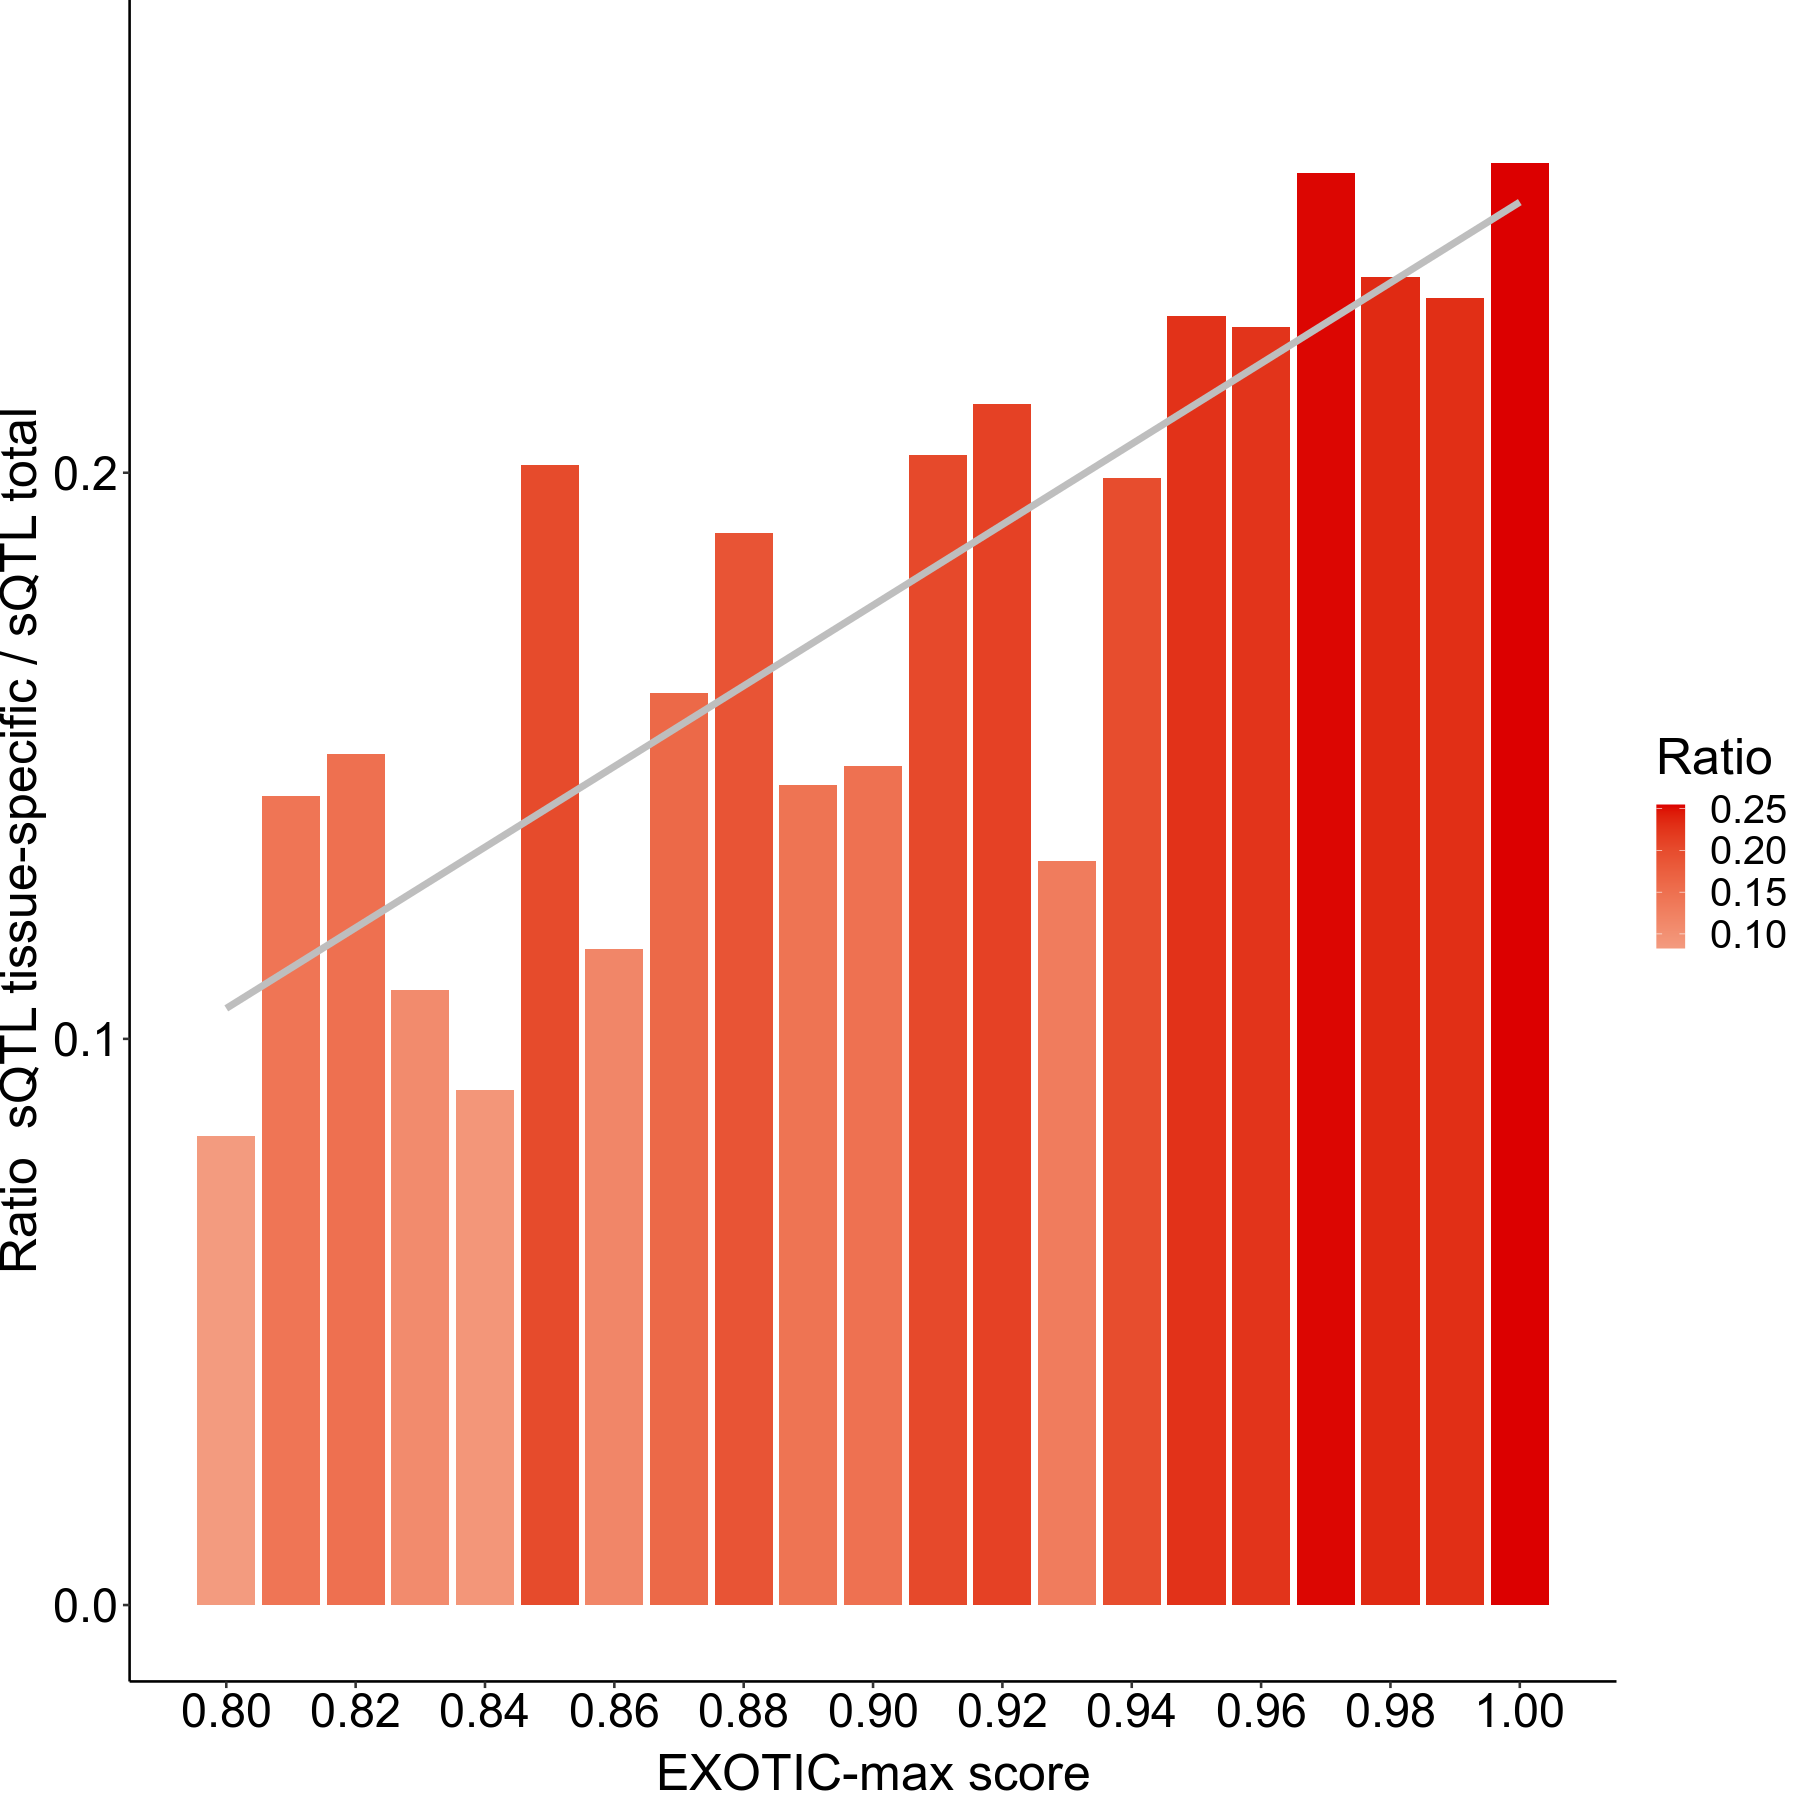

In [30]:
options(repr.plot.width=15, repr.plot.height=15)

library(magrittr)
library(RColorBrewer)
library(viridis)


merge_exotic_sqtl <- read_excel('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_EXOTIC-max_Rdata.xlsx')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start >= 0.8, ]
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
merge_exotic_sqtl

# merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(EXOTIC_bins, snpId, snpId_total) %>% group_by(EXOTIC_bins) %>% summarise(snpId = sum(snpId), snpId_total = sum(snpId_total))
# merge_exotic_sqtl_count$Ratio_sQTL <- merge_exotic_sqtl_count$snpId / merge_exotic_sqtl_count$snpId_total
# merge_exotic_sqtl_count

# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bin_start

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bin_start, y=Ratio, fill=Ratio)) +
  

    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) +     
    scale_fill_continuous(low="#F39B7FFF", high="#DC0000FF") +
    scale_x_continuous(breaks = round(seq(min(merge_exotic_sqtl$EXOTIC_bin_start), max(merge_exotic_sqtl$EXOTIC_bin_start), by = 0.02),2)) + 
    scale_y_continuous(limits=c(0,0.27))+


#     scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
#     scale_colour_brewer(palette = "Greens") + 
#   scale_fill_viridis(discrete = TRUE) +   scale_color_viridis(discrete = TRUE, option = "D")+


    theme(
        strip.background = element_rect(
     color="black", fill="white", size=1.5, linetype="solid"
     ),
   
#         legend.position = "none", 
#         axis.ticks.y = element_blank(), 
#         axis.text.y = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"),
        panel.border = element_blank(),
        axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.x = element_text(color="black", size=28),
        axis.text.y = element_text(color='black', size=28),
        text = element_text(size=30)) +
    labs(x='EXOTIC-max score', y='Ratio  sQTL tissue-specific / sQTL total' , fill = 'Ratio')
    
    

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 



### Fig X - EXOTIC-max ratio sQTL total / TS sQTL for each tissue

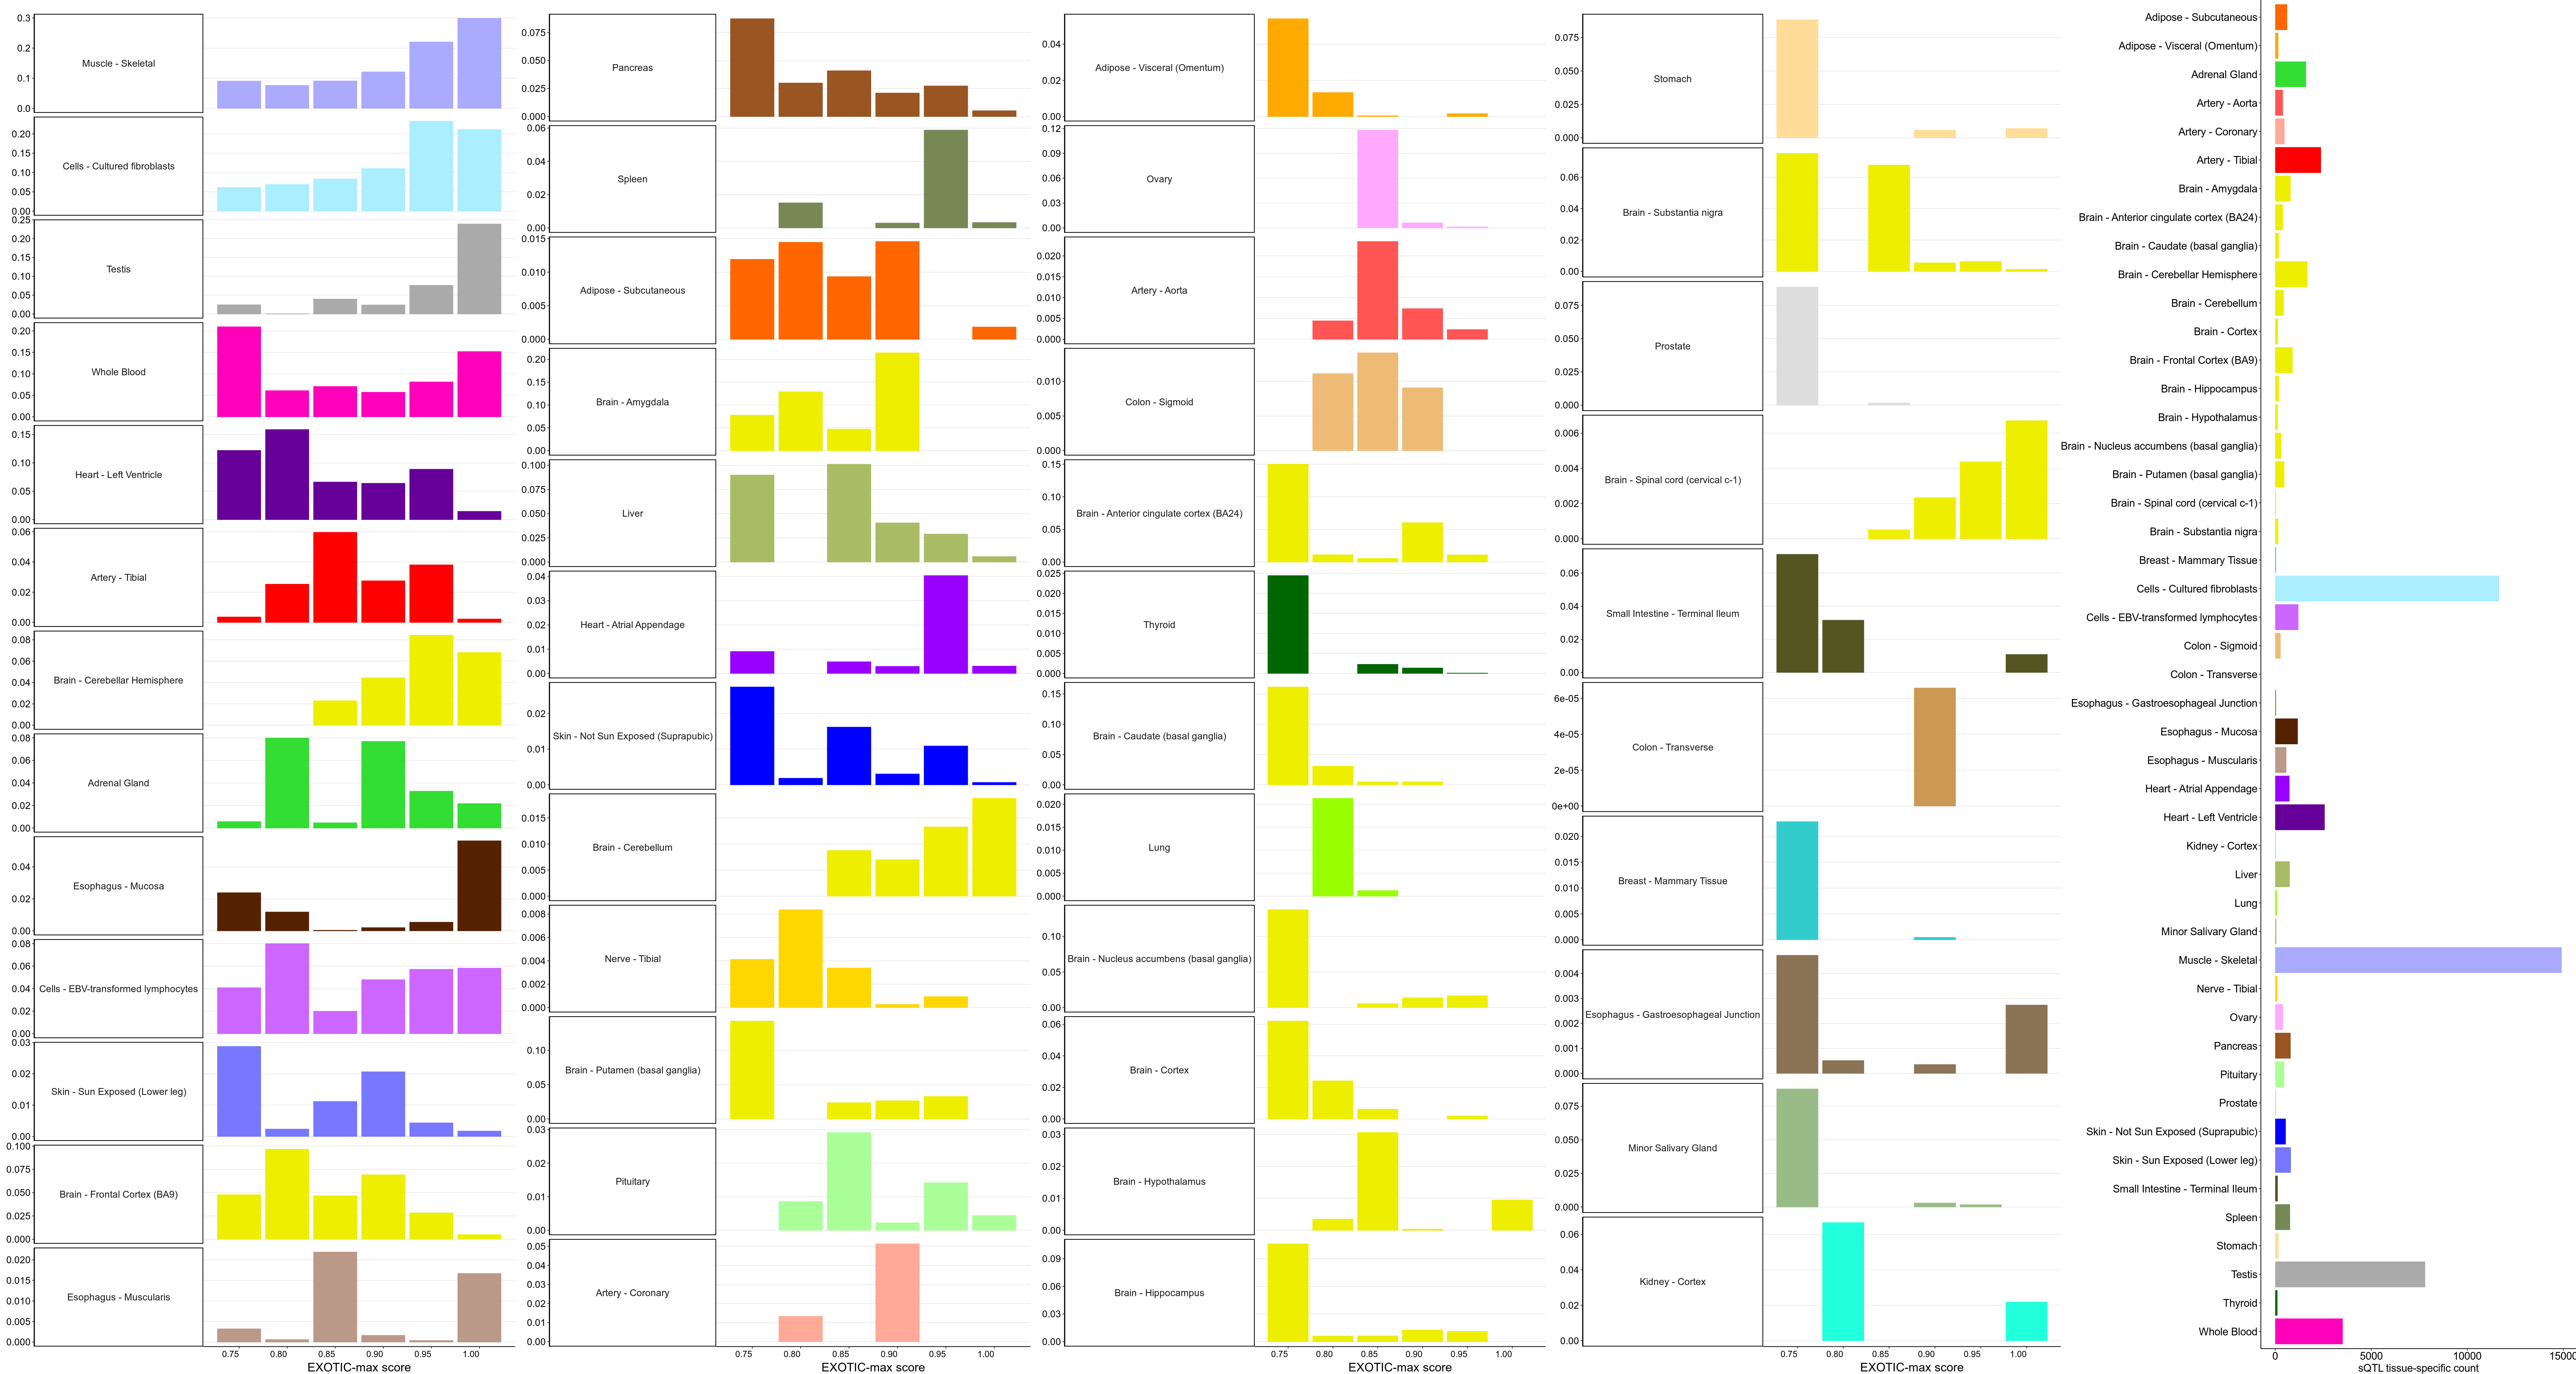

In [16]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-max_Rdata.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]


# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio, color=Tissue, fill=Tissue), stat="identity") +     # Note that id is a factor. If x is numeric, there is some space between the first bar
#                             scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
                                scale_x_continuous(breaks = round(seq(min(tmp$EXOTIC_bin_start), max(tmp$EXOTIC_bin_start), by = 0.05),2)) + 
                                
                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio), stat="identity")   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=18, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=25),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=22),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=22, color="black"), axis.text.x = element_text(size=22, color="black")
                                   ) + 
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

Warning message:
“Removed 52 rows containing missing values (position_stack).”
Warning message:
“Removed 13 rows containing missing values (geom_bar).”
Warning message:
“Removed 25 rows containing missing values (position_stack).”
Warning message:
“Removed 6 rows containing missing values (geom_bar).”
Warning message:
“Removed 24 rows containing missing values (position_stack).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 13 rows containing missing values (position_stack).”


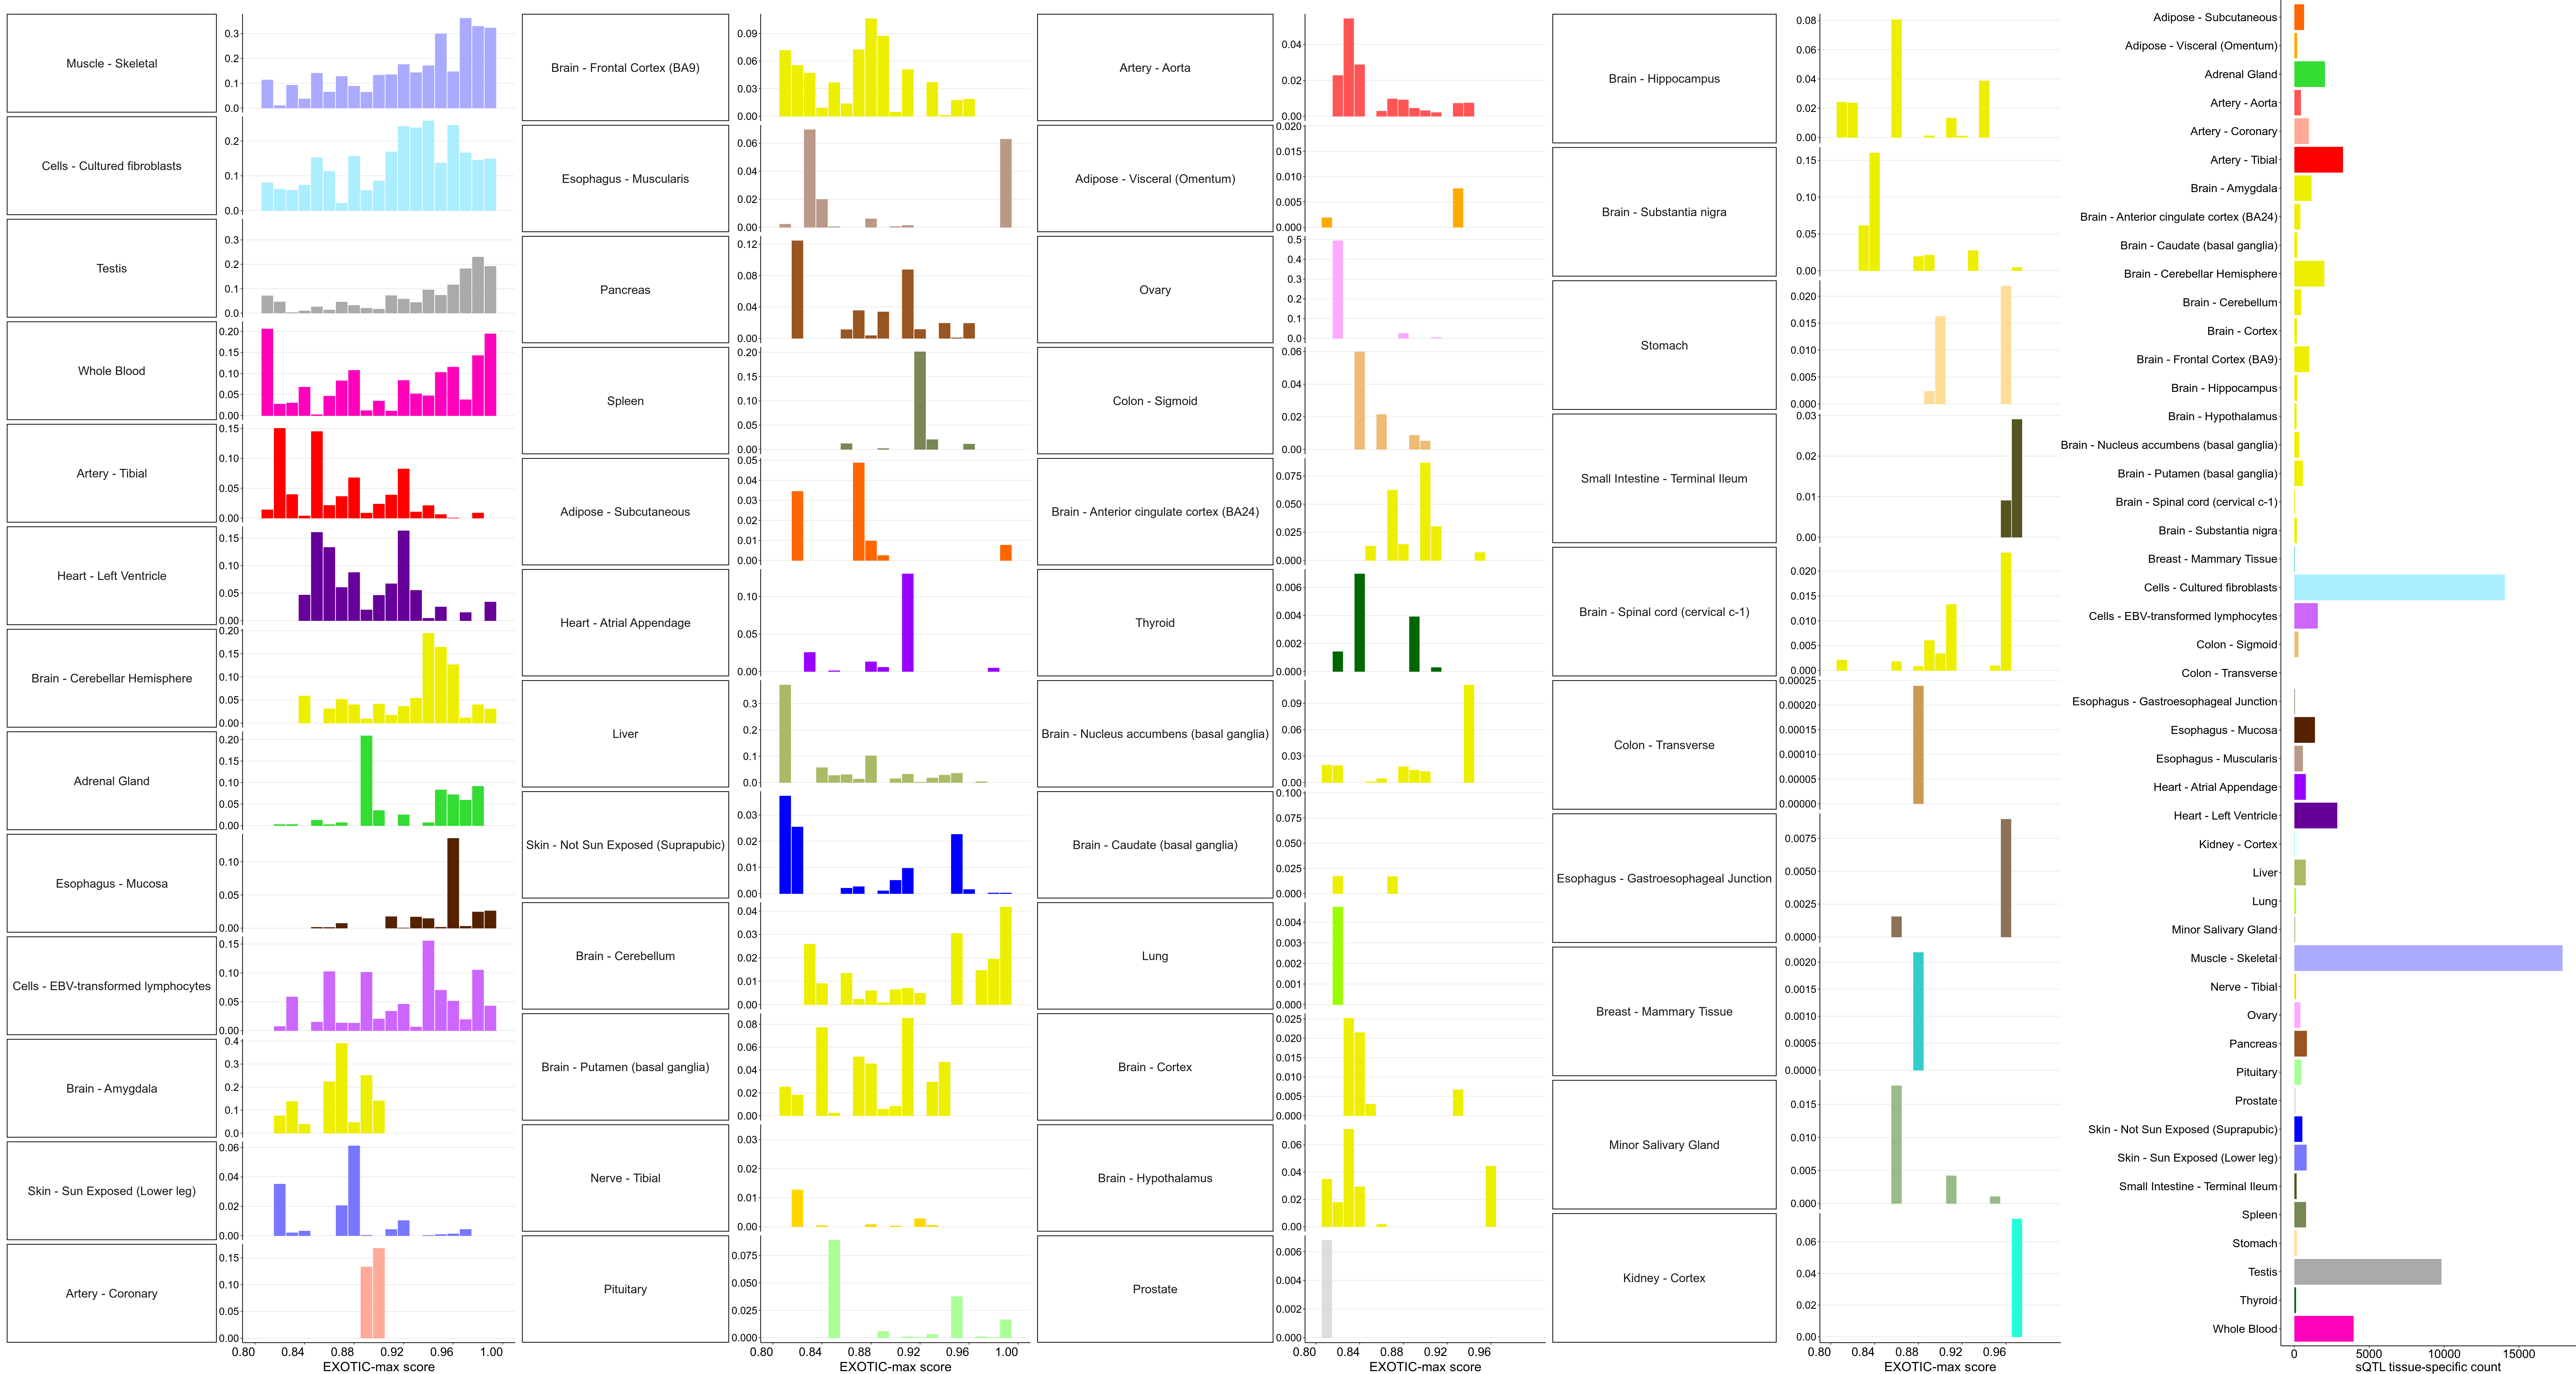

In [44]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-max_Rdata.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.7, ]
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]


# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio, color=Tissue, fill=Tissue), stat="identity") +     # Note that id is a factor. If x is numeric, there is some space between the first bar
#                             scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
                                scale_x_continuous(limits=c(0.8,1), breaks = round(seq(min(tmp$EXOTIC_bin_start + 0.01), max(tmp$EXOTIC_bin_start + 0.01), by = 0.04),2)) + 

                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio), stat="identity")   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    strip.text.y = element_text(size = 25),
                                    strip.placement = "outside",
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=25, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=27),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=26),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=24, color="black"), axis.text.x = element_text(size=25, color="black")
                                   ) + 
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

### Fig X - EXOTIC-min ratio sQTL total / TS sQTL for each tissue

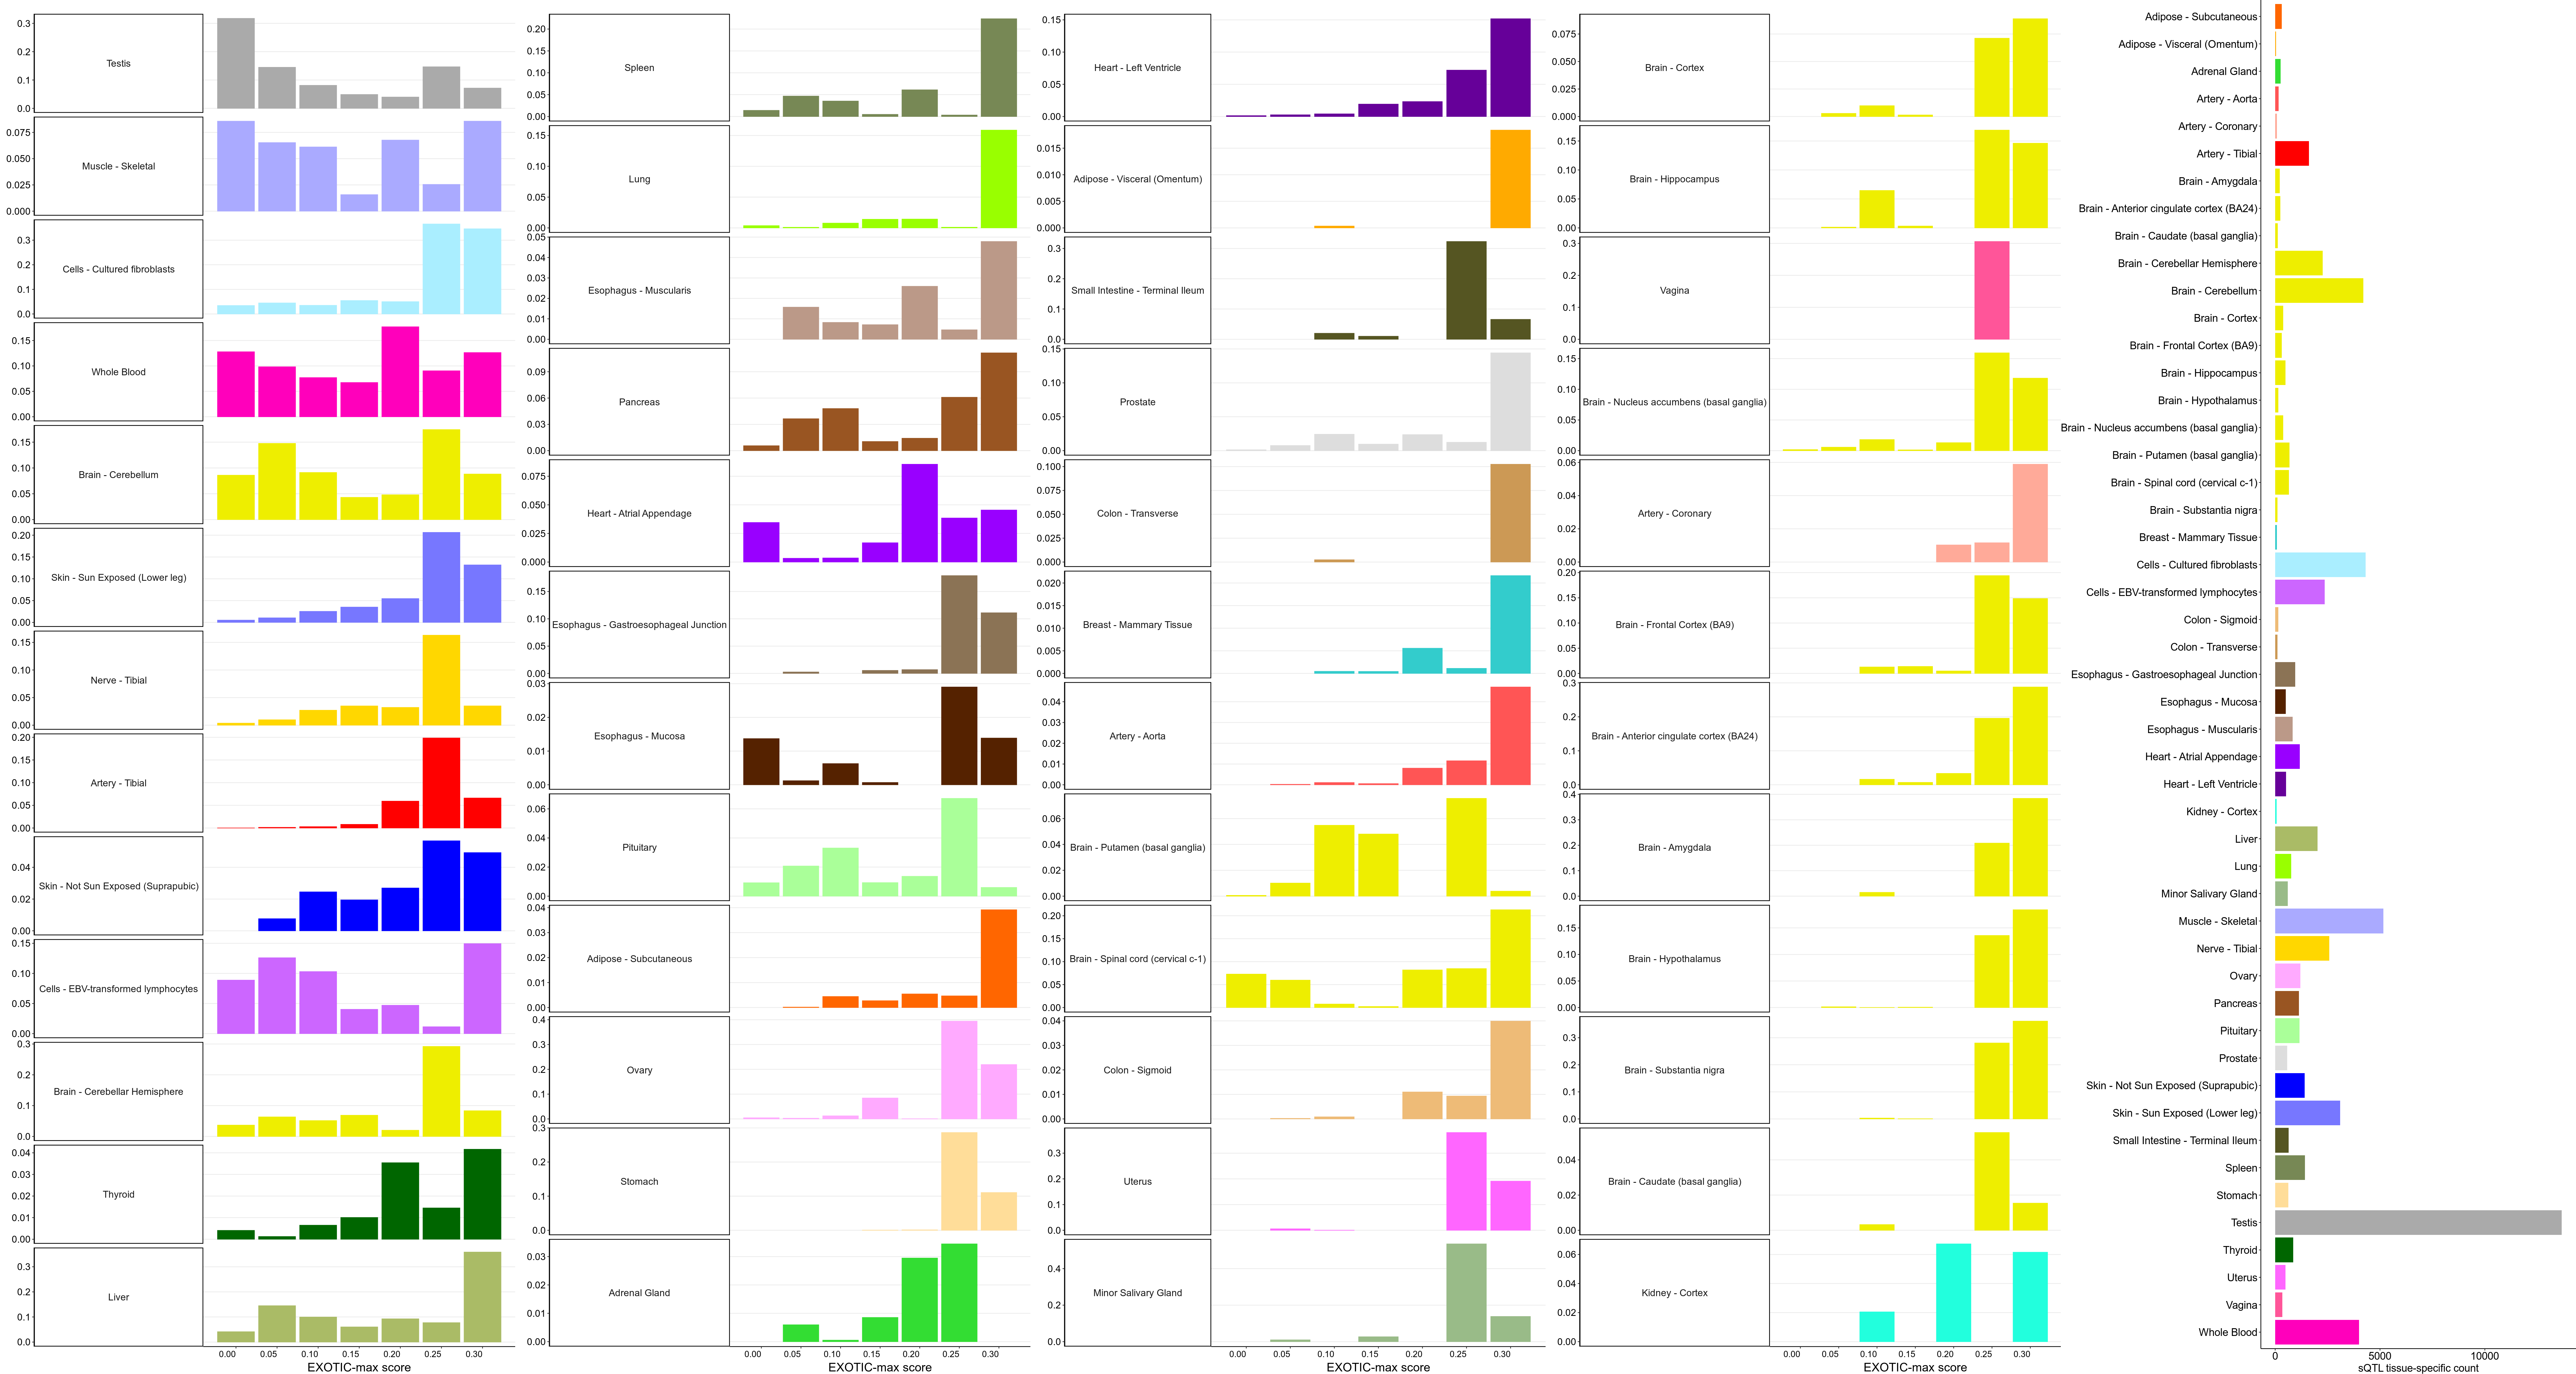

In [20]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-min_Rdata.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start <= 0.3, ]
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]


# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio, color=Tissue, fill=Tissue), stat="identity") +     # Note that id is a factor. If x is numeric, there is some space between the first bar
#                             scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
                                scale_x_continuous(breaks = round(seq(min(tmp$EXOTIC_bin_start), max(tmp$EXOTIC_bin_start), by = 0.05),2)) + 

                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio), stat="identity")   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=18, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=25),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=22),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=22, color="black"), axis.text.x = element_text(size=22, color="black")
                                   ) + 
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

Warning message:
“Removed 17 rows containing missing values (geom_bar).”
Warning message:
“Removed 9 rows containing missing values (geom_bar).”
Warning message:
“Removed 3 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


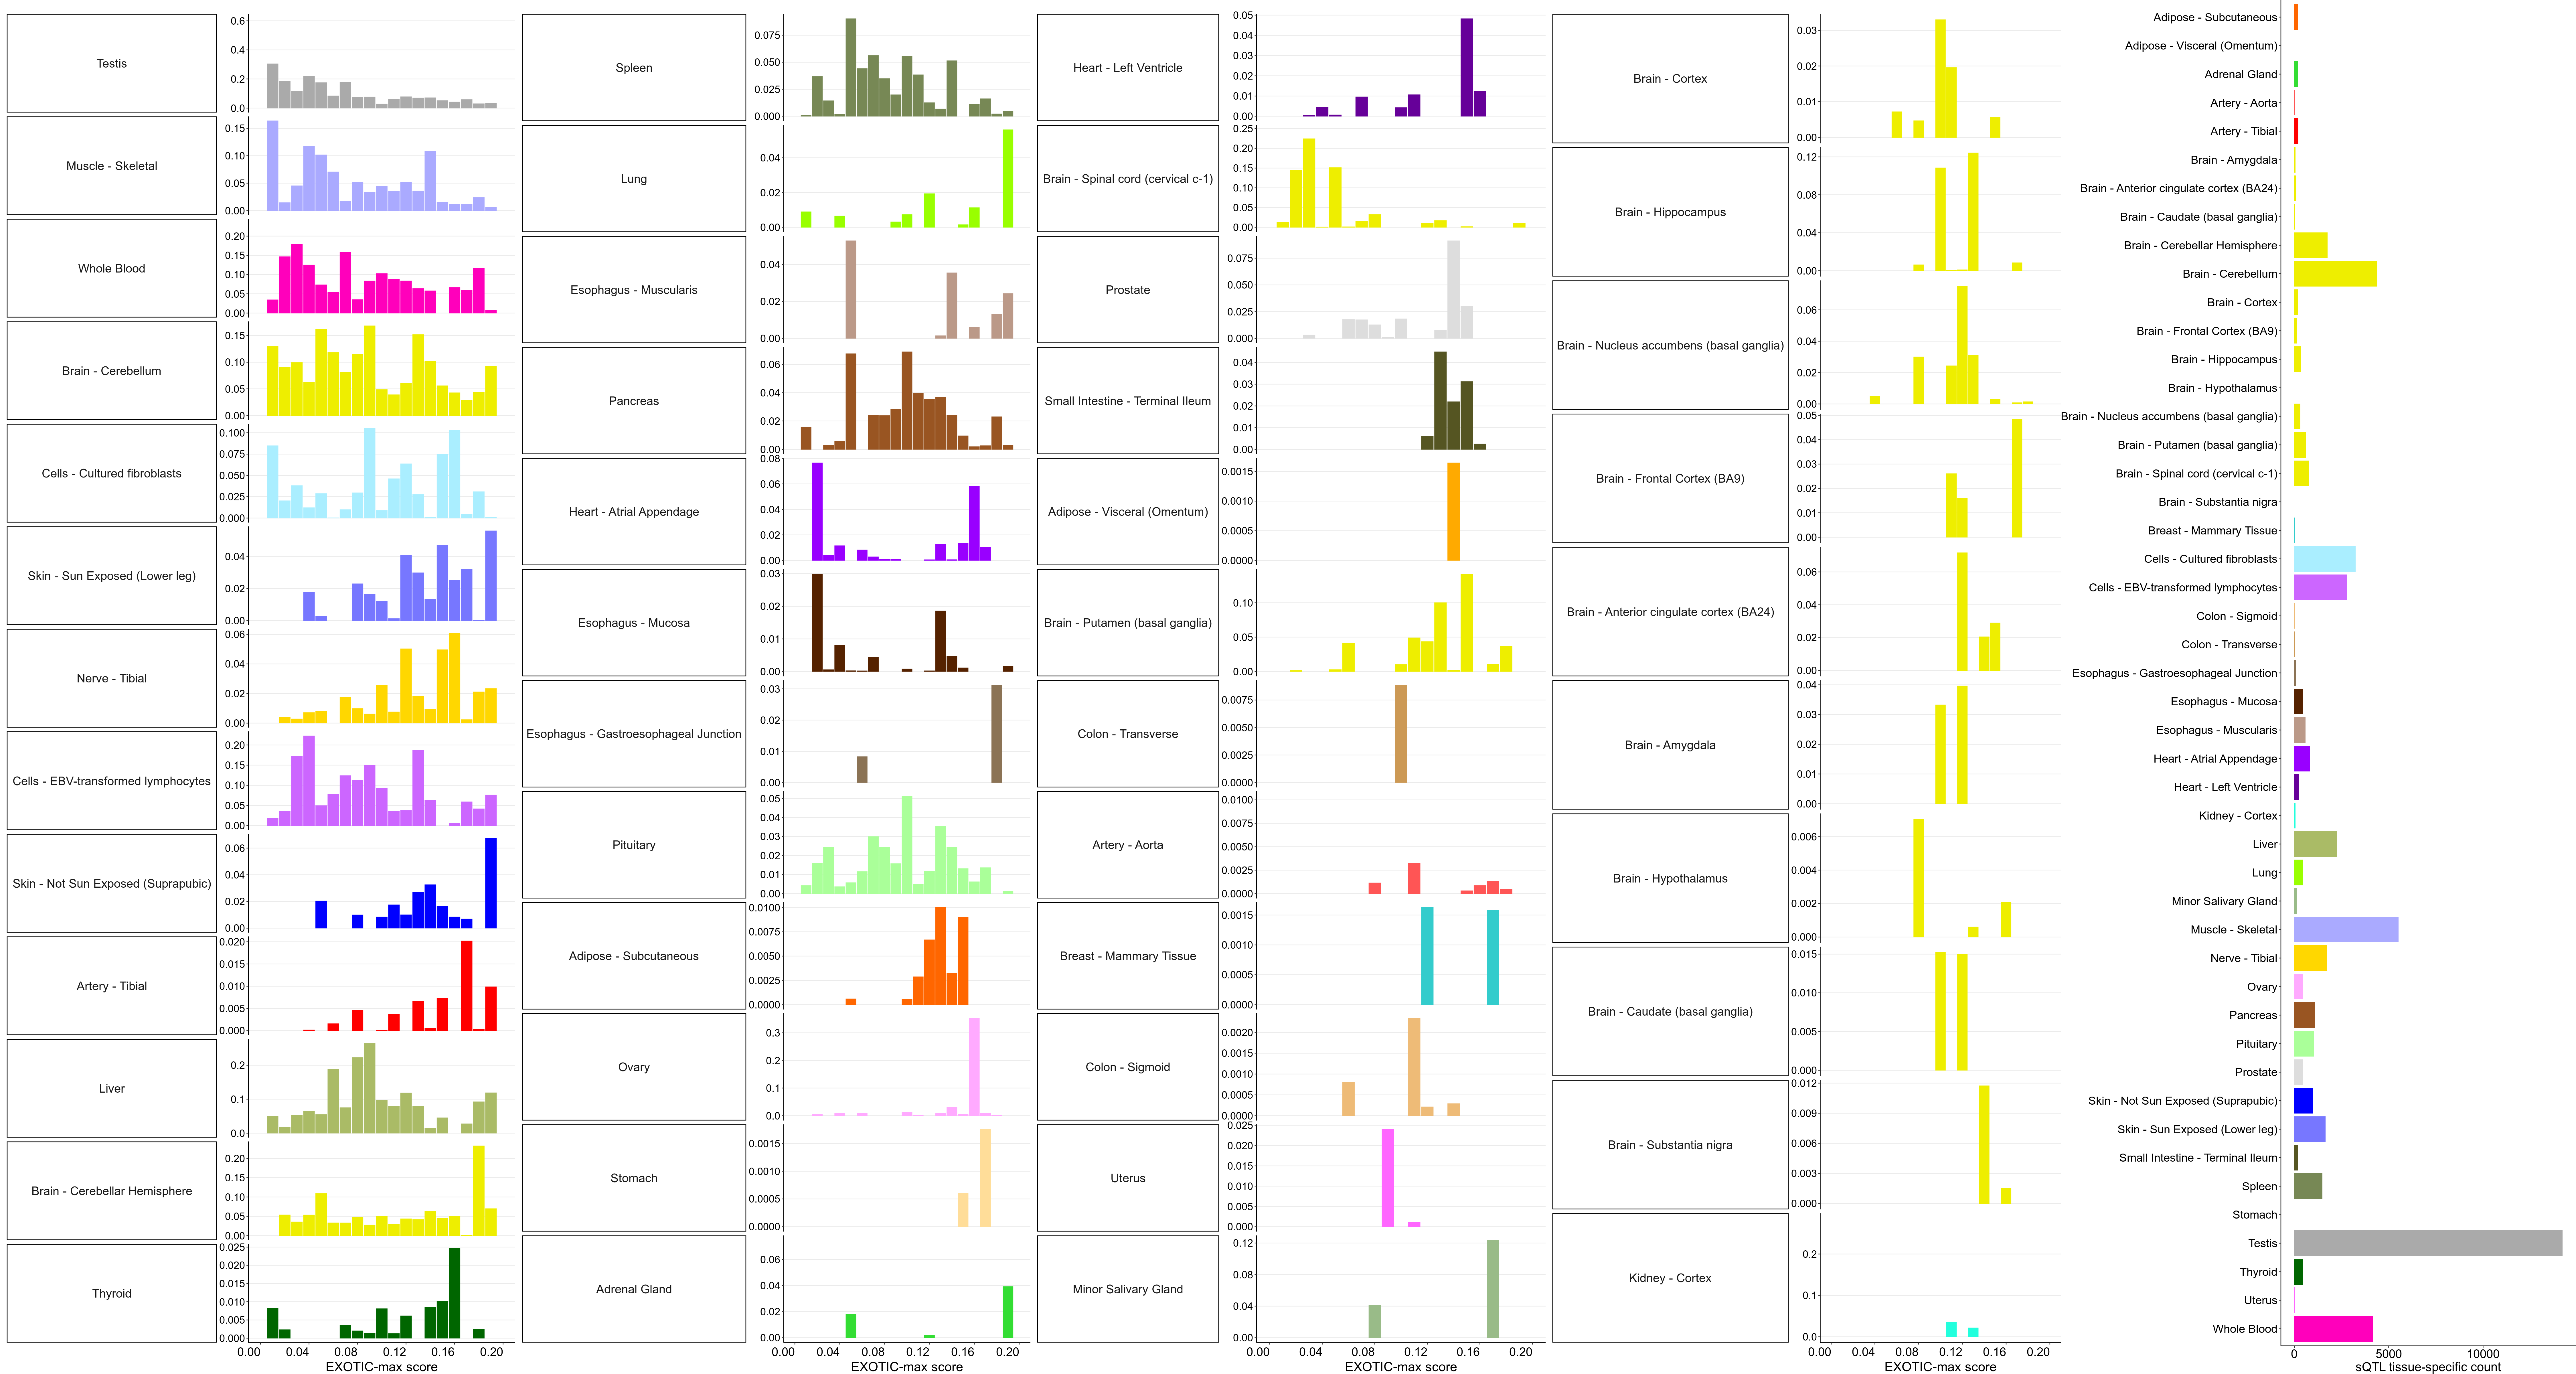

In [50]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_tissues_enrichment_detailed_EXOTIC-min_Rdata.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start <= 0.2, ]
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]


# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio, color=Tissue, fill=Tissue), stat="identity") +     # Note that id is a factor. If x is numeric, there is some space between the first bar
#                             scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +
                                scale_x_continuous(limits=c(0,0.2), breaks = round(seq(0,0.2, by = 0.04),2)) + 

                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio), stat="identity")   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    strip.text.y = element_text(size = 25),
                                    strip.placement = "outside",
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=25, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=27),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=26),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=24, color="black"), axis.text.x = element_text(size=25, color="black")
                                   ) +
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

# A tibble: 281 x 12
   snpId   MAP Ratio_Exon_sQTL EXOTIC_bin_start snpId_total MAP_total
   <dbl> <dbl>           <dbl> <ord>                  <dbl>     <dbl>
 1  2914    64           45.5  0.06                   26896       533
 2   145    15            9.67 0.2                    18386       206
 3   237     6           39.5  0.38                   23416        38
 4  1549    36           43.0  0.12                   29676       514
 5  5566    99           56.2  0.04                   32963       652
 6  4786    99           48.3  0.02                   31297       536
 7   591    19           31.1  0.18                   45830       273
 8   119     2           59.5  0.3                   122987        58
 9   213     4           53.2  0.26                   11093       105
10  9063   165           54.9  0.0                    24014       428
# … with 271 more rows, and 6 more variables: Ratio_Exon_sQTL_total <dbl>,
#   Group <chr>, Enrichment <dbl>, Ratio_sQTL <dbl>, EXOTIC_bins

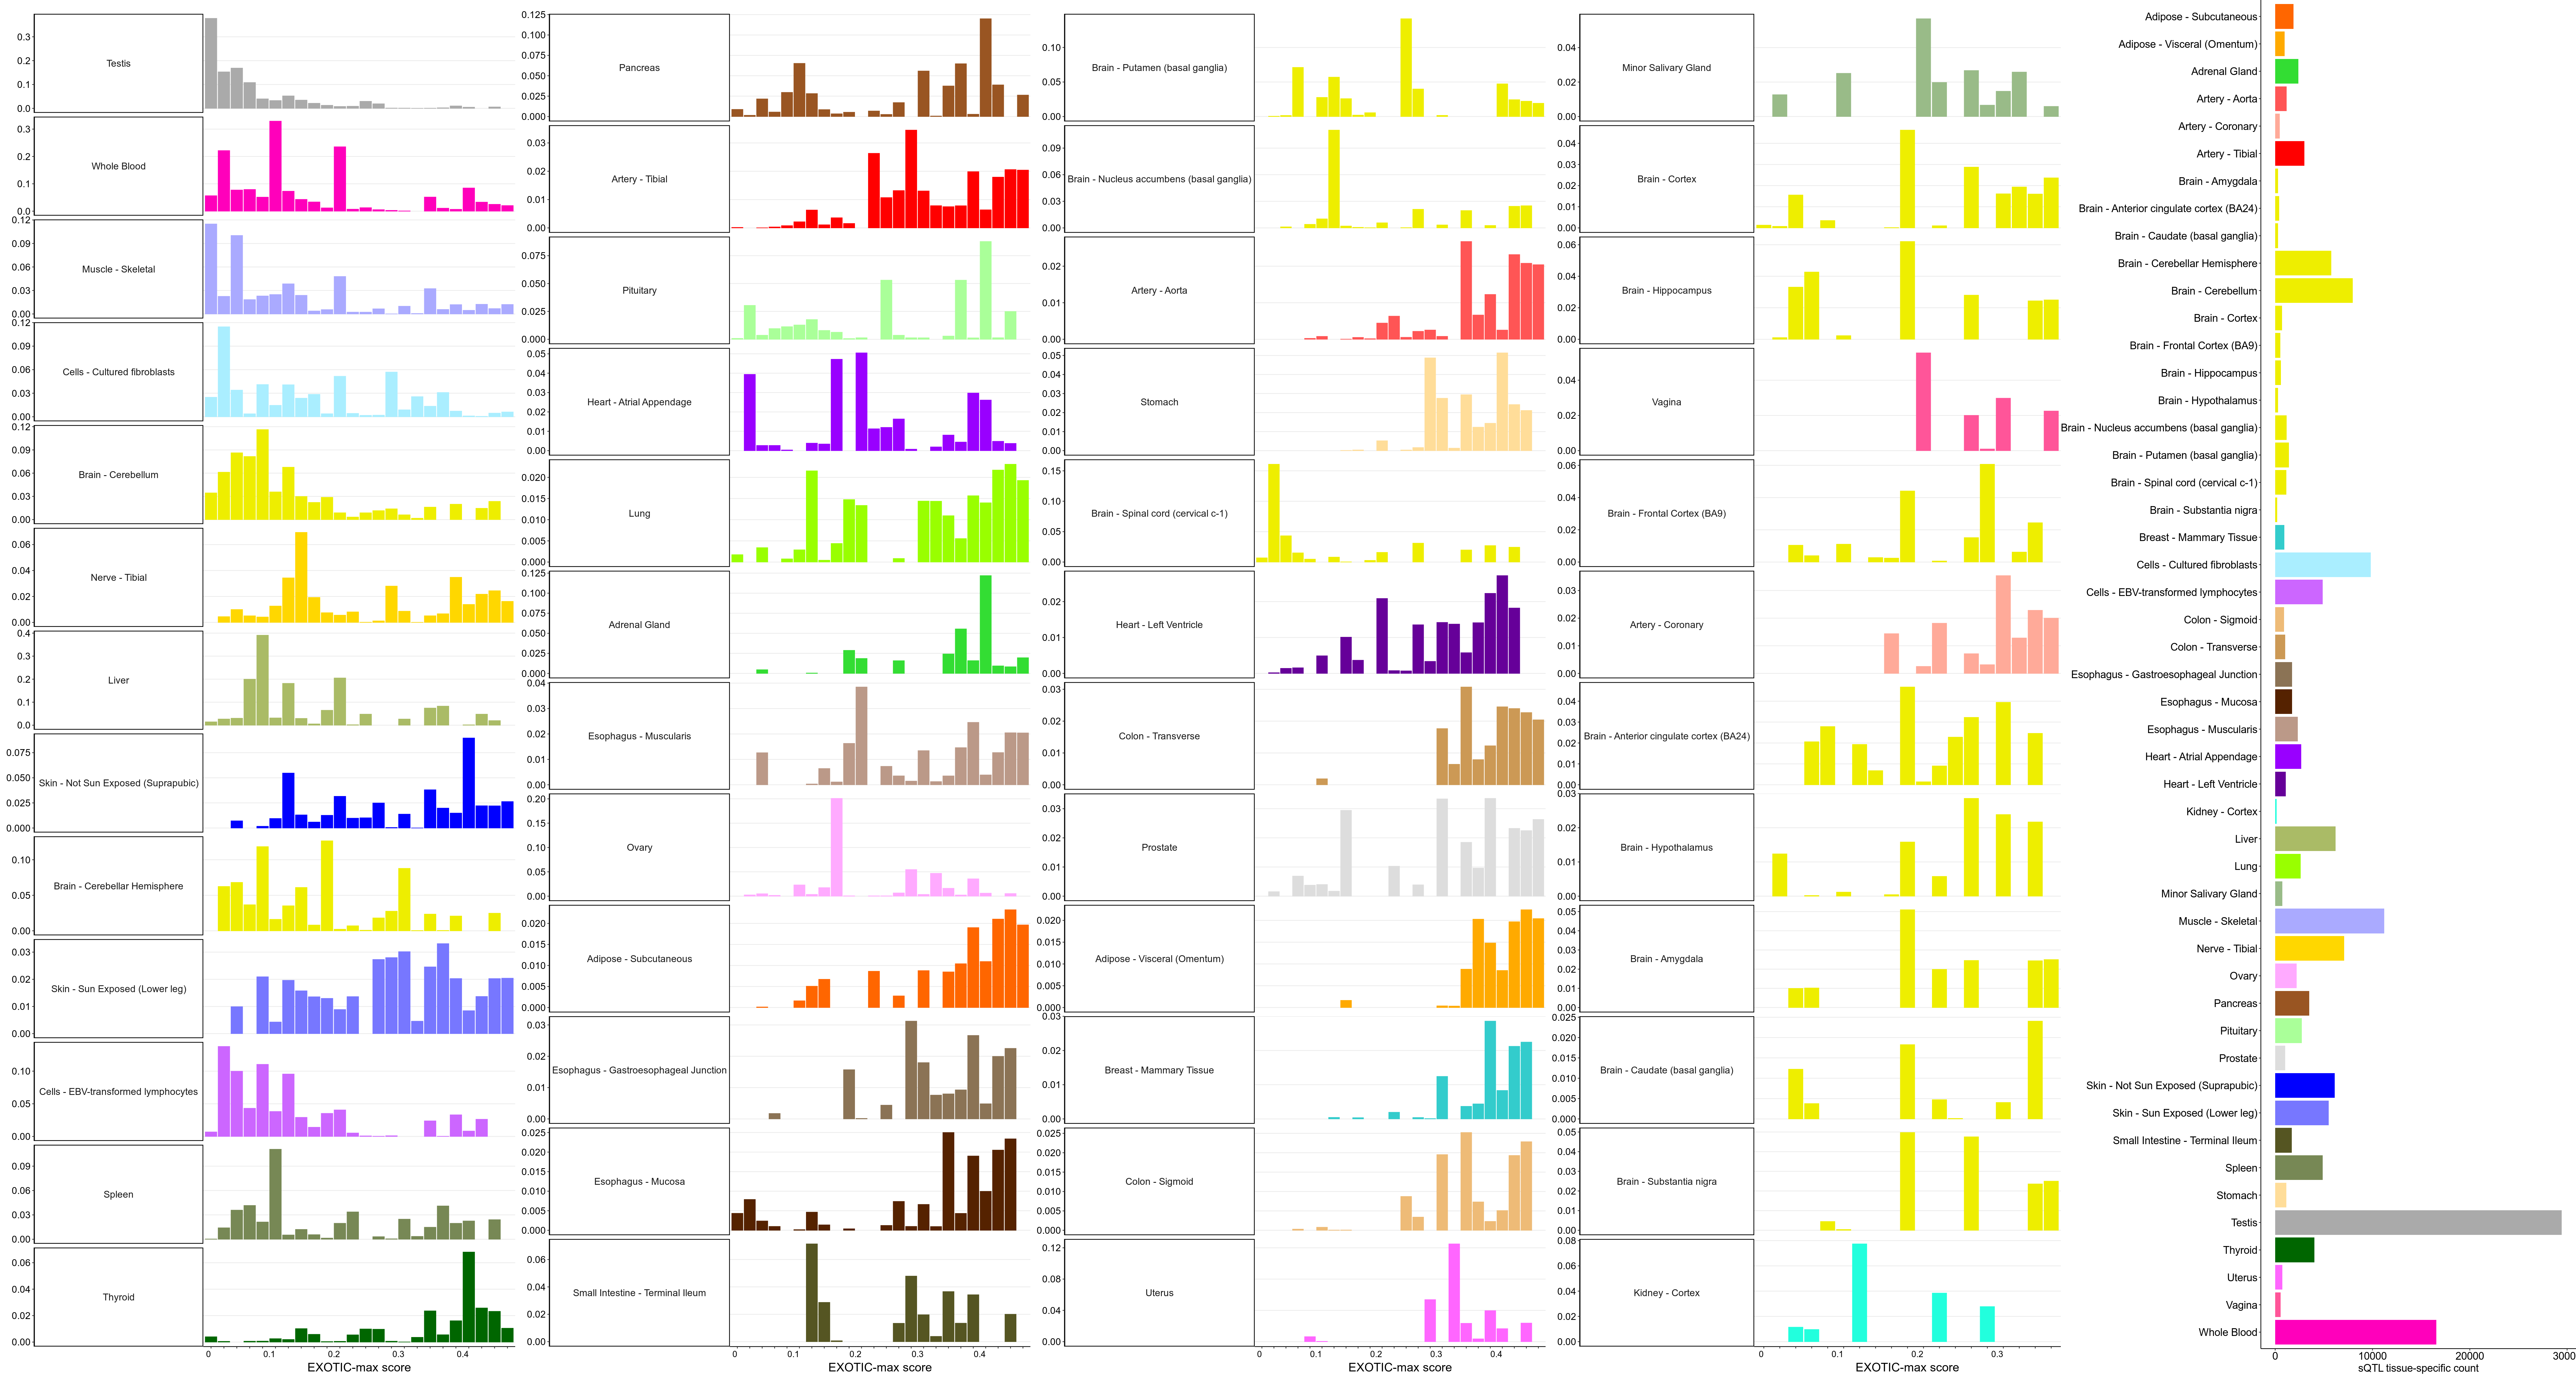

In [15]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_tissues_Rdata_final_min.parquet')
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]
# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    print(tmp)
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio_sQTL, color=Tissue, fill=Tissue)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
                            scale_x_discrete( labels=c(0,"","","","",0.1,"","","","",0.2,"","","","",0.3,"","","","",0.4,"","","")) +

                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio_sQTL), stat="identity", alpha=1)   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=18, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=25),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=22),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=22, color="black"), axis.text.x = element_text(size=22, color="black")
                                   ) + 
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

In [ ]:

options(repr.plot.width=75, repr.plot.height=40)

merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_tissues_Rdata_final_min.parquet')
merge_exotic_sqtl_count <- merge_exotic_sqtl %>% select(Tissue, snpId, snpId_total) %>% group_by(Tissue) %>% summarise(sum(snpId))
merge_exotic_sqtl_count$Tissue <- as.character(merge_exotic_sqtl_count$Tissue)
colnames(merge_exotic_sqtl_count) <- c("Tissue", "sQTL")
merge_exotic_sqtl_count <- merge_exotic_sqtl_count[order(merge_exotic_sqtl_count$sQTL, decreasing = TRUE),]
# merge_exotic_sqtl_count$sQTL <- as.integer(merge_exotic_sqtl_count$sQTL)
t_sorted <- merge_exotic_sqtl_count$Tissue


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


# merge_exotic_sqtl
# l_plot <- list()
myplots <- list()
count = 0

# EXOTIC_bins <- merge_exotic_sqtl_count$EXOTIC_bins


for (group in unique(merge_exotic_sqtl$Group)){
    count = count +1
    
    tmp <- merge_exotic_sqtl[merge_exotic_sqtl$Group == group, ]
    colors_tmp <- colors[colors$Tissue %in% tmp$Tissue, ]
    
    #create a factor, level it by d2
    colors_tmp$Tissue <- factor(colors_tmp$Tissue, levels=unique(tmp$Tissue))

    #order
    colors_tmp <- colors_tmp[order(colors_tmp$Tissue),] ## i made a simple edit here    
    
    
    myplots[[count]] <- ggplot(tmp, aes(x=EXOTIC_bin_start, y=Ratio_sQTL, color=Tissue, fill=Tissue)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
                            scale_x_discrete( labels=c("","","",0.6,"","","","",0.7,"","","","",0.8,"","","","",0.9,"","","","",1)) +

                                geom_bar(aes(x=EXOTIC_bin_start, y=Ratio_sQTL), stat="identity", alpha=1)   + 
#                                 geom_smooth(aes(group=1), method = "lm", se = FALSE, color='grey', lwd=2) + 
                                facet_grid(Tissue ~ ., scales='free_y', switch = "y") + 
                               labs(title="", y="Tissue", x="EXOTIC-max score") + 

                            #     scale_x_log10(limits = c(0.1,10), labels = function(x) ifelse(x == 0, "0", x)) +
                                theme(
                                    plot.title=element_text(hjust=0.5, size=22),
                                    strip.background = element_rect(
                                 color="black", fill="white", size=1.5, linetype="solid"
                                 ),
                                    panel.grid.major.x = element_blank(), 
                                    panel.grid.minor = element_blank(),
                                    legend.position = "none", 
                                    panel.background = element_blank(), 
                                    axis.line = element_line(colour = "black"), 
                                    plot.margin=margin(l=0.5,unit="cm"),
                                    panel.border = element_blank(),
                                    axis.title.x=element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
                                    axis.text.x = element_text(color="black", size=18, angle = 0, vjust = 0.5, hjust=1),
                                    axis.text.y = element_text(color='black'),
                                    axis.title.y = element_blank(),
                                    text = element_text(size=25),
                                    strip.text.y.left = element_text(angle = 0)
                                ) +     scale_fill_manual(values=colors_tmp$Color)  +     scale_color_manual(values=colors_tmp$Color)
                        #    scale_color_npg()
}

count = count+1
myplots[[count]]  <- ggplot(merge_exotic_sqtl_count) +
                              geom_bar(mapping = aes(y=Tissue, x=sQTL, fill = Tissue),  stat = "identity", ) + 
                                

                        #       theme_classic()+
                              theme(legend.position = "none", panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.title.x = element_text(size=22),
                                    panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.margin=margin(l=0,unit="cm"), panel.border = element_blank(), axis.title.y=element_blank(), axis.text.y = element_text(size=22, color="black"), axis.text.x = element_text(size=22, color="black")
                                   ) + 
                            scale_fill_manual(values=colors$Color) +  
#                             scale_y_discrete(limits = rev(t_sorted)) + 
                            scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl_count$Tissue)))) + 

#                             scale_x_log10() + 
                            xlab("sQTL tissue-specific count")

plot <- plot_grid(plotlist=myplots, ncol=length(myplots), nrow=1)
plot

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


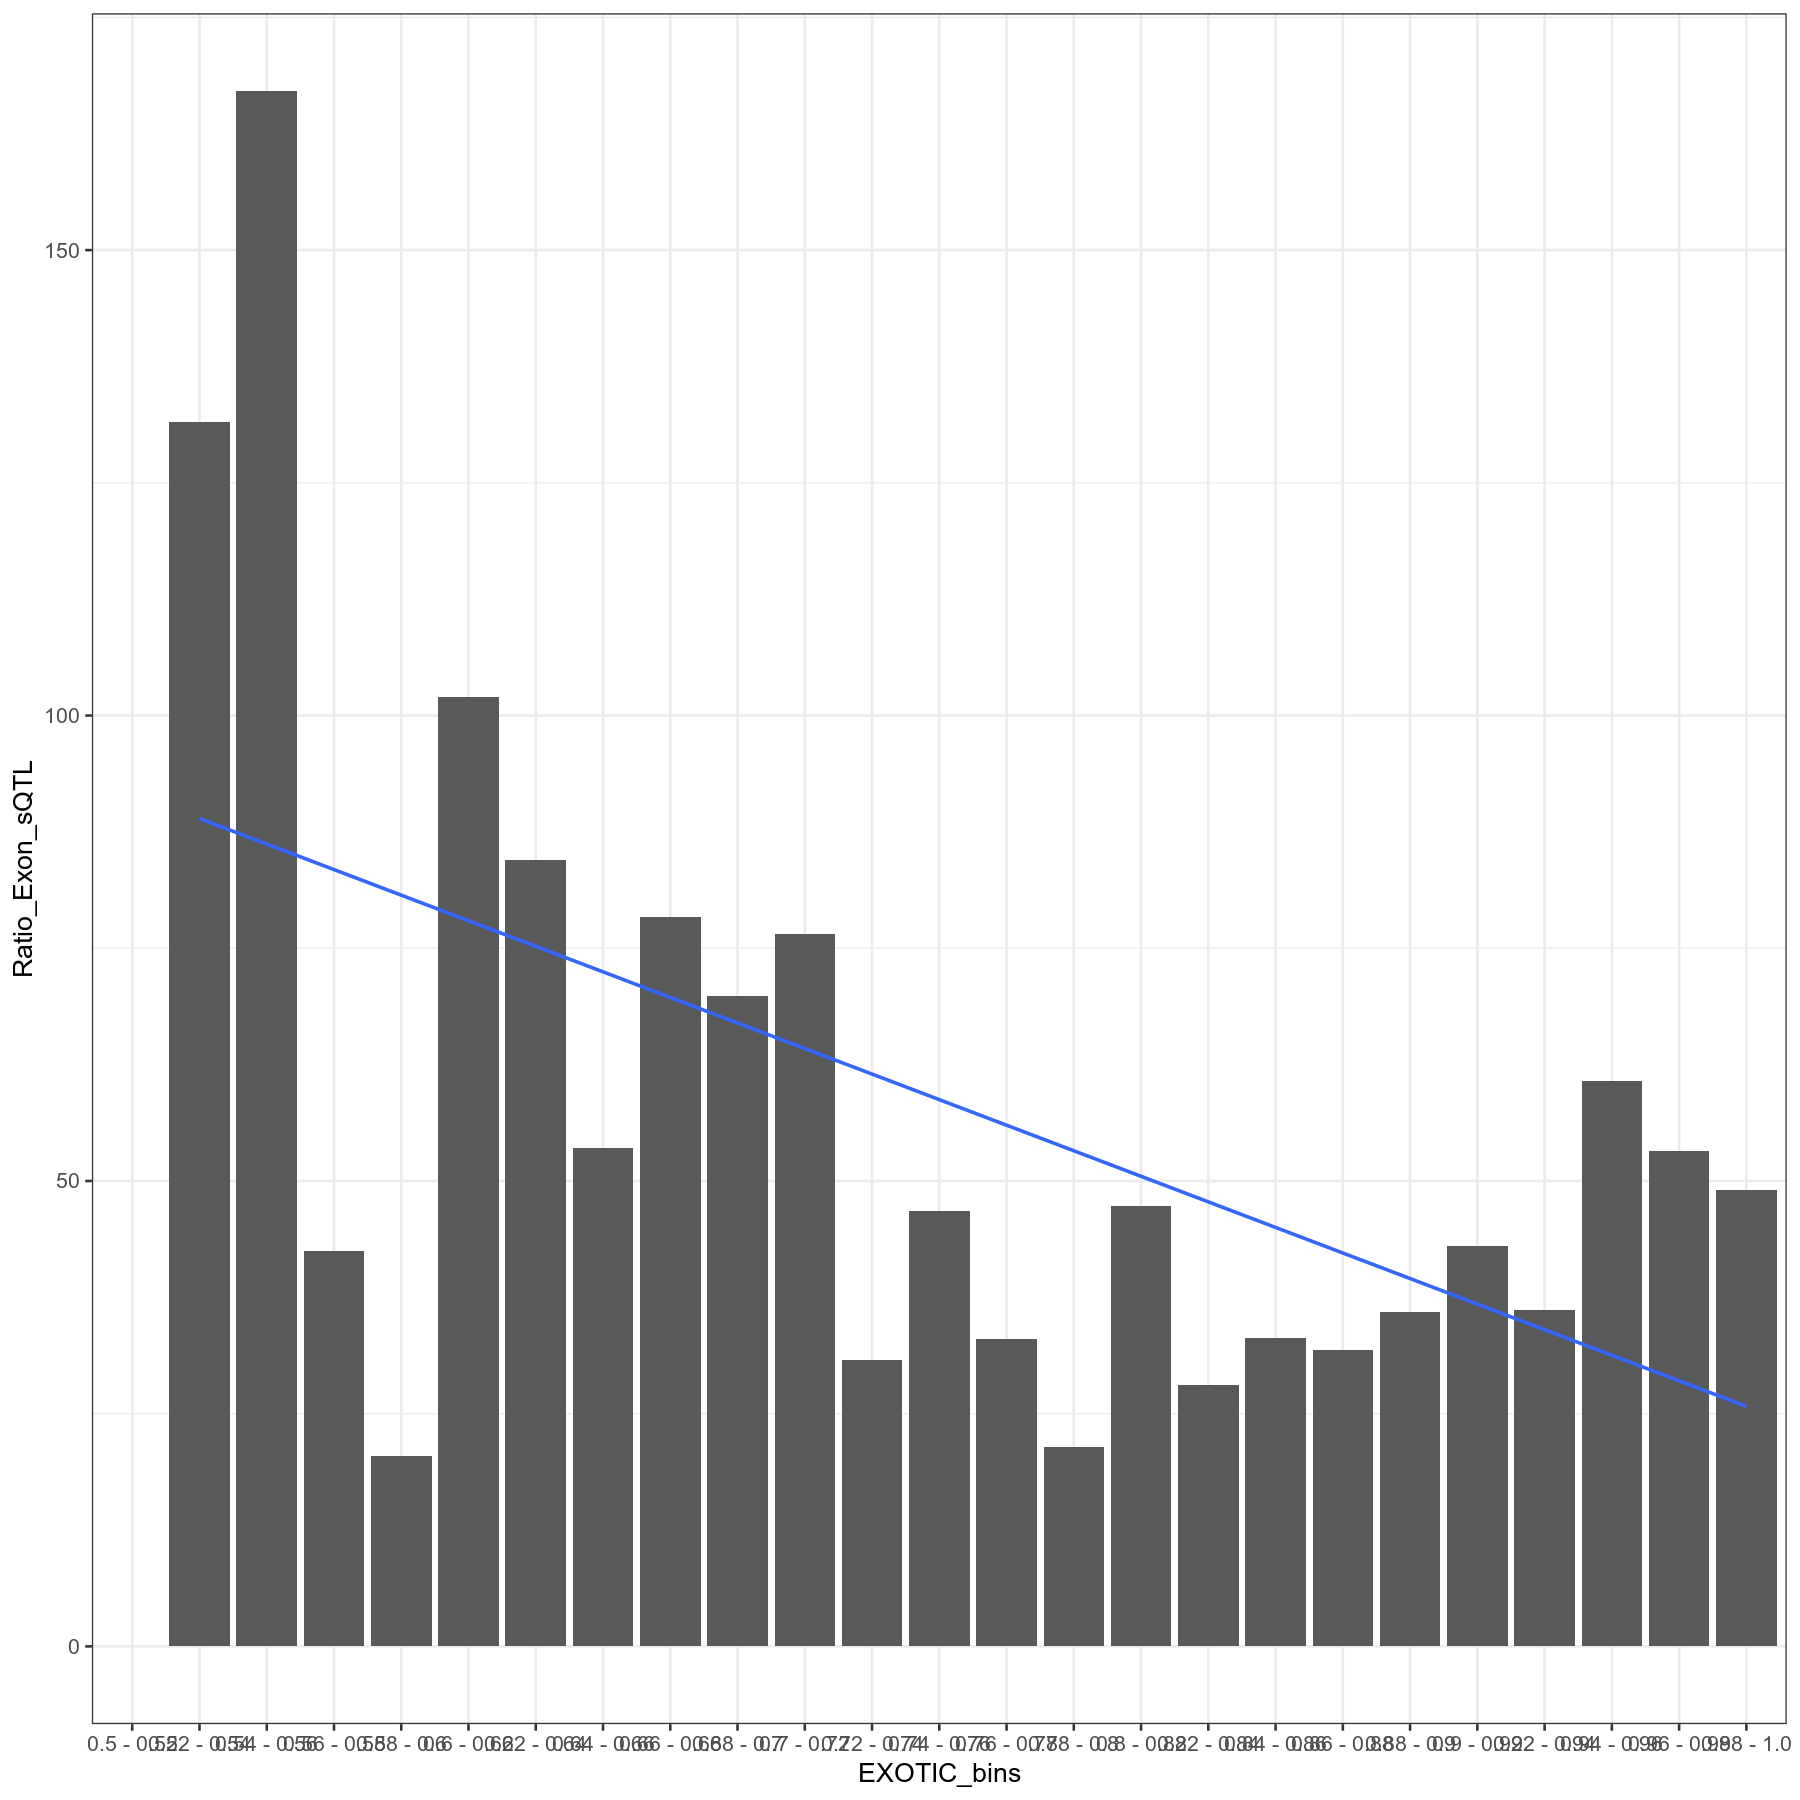

In [92]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata_final.parquet')
merge_exotic_sqtl <- merge_exotic_sqtl %>% mutate_if(is.character, as.factor)
# merge_exotic_sqtl <- merge_exotic_sqtl[merge_exotic_sqtl$EXOTIC_bin_start > 0.85, ]

h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_bins, y=Ratio_Exon_sQTL)) +
    geom_bar(stat='identity') +
    geom_smooth(aes(group=1), method = "lm", se = FALSE)

h1

#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 
#     theme_ipsum()


Warning message:
“Removed 16061 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 808 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


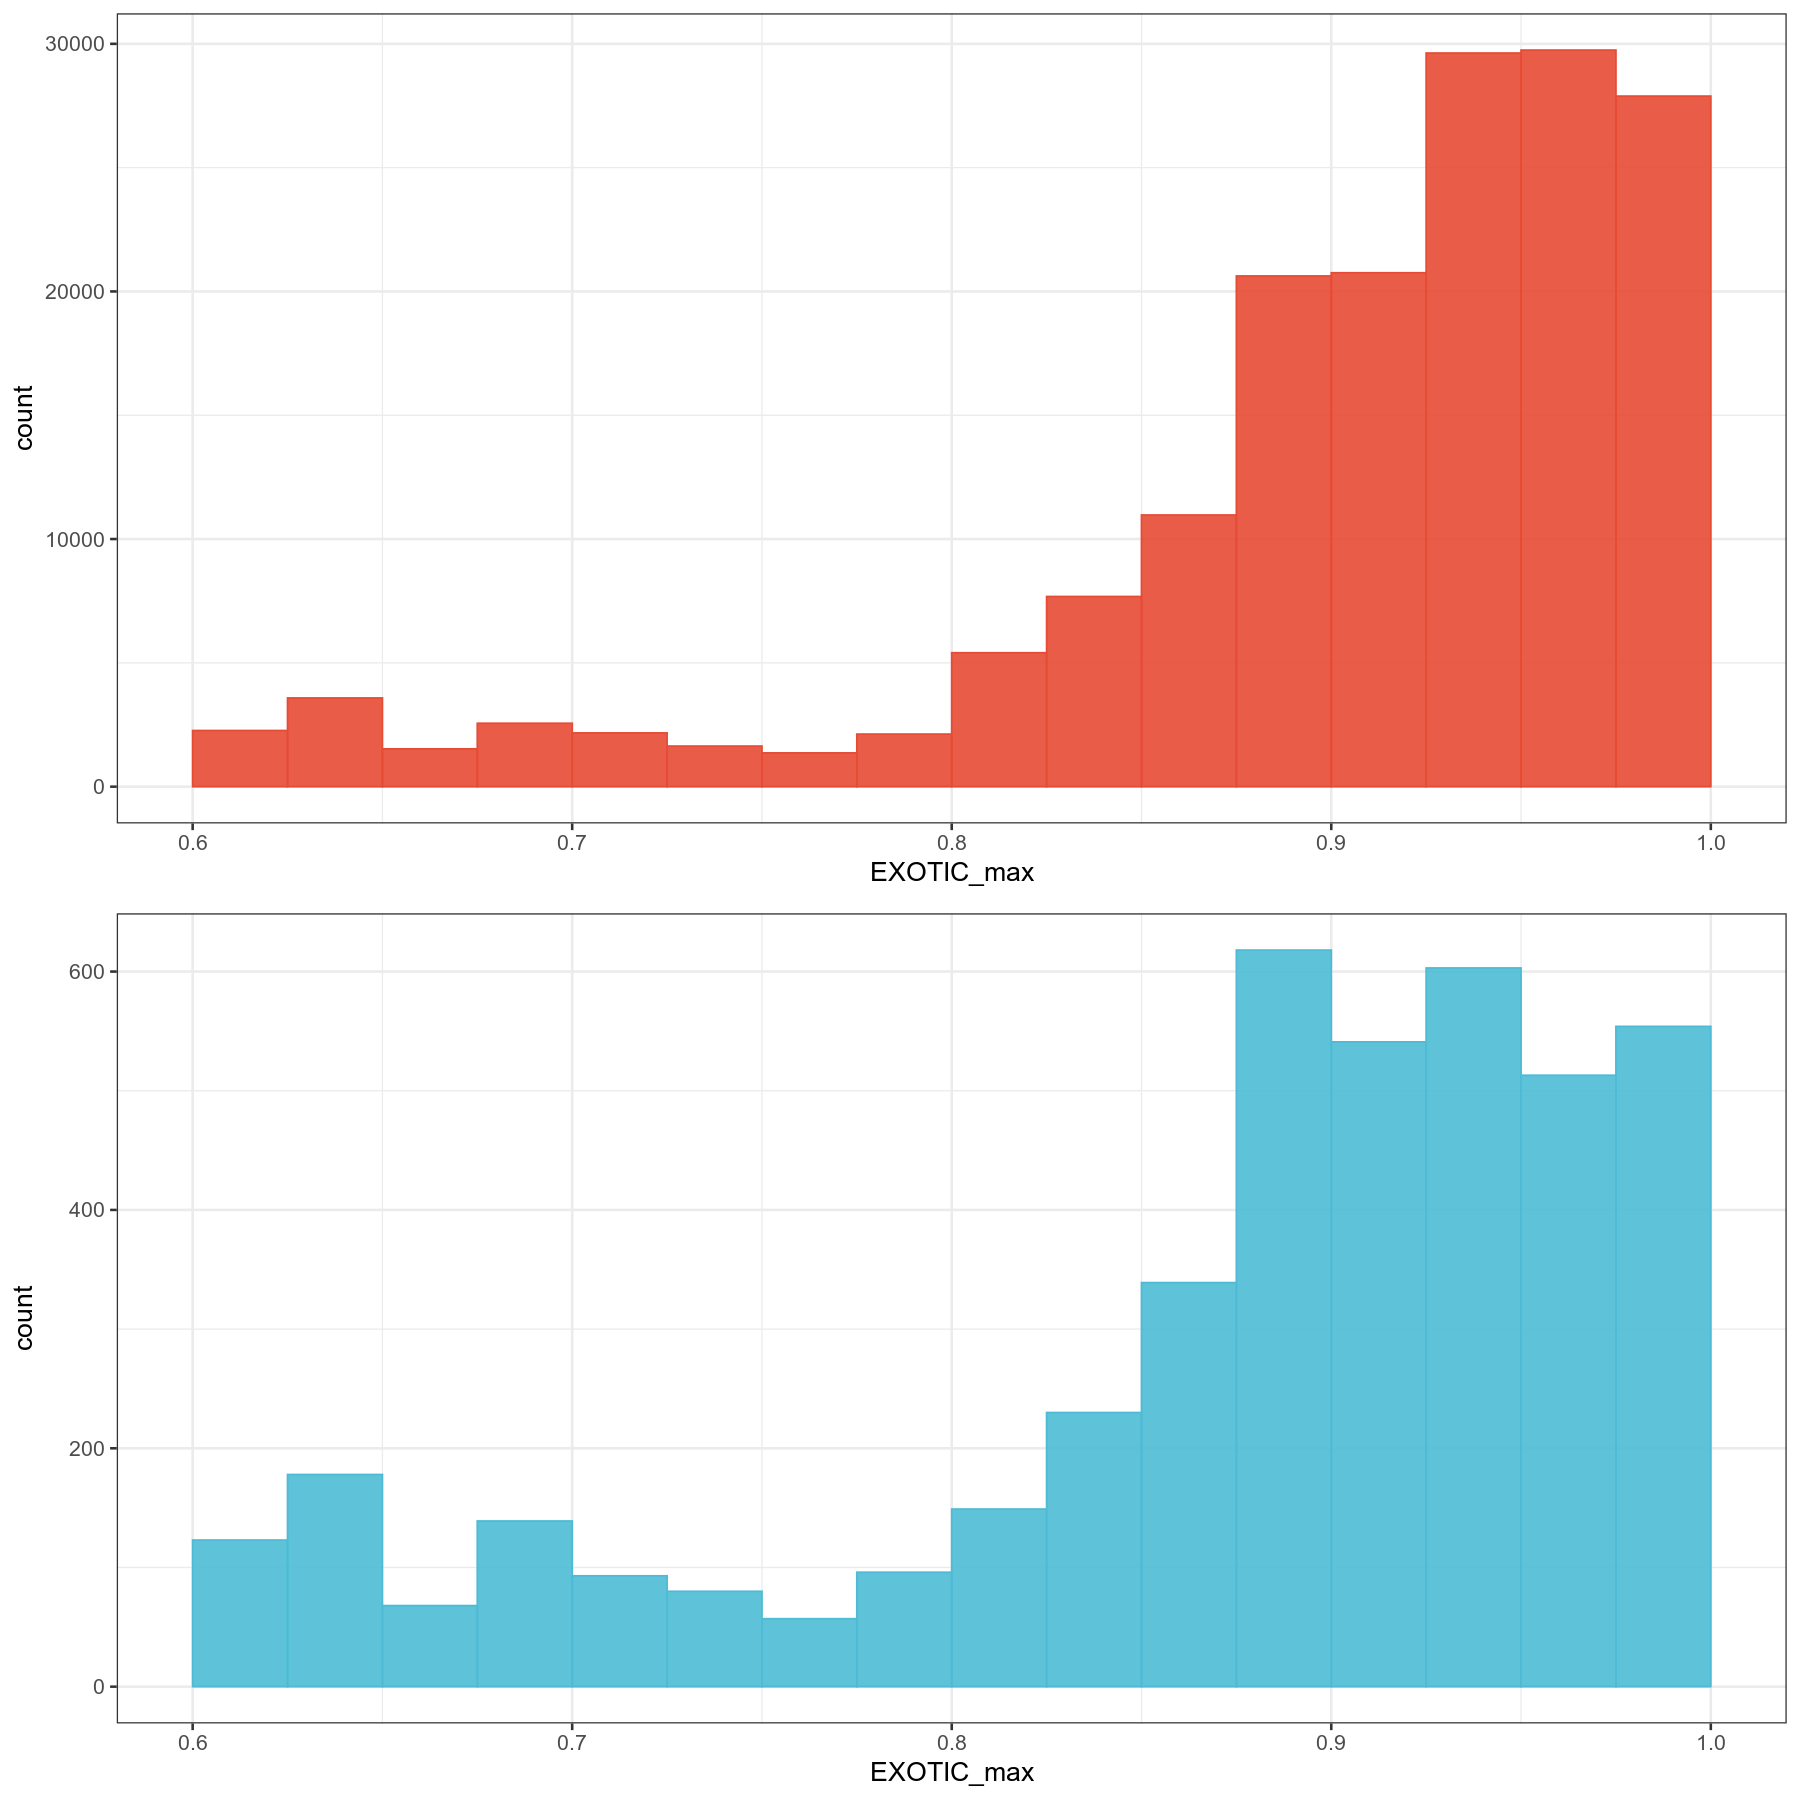

In [68]:

h1 <- ggplot(merge_exotic_sqtl) +
    geom_histogram( aes(x=EXOTIC_max), breaks=seq(0.5,1,0.025), fill=pal_npg("nrc")(10)[1], color=pal_npg("nrc")(10)[1], alpha=0.9, position="identity") + xlim(0.6,1)

h2 <- ggplot(merge_exotic_sqtl2) +
    geom_histogram( aes(x=EXOTIC_max), breaks=seq(0.5,1,0.025), fill=pal_npg("nrc")(10)[2], color=pal_npg("nrc")(10)[2], alpha=0.9, position="identity")  + xlim(0.6,1)

plot <- plot_grid(h1, h2, align='v', ncol=1, nrow=2, rel_widths = c(5/10, 5/10))


#     ggtitle("Night price distribution of Airbnb appartements") +
  # Custom the Y scales:
#   scale_y_continuous(
    
#     # Features of the first axis
#     name = "First Axis",
    
#     # Add a second axis and specify its features
#     sec.axis = sec_axis( trans=~./100, name="Second Axis")
#   ) + 
#     theme_ipsum()
plot

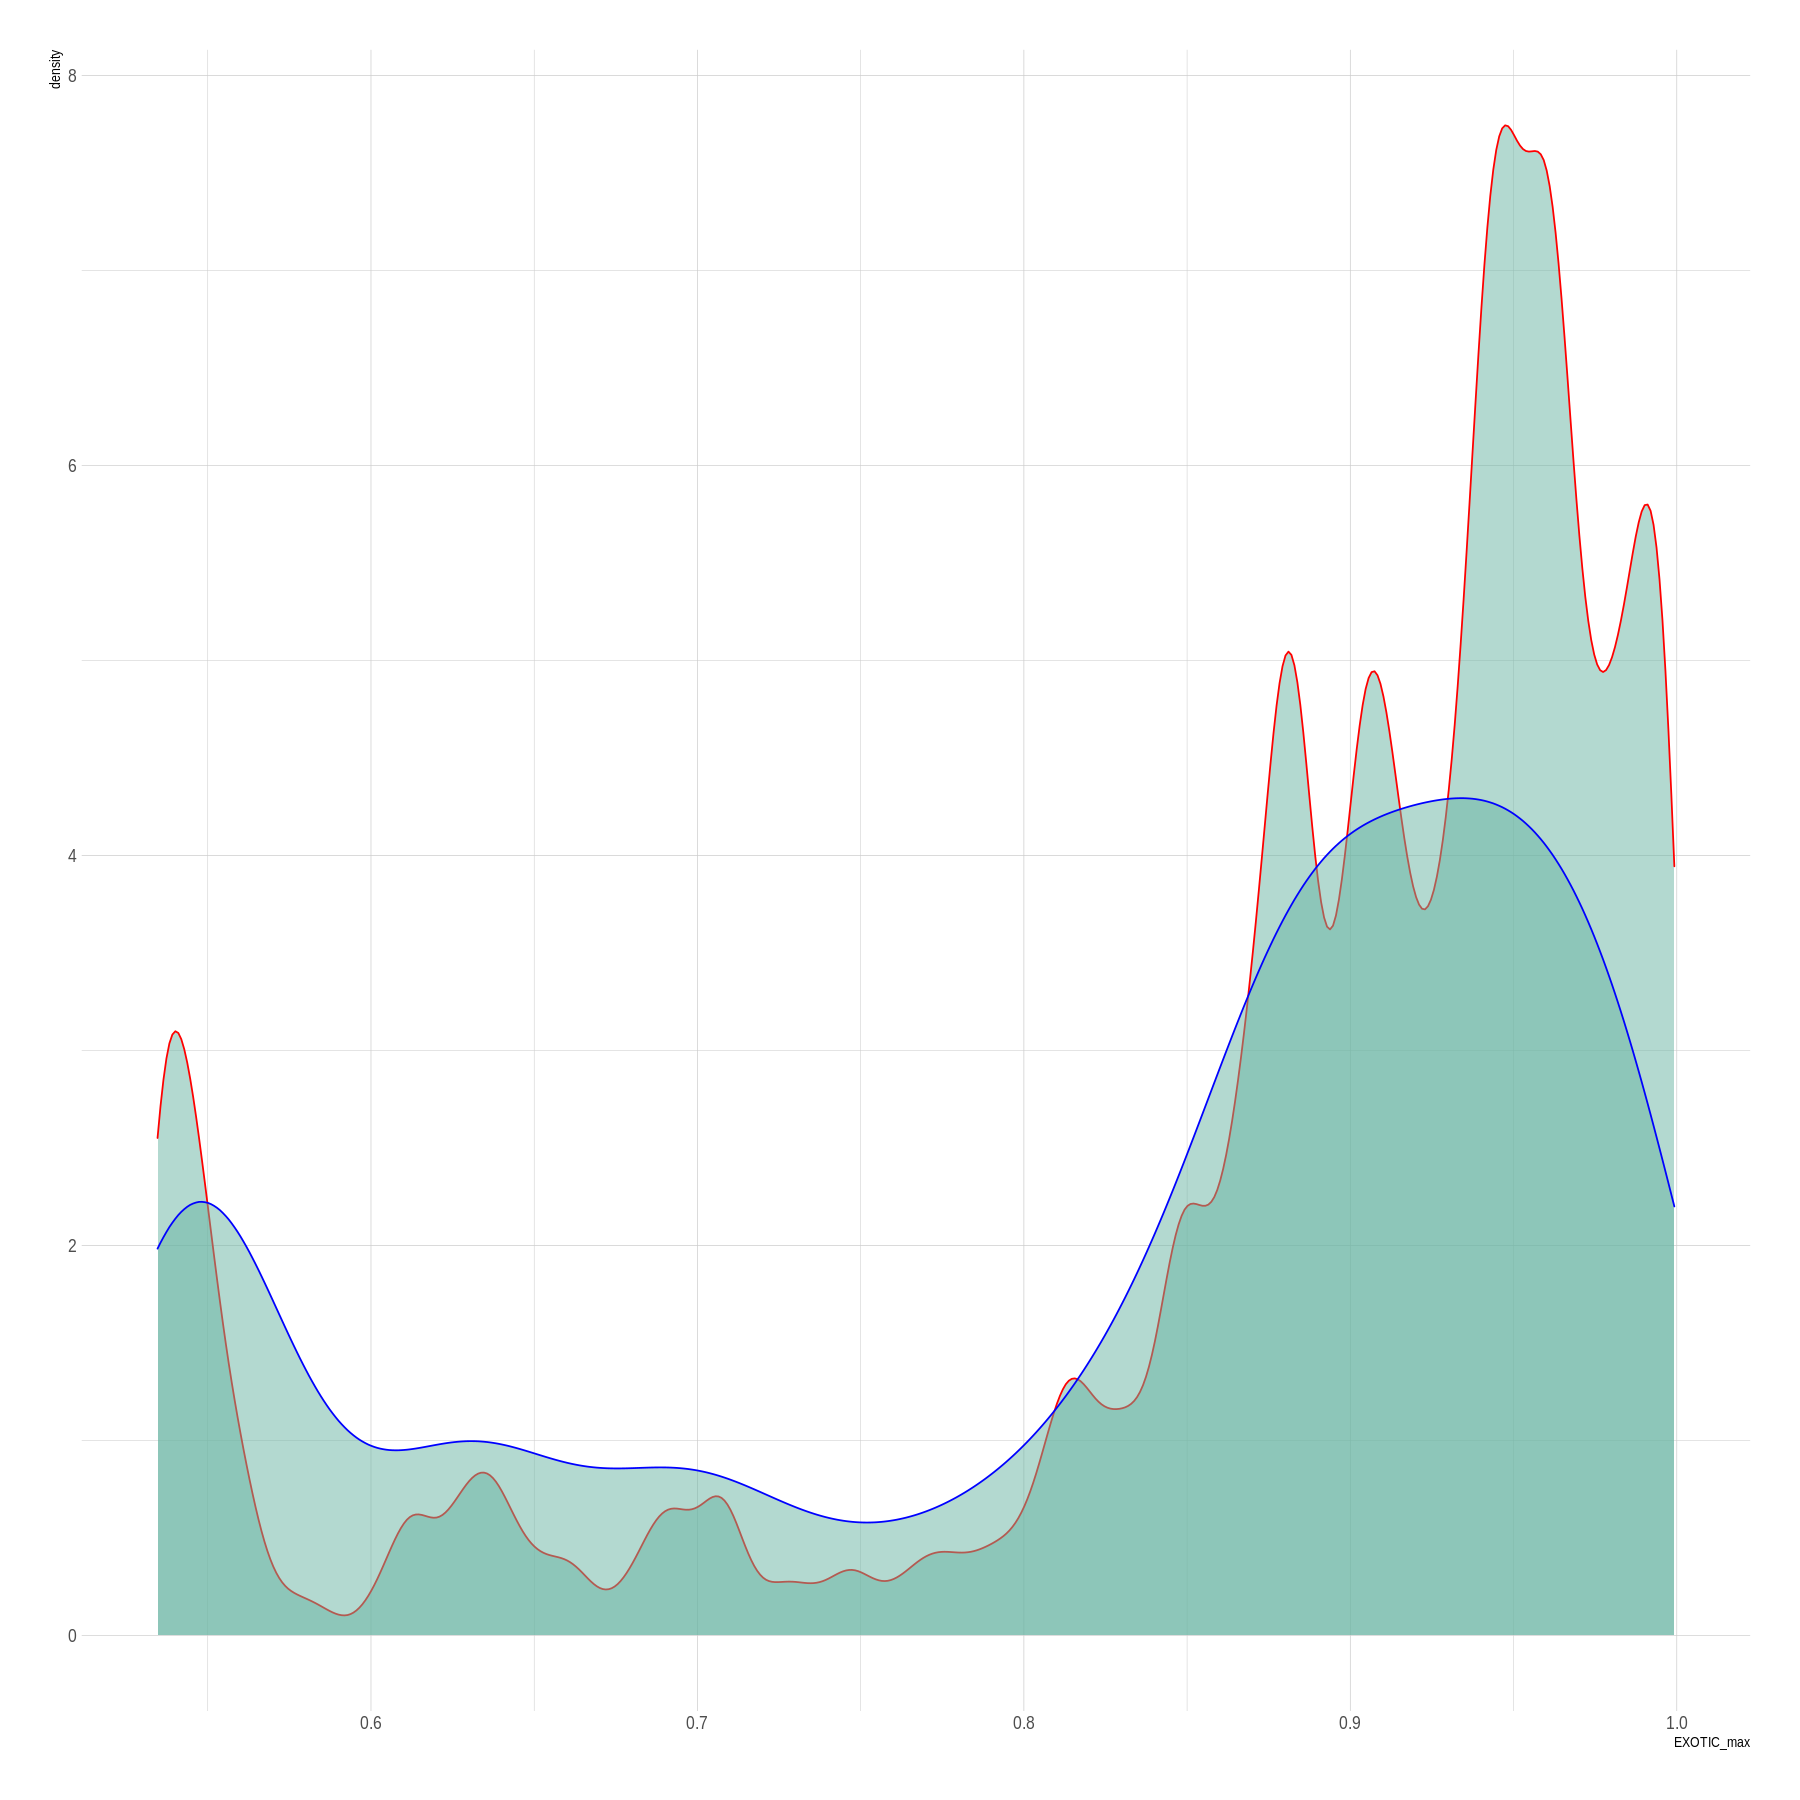

In [24]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata.parquet')
merge_exotic_sqtl2 <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata2.parquet')
merge_exotic_sqtl = merge_exotic_sqtl %>% arrange(Tissue)
merge_exotic_sqtl2 = merge_exotic_sqtl2 %>% arrange(Tissue)

# # merge_exotic_sqtl$EXOTIC_max

# colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
# colors <- colors %>% arrange(Tissue)
# colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_max)) +
    geom_density(fill="#69b3a2", color="red", alpha=0.5) +
    geom_density(data=merge_exotic_sqtl2, fill="#69b3a2", color="blue", alpha=0.5) +
#     ggtitle("Night price distribution of Airbnb appartements") +
    theme_ipsum()
h1

In [ ]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata2.parquet')
merge_exotic_sqtl = merge_exotic_sqtl %>% arrange(Tissue)

# merge_exotic_sqtl$EXOTIC_max

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_max)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) +
#     ggtitle("Night price distribution of Airbnb appartements") +
    theme_ipsum()
h1

In [ ]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata.parquet')
merge_exotic_sqtl = merge_exotic_sqtl %>% arrange(Tissue)

# merge_exotic_sqtl$EXOTIC_max

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


h1 <- ggplot(merge_exotic_sqtl, aes(x=EXOTIC_max)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8) +
#     ggtitle("Night price distribution of Airbnb appartements") +
    theme_ipsum()
h1

Picking joint bandwidth of 0.0484

Warning message:
“Removed 33290 rows containing non-finite values (stat_density_ridges).”


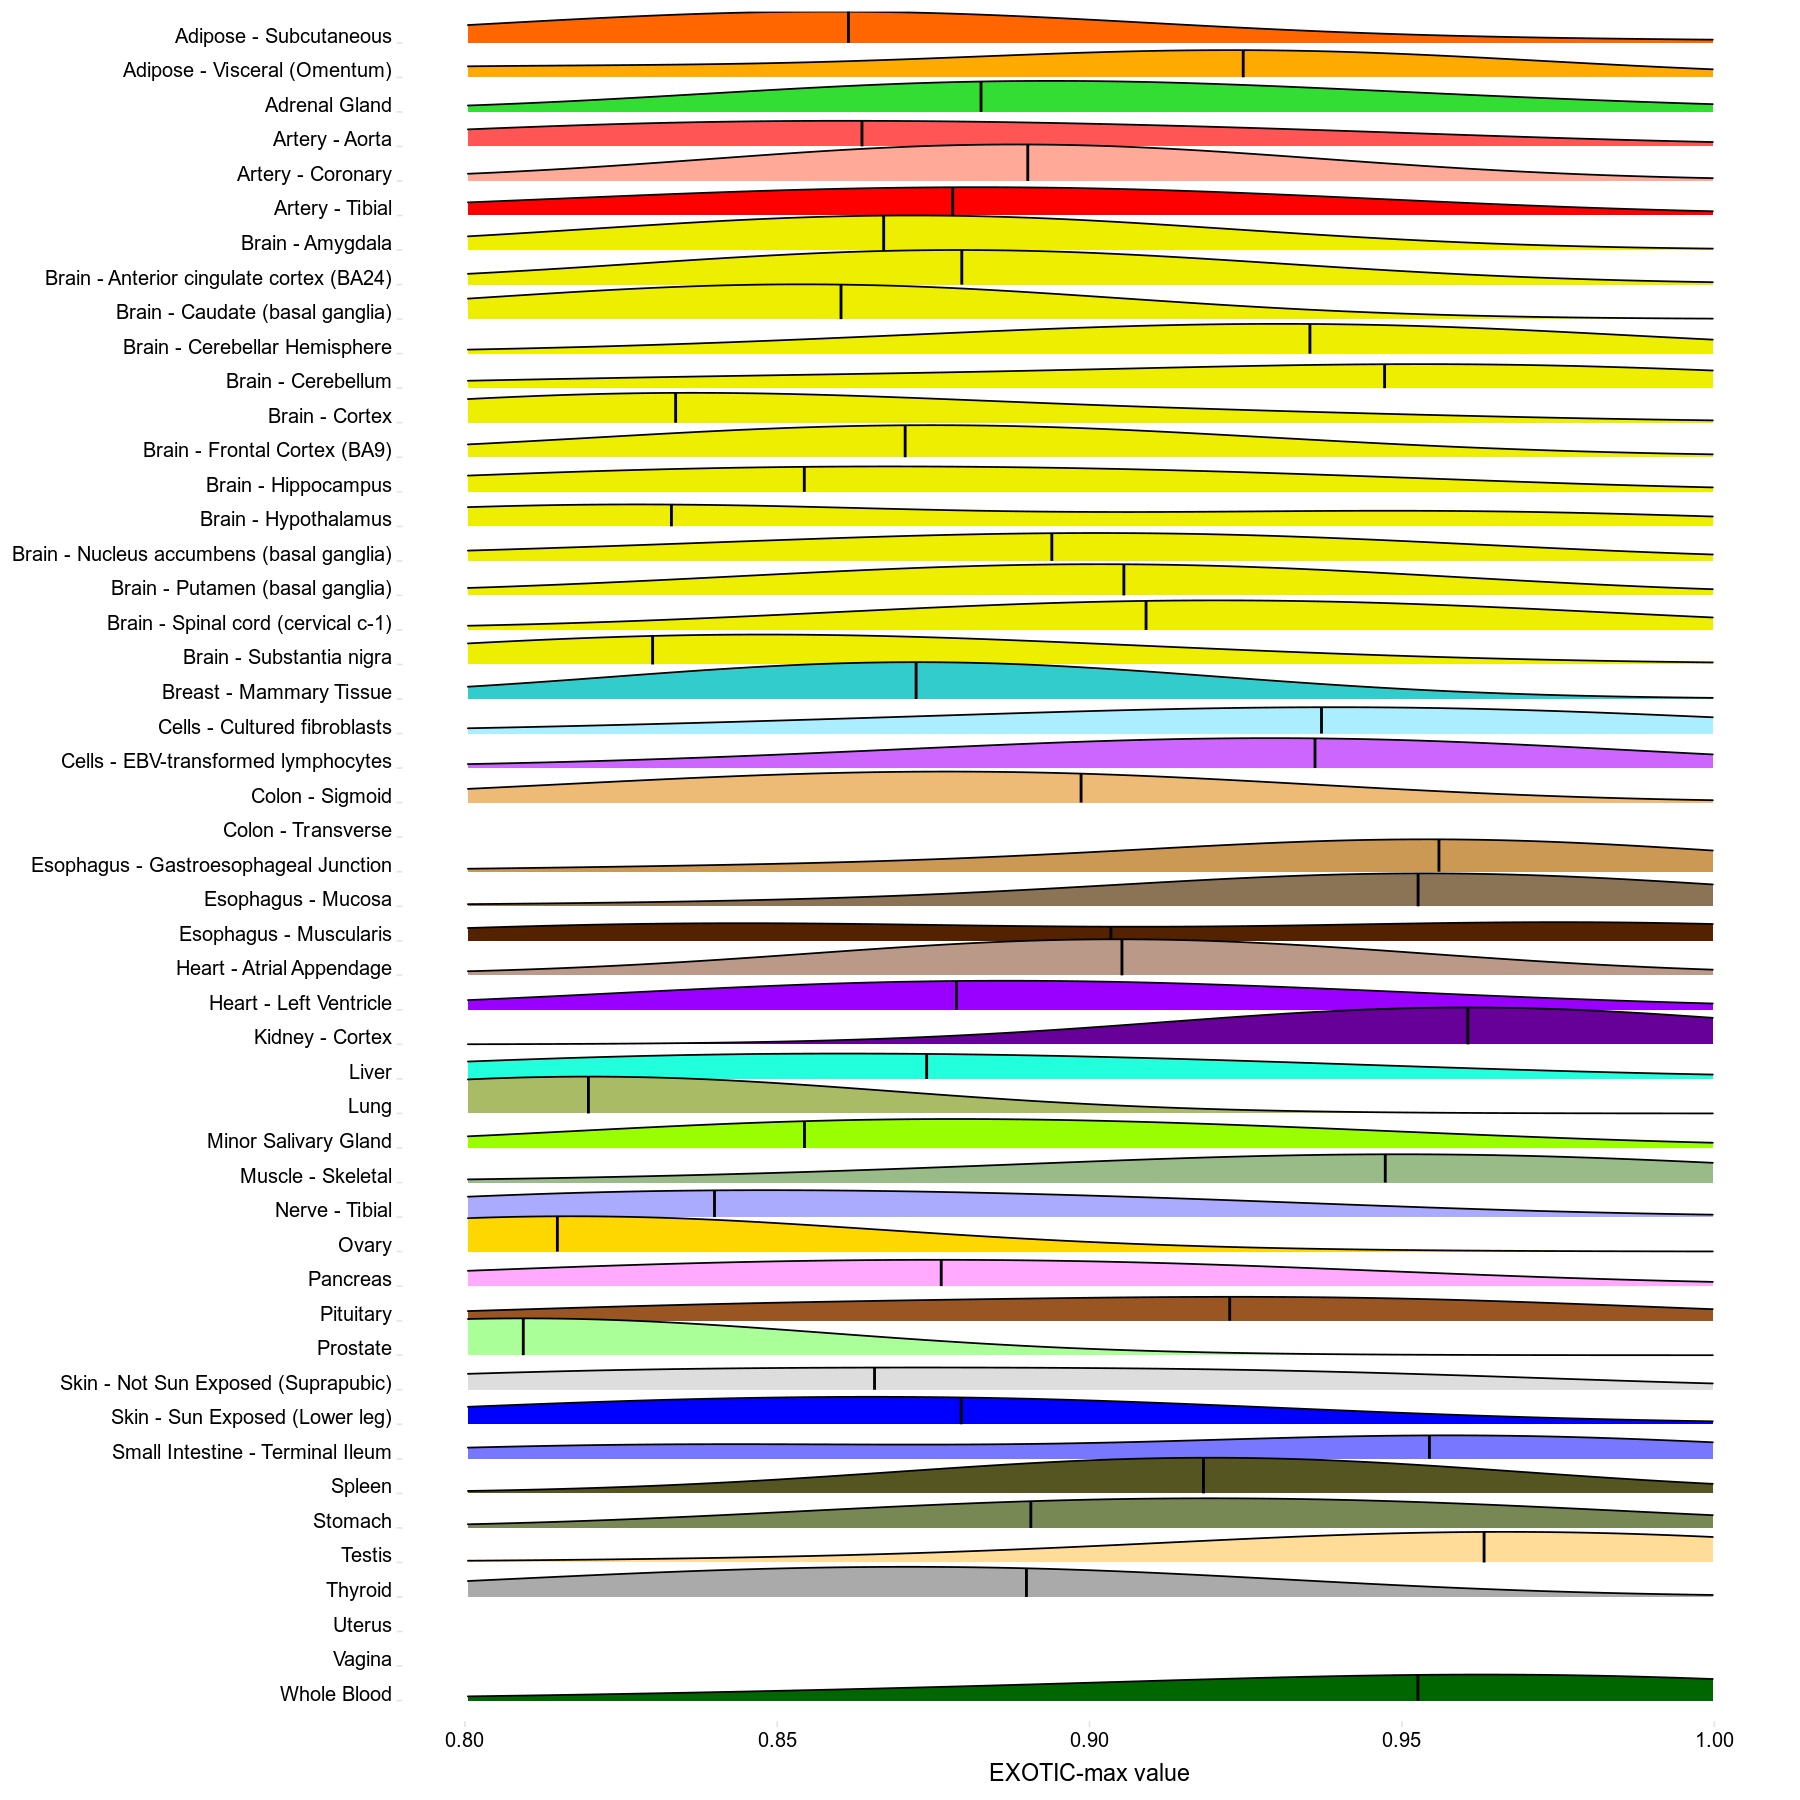

In [9]:
merge_exotic_sqtl <- read_parquet('/gstock/EXOTIC/data/QTL/sQTL_density_Rdata.parquet')
merge_exotic_sqtl = merge_exotic_sqtl %>% arrange(Tissue)



colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors <- colors %>% arrange(Tissue)
colors <- colors[colors$Tissue %in% merge_exotic_sqtl$Tissue, ]


h1 <- ggplot(merge_exotic_sqtl, aes(y = Tissue, x = EXOTIC_max, fill = Tissue), stat = "identity") + 
        scale_fill_manual(values = colors$Color) + 
        scale_y_discrete(limits = rev(unique(sort(merge_exotic_sqtl$Tissue)))) + 
        geom_density_ridges(scale = 1, quantile_lines = TRUE, quantiles = c(0.5), vline_size = 0.8, vline_color = "black") + 
        xlim(0.8, 1) + 
        theme_minimal() + 
        theme_ridges() + 
        theme(
            legend.position = "none", 
            axis.title.y = element_blank(), 
            panel.grid = element_blank(), 
            panel.spacing = unit(0, "lines"), 
            axis.title.x = element_text(hjust = 0.5), 
            axis.text.y = element_text(size = 12), ) + 
        xlab("EXOTIC-max value")
h1